# Business Analysis
### ElecKart is an e-commerce firm specialising in electronic products. Over the last one year, they had spent a significant amount of money in marketing. They also offered big-ticket promotions. 

### They are about to create a marketing budget for the next year which includes spending on commercials, online campaigns, and pricing & promotion strategies.

# Objective::

### The aim is to develop a market mix model to observe the actual impact of different marketing variables over the last year.
### Basically needs to optimize the marketing levers to improve the revenue response.

### Below are the data or variables needs to be consider for analysis :Products Sales data, Media Investment, NPS Score, Special Sale days [Holidays]

In [1]:
import os
import numpy as np
import pandas as pd
import warnings
import calendar
warnings.filterwarnings('ignore')

In [2]:
# import libraties
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#Suppressing scientific notation to float only 
pd.options.display.float_format = '{:,.2f}'.format

# Data Upload 

In [3]:
#Import the order data set
data = pd.read_csv(r'C:\Users\sohin\Downloads\ConsumerElectronics.csv', encoding='latin-1')
data.head()

,ï»¿fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00",6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00",6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00",1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00",1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00",1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [4]:
data.shape

(1648824, 20)

#### Summary of the dataset: 1648824 rows, 20 columns

In [5]:
#describe() function alongwith percentiles parameter to get a spread of the data in the numeric columns
data.describe()

,Year,Month,order_id,order_item_id,units,sla,product_mrp,product_procurement_sla
count,"1,648,824.00","1,648,824.00","1,648,824.00","1,648,824.00","1,648,824.00","1,648,824.00","1,648,824.00","1,648,824.00"
mean,"2,015.52",6.59,"2,842,444,674,146,328.50","13,756,277,530,325,384.00",1.02,5.69,"4,108.31",5.40
std,0.50,3.62,"1,269,134,332,596,894.25","55,945,981,798,631,008.00",0.25,2.98,"8,510.92",53.47
min,"2,015.00",1.00,"76,331,515.00","108,016,495.00",1.00,0.00,0.00,-1.00
25%,"2,015.00",3.00,"1,602,588,503,969,575.00","1,606,725,138,262,300.00",1.00,4.00,799.00,1.00
50%,"2,016.00",6.00,"2,611,824,528,743,350.00","2,619,185,472,741,150.00",1.00,6.00,"1,599.00",2.00
75%,"2,016.00",10.00,"3,610,613,539,366,250.00","4,397,705,931,628,400.00",1.00,7.00,"3,499.00",3.00
max,"2,016.00",12.00,"5,395,076,790,260,600.00","300,037,347,717,704,000.00",50.00,"1,006.00","299,999.00","1,000.00"


In [6]:
#missing information
data.isnull().any()

ï»¿fsn_id                          False
order_date                         False
Year                               False
Month                              False
order_id                           False
order_item_id                      False
gmv                                False
units                              False
deliverybdays                      False
deliverycdays                      False
s1_fact.order_payment_type         False
sla                                False
cust_id                            False
pincode                            False
product_analytic_super_category    False
product_analytic_category          False
product_analytic_sub_category      False
product_analytic_vertical          False
product_mrp                        False
product_procurement_sla            False
dtype: bool

In [7]:
#Blank values in the columns
col = (data ==' ').sum(axis=0)
col

ï»¿fsn_id                             0
order_date                            0
Year                                  0
Month                                 0
order_id                              0
order_item_id                         0
gmv                                4904
units                                 0
deliverybdays                         0
deliverycdays                         0
s1_fact.order_payment_type            0
sla                                   0
cust_id                            4904
pincode                            4904
product_analytic_super_category       0
product_analytic_category             0
product_analytic_sub_category         0
product_analytic_vertical             0
product_mrp                           0
product_procurement_sla               0
dtype: int64

#### Blank values in GMV, customer id and pin code column. There were total 4904 blank values in entire dataset across all product categories.

In [8]:
#Removing blank value
data[['gmv','cust_id','pincode']].replace('', np.nan, inplace=True)

In [9]:
data.dropna(subset=['gmv','cust_id','pincode'], inplace=True)

In [10]:
rmv = (data =='').sum(axis=0)
rmv

ï»¿fsn_id                          0
order_date                         0
Year                               0
Month                              0
order_id                           0
order_item_id                      0
gmv                                0
units                              0
deliverybdays                      0
deliverycdays                      0
s1_fact.order_payment_type         0
sla                                0
cust_id                            0
pincode                            0
product_analytic_super_category    0
product_analytic_category          0
product_analytic_sub_category      0
product_analytic_vertical          0
product_mrp                        0
product_procurement_sla            0
dtype: int64

In [11]:
#Checking duplicate
sum(data.duplicated())

104843

In [12]:
## dropping duplicate values 
data.drop_duplicates(keep=False,inplace=True)

In [13]:
data.shape

(1439148, 20)

In [14]:
##identify the unique number of pincode
len(data.pincode.unique())

12793

In [15]:
##identify the unique number of cust_id
len(data.cust_id.unique())

1170592

In [16]:
##identify the unique number of product_analytic_super_category
len(data.product_analytic_super_category.unique())

1

In [17]:
##identify the unique number of product_analytic_sub_category
len(data.product_analytic_sub_category.unique())

14

In [18]:
##identify the unique number of product_analytic_category
len(data.product_analytic_category.unique())

5

In [19]:
##identify the unique number of product_analytic_vertical
len(data.product_analytic_vertical.unique())

74

In [20]:
##identify the unique number of order_id 
len(data.order_id.unique())

1400235

In [21]:
#identify the unique number of order_item_id 
len(data.order_item_id.unique())

1402002

In [22]:
#min value of order_date
min(data['order_date'])

'2015-05-19 13:42:09'

In [23]:
#max value of order_date
max(data['order_date'])

'2016-07-25 01:19:45'

In [24]:
#Converting the order_date to the "Date time" format
data['order_date'] = pd.to_datetime(data['order_date'])
data.head()

,ï»¿fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00",6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00",6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00",1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00",1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00",1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [25]:
# Subsetting out data only between July 2015 and June 2016
data=data.loc[(data['order_date'] >='2015-07-01') & (data['order_date'] <='2016-06-30')]
data.head()

,ï»¿fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00",6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00",6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00",1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00",1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00",1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [26]:
#min value of order_date
min(data['order_date'])

Timestamp('2015-07-01 00:36:11')

In [27]:
#max value of order_date
max(data['order_date'])

Timestamp('2016-06-29 23:59:22')

In [28]:
data.loc[(data['order_date'].dt.year==data['Year'])]
data.head()

,ï»¿fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00",6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00",6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00",1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00",1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00",1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [29]:
data.loc[(data['order_date'].dt.month==data['Month'])]
data.head()

,ï»¿fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00",6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00",6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00",1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00",1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00",1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [30]:
## Derived a column "wday" from the order_date to find the day of a week
data['wday'] = data['order_date'].dt.weekday
data.head()

,ï»¿fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,wday
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00",6400,1,\N,\N,...,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,5
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00",6900,1,\N,\N,...,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00",1990,1,\N,\N,...,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,1
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00",1690,1,\N,\N,...,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00",1618,1,\N,\N,...,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,5


In [31]:
# Derived a column "week" from the order_date (it gives the week number i.e. 1, 2 etc.)
data['week'] = data['order_date'].dt.week
data.head()

,ï»¿fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,wday,week
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00",6400,1,\N,\N,...,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,5,42
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00",6900,1,\N,\N,...,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,0,43
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00",1990,1,\N,\N,...,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,1,43
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00",1690,1,\N,\N,...,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2,42
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00",1618,1,\N,\N,...,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,5,42


In [32]:
min(data['week'])

1

In [33]:
max(data['week'])

53

#### Number the week from 1 to 53

#### July 1st week will be 1 and june last week will be 53

In [34]:
data['order_date'] = pd.to_datetime(data["order_date"]).dt.strftime('%Y-%m-%d')
data.head()

,ï»¿fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,wday,week
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00",6400,1,\N,\N,...,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,5,42
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00",6900,1,\N,\N,...,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,0,43
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00",1990,1,\N,\N,...,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,1,43
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00",1690,1,\N,\N,...,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2,42
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00",1618,1,\N,\N,...,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,5,42


In [35]:
#Derive payout day
data['Pay_Day'] = data.order_date.apply(lambda x: 1 if x in ['2015-07-01','2015-07-15', '2015-08-01','2015-08-15','2015-09-01','2015-09-15','2015-10-01','2015-10-15','2015-11-01','2015-11-15','2015-12-01','2015-12-15','2016-01-01','2016-01-15','2016-02-01','2016-02-15','2016-03-01','2016-03-15','2016-04-01','2016-04-15','2016-05-01','2016-05-15','2016-06-01','2016-06-15'] else 0)
data.head()

,ï»¿fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,wday,week,Pay_Day
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00",6400,1,\N,\N,...,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,5,42,0
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00",6900,1,\N,\N,...,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,0,43,0
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00",1990,1,\N,\N,...,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,1,43,0
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00",1690,1,\N,\N,...,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2,42,0
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00",1618,1,\N,\N,...,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,5,42,0


In [36]:
min(data['Pay_Day'])

0

In [37]:
max(data['Pay_Day'])

1

In [38]:
## Creating a column whether a order is placed on special sale day & local holiday of Ontario
data['is_holiday']=data.order_date.apply(lambda x: 1 if x in ["2015-07-01","2015-07-18","2015-07-19","2015-08-03","2015-08-15","2015-08-16","2015-08-17","2015-08-28","2015-08-29","2015-08-30","2015-09-07","2015-10-12","2015-10-15","2015-10-16","2015-10-17","2015-11-07","2015-11-08","2015-11-09","2015-11-10","2015-11-11","2015-11-12","2015-11-13","2015-11-14","2015-12-25","2015-12-26","2015-12-27","2015-12-28","2015-12-29","2015-12-30","2015-12-31","2016-01-01","2016-01-02","2016-01-03","2016-01-20","2016-01-21","2016-01-22","2016-02-01",
                "2016-02-02","2016-02-14","2016-02-15","2016-02-20","2016-02-21","2016-03-07","2016-03-08","2016-03-09","2016-03-25","2016-05-23","2016-05-25","2016-05-26","2016-05-27"] else 0)
data.head()

,ï»¿fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00",6400,1,\N,\N,...,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,5,42,0,1
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00",6900,1,\N,\N,...,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,0,43,0,0
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00",1990,1,\N,\N,...,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,1,43,0,0
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00",1690,1,\N,\N,...,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2,42,0,0
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00",1618,1,\N,\N,...,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,5,42,0,1


In [39]:
## Creating one more column "special_sale" which stores which holiday it was (like Diwali, Eid etc.localholiday )
data['special_sale']='Regular Day'
lst = [data]

for col in lst:
    col.loc[(col['order_date'] >="2015-07-18") & (col['order_date']<="2015-07-19"),'special_sale'] = 'Eid & Rathayatra'
    col.loc[(col['order_date'] >="2015-08-15") & (col['order_date']<="2015-08-17"),'special_sale'] = 'Independence Day'
    col.loc[(col['order_date'] >="2015-08-28") & (col['order_date']<="2015-08-30"),'special_sale'] = 'Rakshabandhan'
    col.loc[(col['order_date'] >="2015-10-15") & (col['order_date']<="2015-10-17"),'special_sale'] = 'Daussera'
    col.loc[(col['order_date'] >="2015-11-07") & (col['order_date']<="2015-11-14"),'special_sale'] = 'Diwali'
    col.loc[(col['order_date'] >="2015-12-25") & (col['order_date']<="2016-01-03"),'special_sale'] = 'Christmas & New Year'
    col.loc[(col['order_date'] >="2016-01-20") & (col['order_date']<="2016-01-22"),'special_sale'] = 'Republic Day'
    col.loc[(col['order_date'] >="2016-02-01") & (col['order_date']<="2016-02-02"),'special_sale'] = 'BED'
    col.loc[(col['order_date'] >="2016-02-14") & (col['order_date']<="2016-02-15"),'special_sale'] = 'Valentine Day'
    col.loc[(col['order_date'] >="2016-02-20") & (col['order_date']<="2016-02-21"),'special_sale'] = 'FHSD'
    col.loc[(col['order_date'] >="2016-03-07") & (col['order_date']<="2016-03-09"),'special_sale'] = 'BSD'
    col.loc[(col['order_date'] >="2016-05-25") & (col['order_date']<="2016-05-27"),'special_sale'] = 'Pacman'
data.head()

,ï»¿fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,special_sale
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00",6400,1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,7190,0,5,42,0,1,Daussera
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00",6900,1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,7190,0,0,43,0,0,Regular Day
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00",1990,1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,2099,3,1,43,0,0,Regular Day
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00",1690,1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2,42,0,0,Regular Day
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00",1618,1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,2099,3,5,42,0,1,Daussera


In [40]:
min(data['order_id'])

76331515.0

In [41]:
max(data['order_id'])

4640800670224400.0

##### order_id range between 76331515 to 4640800670224400

In [42]:
# order_item_id generates two different ids  for the same order id if you order 2 or more products under

# the same id. orders are tracked using this variable. 
min(data['order_item_id'])

108016495.0

In [43]:
max(data['order_item_id'])

3.00037347717704e+17

##### range order_item_id between 108016495 to 3.00037347717704e+17

In [44]:
#Product MRP; gmv and units cannot be 0
min(data['product_mrp'])

0

In [45]:
max(data['product_mrp'])

299999

##### range of product_mrp 0 to 299999

In [46]:
data['product_mrp']=data['product_mrp'].astype(float)

In [47]:
#handling blank values in gmv column
data['gmv'] = data['gmv'].replace(r'^\s+$', np.nan, regex=True)

In [48]:
data['gmv']=data['gmv'].astype(float)

In [49]:
# Product MRP; gmv and units cannot be 0
min(data['gmv'])

0.0

In [50]:
max(data['gmv'])

224990.0

##### range of gmv 0 to 224990

In [51]:
min(data['units'])

1

In [52]:
max(data['units'])

50

##### range of units 1 to 50

In [53]:
data=data.loc[(data['product_mrp']>0) & (data['gmv']>0) & (data['units']>0)]
data.head()

,ï»¿fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,special_sale
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",0,5,42,0,1,Daussera
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",0,0,43,0,0,Regular Day
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,1,43,0,0,Regular Day
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,2,42,0,0,Regular Day
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,5,42,0,1,Daussera


In [54]:
#GMV 
#Subsetting out rows where equation MRP*units >= GMV doesn't hold. Since we can
#offer discounts but cannot charge a higher price 
data=data.loc[(data['product_mrp']) * (data['units']) >=(data['gmv'])]
data.head()

,ï»¿fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,special_sale
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",0,5,42,0,1,Daussera
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",0,0,43,0,0,Regular Day
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,1,43,0,0,Regular Day
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,2,42,0,0,Regular Day
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,5,42,0,1,Daussera


In [55]:
#deliverybdays - business days and deliverycdays - calender days contains negative as well as very high deliverybdays
#removing negative values & invalid values '\N' is ontime delivery
data=data.loc[(data['deliverybdays'] >='0') | (data['deliverybdays']=='\\N')]
data.head()

,ï»¿fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,special_sale
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",0,5,42,0,1,Daussera
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",0,0,43,0,0,Regular Day
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,1,43,0,0,Regular Day
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,2,42,0,0,Regular Day
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,5,42,0,1,Daussera


In [56]:
data=data.loc[(data['deliverycdays'] >='0') | (data['deliverycdays']=='\\N')]
data.head()

,ï»¿fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,special_sale
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",0,5,42,0,1,Daussera
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",0,0,43,0,0,Regular Day
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,1,43,0,0,Regular Day
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,2,42,0,0,Regular Day
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,5,42,0,1,Daussera


In [57]:
#Rename column s1_fact.order_payment_type to s1_fact_order_payment_type
data.rename(columns={'s1_fact.order_payment_type': 's1_fact_order_payment_type'}, inplace=True)
data.head()

,ï»¿fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,special_sale
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",0,5,42,0,1,Daussera
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",0,0,43,0,0,Regular Day
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,1,43,0,0,Regular Day
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,2,42,0,0,Regular Day
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,5,42,0,1,Daussera


In [58]:
len(data.s1_fact_order_payment_type.unique())

2

In [59]:
data[['s1_fact_order_payment_type']].head()

,s1_fact_order_payment_type
0,COD
1,COD
2,COD
3,Prepaid
4,Prepaid


#### Two payment type available - COD , Prepaid

In [60]:
#check COD count
data.loc[(data['s1_fact_order_payment_type'] =='COD')].count()

ï»¿fsn_id                          1005790
order_date                         1005790
Year                               1005790
Month                              1005790
order_id                           1005790
order_item_id                      1005790
gmv                                1005790
units                              1005790
deliverybdays                      1005790
deliverycdays                      1005790
s1_fact_order_payment_type         1005790
sla                                1005790
cust_id                            1005790
pincode                            1005790
product_analytic_super_category    1005790
product_analytic_category          1005790
product_analytic_sub_category      1005790
product_analytic_vertical          1005790
product_mrp                        1005790
product_procurement_sla            1005790
wday                               1005790
week                               1005790
Pay_Day                            1005790
is_holiday 

In [61]:
#Check Prepaid payment
data.loc[(data['s1_fact_order_payment_type'] =='Prepaid')].count()

ï»¿fsn_id                          393938
order_date                         393938
Year                               393938
Month                              393938
order_id                           393938
order_item_id                      393938
gmv                                393938
units                              393938
deliverybdays                      393938
deliverycdays                      393938
s1_fact_order_payment_type         393938
sla                                393938
cust_id                            393938
pincode                            393938
product_analytic_super_category    393938
product_analytic_category          393938
product_analytic_sub_category      393938
product_analytic_vertical          393938
product_mrp                        393938
product_procurement_sla            393938
wday                               393938
week                               393938
Pay_Day                            393938
is_holiday                        

### COD is preferred one based on above analysis

In [62]:
min(data['sla'])

0

In [63]:
max(data['sla'])

1006

In [64]:
#Rarely SLA for any delivery will be more than 2 months; hence filtering out other value 
data=data.loc[(data['sla']<=60)]
data.head()

,ï»¿fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,special_sale
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",0,5,42,0,1,Daussera
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",0,0,43,0,0,Regular Day
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,1,43,0,0,Regular Day
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,2,42,0,0,Regular Day
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,5,42,0,1,Daussera


In [65]:
#Product procurement sla
min(data['product_procurement_sla'])

-1

In [66]:
#Product procurement sla
max(data['product_procurement_sla'])

1000

##### Product procurement sla range -1 to 1000

In [67]:
#filtering out negative Product procuremen sla values
#also procurement beyound 2 months is not logical; hence filtering out
data=data.loc[(data['product_procurement_sla'] >=0) & (data['product_procurement_sla']<=60)]
data.head()

,ï»¿fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,special_sale
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",0,5,42,0,1,Daussera
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",0,0,43,0,0,Regular Day
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,1,43,0,0,Regular Day
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,2,42,0,0,Regular Day
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,5,42,0,1,Daussera


In [68]:
#Customer IDS and Pincodes 
#Converting numeric format from scientific notation
data['cust_id']=data['cust_id'].astype(float)
data['pincode']=data['pincode'].astype(float)
data.head()

,ï»¿fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,special_sale
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",0,5,42,0,1,Daussera
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",0,0,43,0,0,Regular Day
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,1,43,0,0,Regular Day
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,2,42,0,0,Regular Day
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,\N,\N,...,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,5,42,0,1,Daussera


In [69]:
#Product analytic categories and super categories for the entire dataset
data[['product_analytic_category','product_analytic_sub_category','product_analytic_vertical']].head()

,product_analytic_category,product_analytic_sub_category,product_analytic_vertical
0,CameraAccessory,CameraAccessory,CameraTripod
1,CameraAccessory,CameraAccessory,CameraTripod
2,CameraAccessory,CameraAccessory,CameraTripod
3,CameraAccessory,CameraAccessory,CameraTripod
4,CameraAccessory,CameraAccessory,CameraTripod


In [70]:
#computing discount--KPI
data['Discount_Percentage']=(((data['product_mrp'] * data['units'])-data['gmv'])/(data['product_mrp'] * data['units']))*100
data.head()

,ï»¿fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,special_sale,Discount_Percentage
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,\N,\N,...,CameraAccessory,CameraTripod,"7,190.00",0,5,42,0,1,Daussera,10.99
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,\N,\N,...,CameraAccessory,CameraTripod,"7,190.00",0,0,43,0,0,Regular Day,4.03
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,\N,\N,...,CameraAccessory,CameraTripod,"2,099.00",3,1,43,0,0,Regular Day,5.19
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,\N,\N,...,CameraAccessory,CameraTripod,"2,099.00",3,2,42,0,0,Regular Day,19.49
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,\N,\N,...,CameraAccessory,CameraTripod,"2,099.00",3,5,42,0,1,Daussera,22.92


In [71]:
min(data['Discount_Percentage'])

0.0

In [72]:
max(data['Discount_Percentage'])

99.85955056179775

In [73]:
#gmv per unit--KPI
data['gmvperunit']=(data['gmv'])/data['units']
data.head()

,ï»¿fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,product_analytic_vertical,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,special_sale,Discount_Percentage,gmvperunit
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,\N,\N,...,CameraTripod,"7,190.00",0,5,42,0,1,Daussera,10.99,"6,400.00"
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,\N,\N,...,CameraTripod,"7,190.00",0,0,43,0,0,Regular Day,4.03,"6,900.00"
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,\N,\N,...,CameraTripod,"2,099.00",3,1,43,0,0,Regular Day,5.19,"1,990.00"
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,\N,\N,...,CameraTripod,"2,099.00",3,2,42,0,0,Regular Day,19.49,"1,690.00"
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,\N,\N,...,CameraTripod,"2,099.00",3,5,42,0,1,Daussera,22.92,"1,618.00"


In [74]:
#Describe
data.describe()

,Year,Month,order_id,order_item_id,gmv,units,sla,cust_id,pincode,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,Discount_Percentage,gmvperunit
count,"1,336,708.00","1,336,708.00","1,336,708.00","1,336,708.00","1,336,708.00","1,336,708.00","1,336,708.00","1,336,708.00","1,336,708.00","1,336,708.00","1,336,708.00","1,336,708.00","1,336,708.00","1,336,708.00","1,336,708.00","1,336,708.00","1,336,708.00"
mean,"2,015.61",6.11,"2,834,375,875,354,052.50","4,042,914,912,193,221.00","2,537.33",1.02,5.75,"-9,128,187,297,966,040.00","97,762,746,318,726,176.00","4,341.27",2.70,2.97,25.26,0.06,0.21,45.64,"2,503.68"
std,0.49,3.73,"1,304,005,213,368,242.50","18,964,275,898,880,772.00","5,709.13",0.25,2.75,"5,327,975,937,619,950,592.00","5,311,340,914,522,105,856.00","8,826.12",1.79,1.93,16.65,0.24,0.41,22.09,"5,624.54"
min,"2,015.00",1.00,"76,331,515.00","108,016,495.00",10.00,1.00,0.00,"-9,223,350,545,281,059,840.00","-9,221,830,354,194,010,112.00",49.00,0.00,0.00,1.00,0.00,0.00,0.00,10.00
25%,"2,015.00",3.00,"1,592,293,966,540,600.00","1,593,389,582,815,300.00",349.00,1.00,4.00,"-4,620,564,174,858,472,448.00","-4,424,580,572,712,860,160.00",899.00,2.00,1.00,10.00,0.00,0.00,29.56,349.00
50%,"2,016.00",5.00,"2,607,503,786,390,950.00","2,609,506,438,100,350.00",798.00,1.00,6.00,"-21,925,724,035,158,200.00","125,730,110,649,367,008.00","1,700.00",2.00,3.00,21.00,0.00,0.00,45.92,785.00
75%,"2,016.00",10.00,"3,622,190,669,561,275.00","3,625,621,063,379,125.00","1,999.00",1.00,7.00,"4,602,604,855,479,817,216.00","4,779,413,808,298,529,792.00","3,499.00",3.00,5.00,42.00,0.00,0.00,61.97,"1,999.00"
max,"2,016.00",12.00,"4,640,800,670,224,400.00","300,037,347,717,704,000.00","224,990.00",50.00,60.00,"9,223,362,162,226,820,096.00","9,222,980,202,332,239,872.00","299,999.00",15.00,6.00,53.00,1.00,1.00,99.86,"224,990.00"


In [75]:
#we are categorising products as mass market and luxury - based on gmv per unit
typetemp=data['gmvperunit'].quantile(.8)
typetemp

2442.0

In [76]:
#total GMV--KPI
TotalGMV =data['gmv'].astype(float).sum()
TotalGMV

3391663731.331807

In [77]:
#Average GMV--KPI
AvgGMV=data['gmv'].astype(float).mean()
AvgGMV

2537.3258268311433

In [78]:
#total unit--KPI
totunit=data['units'].sum()
totunit

1365055

In [79]:
# Filtering out rows were product sub category is camera accessory, home audio and gaming accessory.
data=data.loc[(data['product_analytic_sub_category'] =='CameraAccessory') | (data['product_analytic_sub_category']=='GamingAccessory') | (data['product_analytic_sub_category']=='HomeAudio')]
data.head()

,ï»¿fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,product_analytic_vertical,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,special_sale,Discount_Percentage,gmvperunit
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,\N,\N,...,CameraTripod,"7,190.00",0,5,42,0,1,Daussera,10.99,"6,400.00"
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,\N,\N,...,CameraTripod,"7,190.00",0,0,43,0,0,Regular Day,4.03,"6,900.00"
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,\N,\N,...,CameraTripod,"2,099.00",3,1,43,0,0,Regular Day,5.19,"1,990.00"
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,\N,\N,...,CameraTripod,"2,099.00",3,2,42,0,0,Regular Day,19.49,"1,690.00"
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,\N,\N,...,CameraTripod,"2,099.00",3,5,42,0,1,Daussera,22.92,"1,618.00"


In [80]:
#GMV based on product_sub_category
data['gmv']=data['gmv'].astype(float)
GMV=data.groupby('product_analytic_sub_category')['gmv'].sum()
GMV.head()

product_analytic_sub_category
CameraAccessory   227,702,534.60
GamingAccessory   143,186,780.23
HomeAudio         213,587,235.55
Name: gmv, dtype: float64

In [81]:
# GMV % of the total; we will use the same to derive the marketing spend
GMV=GMV/TotalGMV
GMV.head()

product_analytic_sub_category
CameraAccessory   0.07
GamingAccessory   0.04
HomeAudio         0.06
Name: gmv, dtype: float64

In [82]:
#Replace '\N' from 'deliverybdays'.'deliverycdays, columns
data['deliverybdays']=data['deliverybdays'].replace('\\N', '0')
data['deliverycdays']=data['deliverycdays'].replace('\\N', '0')
data.head()

,ï»¿fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,product_analytic_vertical,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,special_sale,Discount_Percentage,gmvperunit
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,...,CameraTripod,"7,190.00",0,5,42,0,1,Daussera,10.99,"6,400.00"
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,0,0,...,CameraTripod,"7,190.00",0,0,43,0,0,Regular Day,4.03,"6,900.00"
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,0,0,...,CameraTripod,"2,099.00",3,1,43,0,0,Regular Day,5.19,"1,990.00"
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,0,0,...,CameraTripod,"2,099.00",3,2,42,0,0,Regular Day,19.49,"1,690.00"
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,...,CameraTripod,"2,099.00",3,5,42,0,1,Daussera,22.92,"1,618.00"


In [83]:
#delivery_on_time ---KPI
data['delivery_on_time'] = data['sla'] - (data['deliverybdays'].astype(float)+data['deliverycdays'].astype(float)+data['product_procurement_sla'])
data.head()

,ï»¿fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,special_sale,Discount_Percentage,gmvperunit,delivery_on_time
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,...,"7,190.00",0,5,42,0,1,Daussera,10.99,"6,400.00",5.00
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,0,0,...,"7,190.00",0,0,43,0,0,Regular Day,4.03,"6,900.00",7.00
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,0,0,...,"2,099.00",3,1,43,0,0,Regular Day,5.19,"1,990.00",7.00
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,0,0,...,"2,099.00",3,2,42,0,0,Regular Day,19.49,"1,690.00",1.00
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,...,"2,099.00",3,5,42,0,1,Daussera,22.92,"1,618.00",3.00


In [84]:
#KPI
data['delivery_status'] = np.nan
lst = [data]

for col in lst:
    col.loc[(col['delivery_on_time'] <0),'delivery_status'] = 'Delayed'
    col.loc[(col['delivery_on_time']==0),'delivery_status'] = 'On time'
    col.loc[(col['delivery_on_time'] >0),'delivery_status'] = 'Early'
data.head()

,ï»¿fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,product_procurement_sla,wday,week,Pay_Day,is_holiday,special_sale,Discount_Percentage,gmvperunit,delivery_on_time,delivery_status
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,...,0,5,42,0,1,Daussera,10.99,"6,400.00",5.00,Early
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,0,0,...,0,0,43,0,0,Regular Day,4.03,"6,900.00",7.00,Early
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,0,0,...,3,1,43,0,0,Regular Day,5.19,"1,990.00",7.00,Early
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,0,0,...,3,2,42,0,0,Regular Day,19.49,"1,690.00",1.00,Early
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,...,3,5,42,0,1,Daussera,22.92,"1,618.00",3.00,Early


In [85]:
#removing columns that we will not use
#delete columns
data = data.drop(['product_analytic_super_category','ï»¿fsn_id','cust_id','pincode'], axis=1)
data.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,product_procurement_sla,wday,week,Pay_Day,is_holiday,special_sale,Discount_Percentage,gmvperunit,delivery_on_time,delivery_status
0,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,COD,...,0,5,42,0,1,Daussera,10.99,"6,400.00",5.00,Early
1,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,0,0,COD,...,0,0,43,0,0,Regular Day,4.03,"6,900.00",7.00,Early
2,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,0,0,COD,...,3,1,43,0,0,Regular Day,5.19,"1,990.00",7.00,Early
3,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,0,0,Prepaid,...,3,2,42,0,0,Regular Day,19.49,"1,690.00",1.00,Early
4,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,Prepaid,...,3,5,42,0,1,Daussera,22.92,"1,618.00",3.00,Early


In [86]:
data.shape

(464449, 25)

In [87]:
#load Media data and other information.xlsx 1st tab
ProductList = pd.read_excel(r'C:\Users\sohin\Downloads\Media data and other information.xlsx',sheet_name="Product List", skiprows=1)
#ProductList= pd.read_excel(xls,'Product List')
ProductList.head()

,Unnamed: 0,Unnamed: 1,Frequency,Percent
0,nan,\N,5828,0.35
1,nan,AmplifierReceiver,4056,0.25
2,nan,AudioMP3Player,112892,6.85
3,nan,Binoculars,14599,0.89
4,nan,BoomBox,2879,0.17


In [88]:
#####Media Investments
media_investment = pd.read_excel(r'C:\Users\sohin\Downloads\Media data and other information.xlsx',sheet_name='Media Investment', skiprows=2)

In [89]:
media_investment=media_investment.iloc[:,1:]

In [90]:
media_investment.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,"2,015.00",7.00,17.06,0.22,2.53,7.41,0.00,1.33,0.55,5.02,nan,nan
1,"2,015.00",8.00,5.06,0.01,1.28,1.06,0.00,0.13,0.07,2.51,nan,nan
2,"2,015.00",9.00,96.25,3.88,1.36,62.79,0.61,16.38,5.04,6.20,nan,nan
3,"2,015.00",10.00,170.16,6.14,12.62,84.67,3.44,24.37,6.97,31.93,nan,nan
4,"2,015.00",11.00,51.22,4.22,1.28,14.17,0.17,19.56,6.60,5.22,nan,nan


## Data Preparation

In [91]:
# Checking for null values
media_investment.isnull().sum()

Year                  4
Month                 4
Total Investment      4
TV                    3
Digital               4
Sponsorship           4
Content Marketing     4
Online marketing      4
 Affiliates           4
SEM                   4
Radio                13
Other                13
dtype: int64

In [92]:
listcol=['Year','Month','Total Investment','TV','Digital','Sponsorship','Content Marketing','Online marketing','SEM','Radio','Other']
media_investment[listcol]=media_investment[listcol].apply(lambda x: x.fillna(0))

In [93]:
media_investment.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,"2,015.00",7.00,17.06,0.22,2.53,7.41,0.00,1.33,0.55,5.02,0.00,0.00
1,"2,015.00",8.00,5.06,0.01,1.28,1.06,0.00,0.13,0.07,2.51,0.00,0.00
2,"2,015.00",9.00,96.25,3.88,1.36,62.79,0.61,16.38,5.04,6.20,0.00,0.00
3,"2,015.00",10.00,170.16,6.14,12.62,84.67,3.44,24.37,6.97,31.93,0.00,0.00
4,"2,015.00",11.00,51.22,4.22,1.28,14.17,0.17,19.56,6.60,5.22,0.00,0.00


In [94]:
#replace month value
media_investment['Month'] = media_investment['Month'].astype(str).replace('7.0', '07')
media_investment['Month'] = media_investment['Month'].astype(str).replace('8.0', '08')
media_investment['Month'] = media_investment['Month'].astype(str).replace('9.0', '09')
media_investment['Month'] = media_investment['Month'].astype(str).replace('10.0','10')
media_investment['Month'] = media_investment['Month'].astype(str).replace('11.0', '11')
media_investment['Month'] = media_investment['Month'].astype(str).replace('12.0', '12')
media_investment['Month'] = media_investment['Month'].astype(str).replace('1.0', '01')

media_investment['Month'] = media_investment['Month'].astype(str).replace('2.0', '02')
media_investment['Month'] = media_investment['Month'].astype(str).replace('3.0', '03')
media_investment['Month'] = media_investment['Month'].astype(str).replace('4.0', '04')
media_investment['Month'] = media_investment['Month'].astype(str).replace('5.0', '05')
media_investment['Month'] = media_investment['Month'].astype(str).replace('6.0', '06')
media_investment['Month'] = media_investment['Month'].astype(str).replace('0.0', '00')
media_investment['Month'] = media_investment['Month'].astype(str).replace('0.0', '00')
media_investment['Month'] = media_investment['Month'].astype(str).replace('0.0', '00')
media_investment['Month'] = media_investment['Month'].astype(str).replace('0.0', '00')

media_investment.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,"2,015.00",07,17.06,0.22,2.53,7.41,0.00,1.33,0.55,5.02,0.00,0.00
1,"2,015.00",08,5.06,0.01,1.28,1.06,0.00,0.13,0.07,2.51,0.00,0.00
2,"2,015.00",09,96.25,3.88,1.36,62.79,0.61,16.38,5.04,6.20,0.00,0.00
3,"2,015.00",10,170.16,6.14,12.62,84.67,3.44,24.37,6.97,31.93,0.00,0.00
4,"2,015.00",11,51.22,4.22,1.28,14.17,0.17,19.56,6.60,5.22,0.00,0.00


In [95]:
media_investment['Year'] = media_investment['Year'].astype(int)
media_investment.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,07,17.06,0.22,2.53,7.41,0.00,1.33,0.55,5.02,0.00,0.00
1,2015,08,5.06,0.01,1.28,1.06,0.00,0.13,0.07,2.51,0.00,0.00
2,2015,09,96.25,3.88,1.36,62.79,0.61,16.38,5.04,6.20,0.00,0.00
3,2015,10,170.16,6.14,12.62,84.67,3.44,24.37,6.97,31.93,0.00,0.00
4,2015,11,51.22,4.22,1.28,14.17,0.17,19.56,6.60,5.22,0.00,0.00


In [96]:
media_investment['Month'] = media_investment['Month'].astype(int)
media_investment.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,17.06,0.22,2.53,7.41,0.00,1.33,0.55,5.02,0.00,0.00
1,2015,8,5.06,0.01,1.28,1.06,0.00,0.13,0.07,2.51,0.00,0.00
2,2015,9,96.25,3.88,1.36,62.79,0.61,16.38,5.04,6.20,0.00,0.00
3,2015,10,170.16,6.14,12.62,84.67,3.44,24.37,6.97,31.93,0.00,0.00
4,2015,11,51.22,4.22,1.28,14.17,0.17,19.56,6.60,5.22,0.00,0.00


In [97]:
## Create a Date columns
media_investment['Date']=media_investment['Year'].map(str) + '-' + media_investment['Month'].map(str) + '-'+ '01'
media_investment.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,Date
0,2015,7,17.06,0.22,2.53,7.41,0.00,1.33,0.55,5.02,0.00,0.00,2015-7-01
1,2015,8,5.06,0.01,1.28,1.06,0.00,0.13,0.07,2.51,0.00,0.00,2015-8-01
2,2015,9,96.25,3.88,1.36,62.79,0.61,16.38,5.04,6.20,0.00,0.00,2015-9-01
3,2015,10,170.16,6.14,12.62,84.67,3.44,24.37,6.97,31.93,0.00,0.00,2015-10-01
4,2015,11,51.22,4.22,1.28,14.17,0.17,19.56,6.60,5.22,0.00,0.00,2015-11-01


In [98]:
import pandas as pd

media_investment['Date'] = pd.to_datetime(media_investment['Date'], errors ='coerce')
media_investment

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,Date
0,2015,7,17.06,0.22,2.53,7.41,0.00,1.33,0.55,5.02,0.00,0.00,2015-07-01
1,2015,8,5.06,0.01,1.28,1.06,0.00,0.13,0.07,2.51,0.00,0.00,2015-08-01
2,2015,9,96.25,3.88,1.36,62.79,0.61,16.38,5.04,6.20,0.00,0.00,2015-09-01
3,2015,10,170.16,6.14,12.62,84.67,3.44,24.37,6.97,31.93,0.00,0.00,2015-10-01
4,2015,11,51.22,4.22,1.28,14.17,0.17,19.56,6.60,5.22,0.00,0.00,2015-11-01
5,2015,12,106.75,5.40,3.06,56.71,1.07,22.50,6.83,11.18,0.00,0.00,2015-12-01
6,2016,1,74.20,4.38,0.46,4.20,0.90,22.90,7.37,4.20,2.70,27.09,2016-01-01
7,2016,2,48.05,2.59,1.91,11.73,0.60,19.89,6.47,4.87,0.00,0.00,2016-02-01
8,2016,3,100.02,9.30,2.10,41.59,0.37,18.44,6.22,5.19,0.87,15.95,2016-03-01
9,2016,4,56.85,5.21,0.87,24.31,0.03,16.51,5.69,4.22,0.00,0.00,2016-04-01


In [99]:
#Converting the "media_investment" dataframe into weekly level spends on advertising channels (originally it hold monthly investment)
media_investment['week']=media_investment['Date'].dt.week
media_investment.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,Date,week
0,2015,7,17.06,0.22,2.53,7.41,0.00,1.33,0.55,5.02,0.00,0.00,2015-07-01,27.00
1,2015,8,5.06,0.01,1.28,1.06,0.00,0.13,0.07,2.51,0.00,0.00,2015-08-01,31.00
2,2015,9,96.25,3.88,1.36,62.79,0.61,16.38,5.04,6.20,0.00,0.00,2015-09-01,36.00
3,2015,10,170.16,6.14,12.62,84.67,3.44,24.37,6.97,31.93,0.00,0.00,2015-10-01,40.00
4,2015,11,51.22,4.22,1.28,14.17,0.17,19.56,6.60,5.22,0.00,0.00,2015-11-01,44.00


In [100]:
#monthly spend on media
ad_dtls_long=media_investment[['Month','week','Total Investment','TV','Digital','Sponsorship','Content Marketing',' Affiliates','SEM','Radio','Other']]

ad_dtls_long.head()

,Month,week,Total Investment,TV,Digital,Sponsorship,Content Marketing,Affiliates,SEM,Radio,Other
0,7,27.00,17.06,0.22,2.53,7.41,0.00,0.55,5.02,0.00,0.00
1,8,31.00,5.06,0.01,1.28,1.06,0.00,0.07,2.51,0.00,0.00
2,9,36.00,96.25,3.88,1.36,62.79,0.61,5.04,6.20,0.00,0.00
3,10,40.00,170.16,6.14,12.62,84.67,3.44,6.97,31.93,0.00,0.00
4,11,44.00,51.22,4.22,1.28,14.17,0.17,6.60,5.22,0.00,0.00


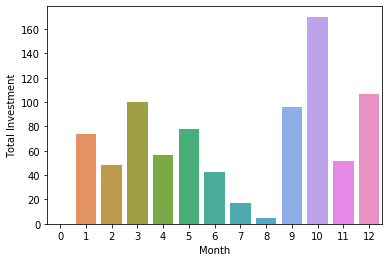

In [101]:
sns.barplot(x='Month', y='Total Investment', data= ad_dtls_long)

In [102]:
#total week in month calculation
df=media_investment['Date'].dt.days_in_month
df=df/7
df

0    4.43
1    4.43
2    4.29
3    4.43
4    4.29
5    4.43
6    4.43
7    4.14
8    4.43
9    4.29
10   4.43
11   4.29
12    nan
13    nan
14    nan
15    nan
Name: Date, dtype: float64

In [103]:
## converting montly spend to weekly
media_investment['Total Investment'] =media_investment['Total Investment']/df
media_investment['TV'] =media_investment['TV']/df
media_investment['Digital'] =media_investment['Digital']/df
media_investment['Sponsorship'] =media_investment['Sponsorship']/df
media_investment['Content Marketing'] =media_investment['Content Marketing']/df
media_investment['Online marketing'] =media_investment['Online marketing']/df
media_investment[' Affiliates'] =media_investment[' Affiliates']/df
media_investment['SEM'] =media_investment['SEM']/df
media_investment['Radio'] =media_investment['Radio']/df
media_investment['Other'] =media_investment['Other']/df
media_investment.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,Date,week
0,2015,7,3.85,0.05,0.57,1.67,0.00,0.30,0.12,1.13,0.00,0.00,2015-07-01,27.00
1,2015,8,1.14,0.00,0.29,0.24,0.00,0.03,0.02,0.57,0.00,0.00,2015-08-01,31.00
2,2015,9,22.46,0.91,0.32,14.65,0.14,3.82,1.18,1.45,0.00,0.00,2015-09-01,36.00
3,2015,10,38.42,1.39,2.85,19.12,0.78,5.50,1.57,7.21,0.00,0.00,2015-10-01,40.00
4,2015,11,11.95,0.98,0.30,3.31,0.04,4.56,1.54,1.22,0.00,0.00,2015-11-01,44.00


In [104]:
## Converting media investement into crores
media_investment['Total Investment'] =media_investment['Total Investment']*10000000
media_investment['TV'] =media_investment['TV']*10000000
media_investment['Digital'] =media_investment['Digital']*10000000
media_investment['Sponsorship'] =media_investment['Sponsorship']*10000000
media_investment['Content Marketing'] =media_investment['Content Marketing']*10000000
media_investment['Online marketing'] =media_investment['Online marketing']*10000000
media_investment['SEM'] =media_investment['SEM']*10000000
media_investment['Radio'] =media_investment['Radio']*10000000
media_investment['Other'] =media_investment['Other']*10000000
media_investment[' Affiliates'] =media_investment[' Affiliates']*10000000
media_investment.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,Date,week
0,2015,7,"38,526,589.71","486,229.49","5,719,708.37","16,741,899.40","2,106.54","2,997,078.44","1,235,734.52","11,343,832.94",0.00,0.00,2015-07-01,27.00
1,2015,8,"11,435,529.88","14,537.58","2,885,972.84","2,401,071.71",14.28,"291,841.89","166,383.18","5,675,708.40",0.00,0.00,2015-08-01,31.00
2,2015,9,"224,593,553.02","9,052,175.11","3,165,231.06","146,504,519.73","1,424,014.86","38,219,976.65","11,755,954.50","14,471,681.11",0.00,0.00,2015-09-01,36.00
3,2015,10,"384,223,897.28","13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00,2015-10-01,40.00
4,2015,11,"119,504,514.30","9,848,136.06","2,976,094.31","33,068,270.48","393,477.44","45,643,673.48","15,390,121.96","12,184,740.57",0.00,0.00,2015-11-01,44.00


In [105]:
#ad_dtls=ad_dtls[['Total Investment','TV','Digital','Sponsorship','Content Marketing','Online marketing','SEM','Radio','Other',' Affiliates','Date','week']]
media_investment=media_investment[['Year','Month','Total Investment','TV','Digital','Sponsorship','Content Marketing','Online marketing','SEM','Radio','Other',' Affiliates','week']]
#media_investment.head()

##### inv=media_investment.to_csv('media.csv')

In [107]:
##### NPS Investments
nps= pd.read_excel(r"C:\Users\sohin\Downloads\Media data and other information.xlsx", sheet_name ='Monthly NPS Score',skiprows=1,header=None)
nps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NPS,54.60,59.99,46.93,44.40,47.00,45.80,47.09,50.33,49.02,51.83,47.31,50.52
1,Stock Index,"1,177.00","1,206.00","1,101.00","1,210.00","1,233.00","1,038.00","1,052.00","1,222.00","1,015.00","1,242.00","1,228.00","1,194.00"


In [108]:
#transpose of data frame
nps=nps.transpose()
nps.head()

,0,1
0,NPS,Stock Index
1,54.60,"1,177.00"
2,59.99,"1,206.00"
3,46.93,"1,101.00"
4,44.40,"1,210.00"


In [109]:
#renaming columns
nps=nps.rename(columns = {0: "Date",1:"NPS",2:"Stock Index"})
nps.head()

,Date,NPS
0,NPS,Stock Index
1,54.60,"1,177.00"
2,59.99,"1,206.00"
3,46.93,"1,101.00"
4,44.40,"1,210.00"


In [110]:
#drop unnecessary row
nps=nps.drop(nps.index[0])

In [111]:
#replace month value
nps['Date'] =nps['Date'].astype(str).replace("July'15","2015-07-01")
nps['Date'] =nps['Date'].astype(str).replace("Aug'15","2015-08-01")
nps['Date'] =nps['Date'].astype(str).replace("Sept'15","2015-09-01")
nps['Date'] =nps['Date'].astype(str).replace("Oct'15","2015-10-01")
nps['Date'] =nps['Date'].astype(str).replace("Nov'15","2015-11-01")

nps['Date'] =nps['Date'].astype(str).replace("Dec'15","2015-12-01")
nps['Date'] =nps['Date'].astype(str).replace("Jan'16","2016-01-01")
nps['Date'] =nps['Date'].astype(str).replace("Feb'16","2016-02-01")
nps['Date'] =nps['Date'].astype(str).replace("Mar'16","2016-03-01")
nps['Date'] =nps['Date'].astype(str).replace("Apr'16","2016-04-01")
nps['Date'] =nps['Date'].astype(str).replace("May'16","2016-05-01")
nps['Date'] =nps['Date'].astype(str).replace("June'16","2016-06-01")

nps

,Date,NPS
1,54.599588092376216,"1,177.00"
2,59.987101024,"1,206.00"
3,46.925418687263985,"1,101.00"
4,44.3983889339963,"1,210.00"
5,46.99999999999999,"1,233.00"
6,45.8,"1,038.00"
7,47.09303132503366,"1,052.00"
8,50.32740649908032,"1,222.00"
9,49.02055041461363,"1,015.00"
10,51.82760501909438,"1,242.00"


In [115]:
#convert to date
import pandas as pd

nps['Date'] = pd.to_datetime(nps['Date'], errors = 'coerce')
nps.head()

,Date,NPS
1,NaT,"1,177.00"
2,NaT,"1,206.00"
3,NaT,"1,101.00"
4,NaT,"1,210.00"
5,NaT,"1,233.00"


In [116]:
#converting weekly NPS
nps['week']=nps['Date'].dt.week
nps.head()

,Date,NPS,week
1,NaT,"1,177.00",nan
2,NaT,"1,206.00",nan
3,NaT,"1,101.00",nan
4,NaT,"1,210.00",nan
5,NaT,"1,233.00",nan


In [117]:
#Total no of weeks in a moth
nps_df=nps['Date'].dt.days_in_month
nps_df=nps_df/7
nps_df.head()

1   nan
2   nan
3   nan
4   nan
5   nan
Name: Date, dtype: float64

In [118]:
nps['Year']=nps['Date'].dt.year
nps.head()

,Date,NPS,week,Year
1,NaT,"1,177.00",nan,nan
2,NaT,"1,206.00",nan,nan
3,NaT,"1,101.00",nan,nan
4,NaT,"1,210.00",nan,nan
5,NaT,"1,233.00",nan,nan


In [119]:
# month
nps['Month']=nps['Date'].dt.month
nps

,Date,NPS,week,Year,Month
1,NaT,"1,177.00",nan,nan,nan
2,NaT,"1,206.00",nan,nan,nan
3,NaT,"1,101.00",nan,nan,nan
4,NaT,"1,210.00",nan,nan,nan
5,NaT,"1,233.00",nan,nan,nan
6,NaT,"1,038.00",nan,nan,nan
7,NaT,"1,052.00",nan,nan,nan
8,NaT,"1,222.00",nan,nan,nan
9,NaT,"1,015.00",nan,nan,nan
10,NaT,"1,242.00",nan,nan,nan


In [120]:
#NPS score based on weekly basis
nps['NPSScore'] = nps['NPS']/nps_df
nps.head()

,Date,NPS,week,Year,Month,NPSScore
1,NaT,"1,177.00",nan,nan,nan,NaN
2,NaT,"1,206.00",nan,nan,nan,NaN
3,NaT,"1,101.00",nan,nan,nan,NaN
4,NaT,"1,210.00",nan,nan,nan,NaN
5,NaT,"1,233.00",nan,nan,nan,NaN


In [122]:
#nps=nps[['Date','NPS','Year','Month','NPSScore']]
nps=nps[['NPS','Year','Month','NPSScore']]
nps.head()

,NPS,Year,Month,NPSScore
1,"1,177.00",nan,nan,NaN
2,"1,206.00",nan,nan,NaN
3,"1,101.00",nan,nan,NaN
4,"1,210.00",nan,nan,NaN
5,"1,233.00",nan,nan,NaN


In [124]:
#spl_dates
import datetime as dt
Spl_date = pd.to_datetime(["2015-07-01","2015-07-18","2015-07-19","2015-08-03","2015-08-15","2015-08-16","2015-08-17","2015-08-28","2015-08-29","2015-08-30","2015-09-07","2015-10-12","2015-10-15","2015-10-16","2015-10-17","2015-11-07","2015-11-08","2015-11-09","2015-11-10","2015-11-11","2015-11-12","2015-11-13","2015-11-14","2015-12-25","2015-12-26","2015-12-27","2015-12-28","2015-12-29","2015-12-30","2015-12-31","2016-01-01","2016-01-02","2016-01-03","2016-01-20","2016-01-21","2016-01-22","2016-02-01",
                "2016-02-02","2016-02-14","2016-02-15","2016-02-20","2016-02-21","2016-03-07","2016-03-08","2016-03-09","2016-03-25","2016-05-23","2016-05-25","2016-05-26","2016-05-27"])

In [125]:
Spl_date

DatetimeIndex(['2015-07-01', '2015-07-18', '2015-07-19', '2015-08-03',
               '2015-08-15', '2015-08-16', '2015-08-17', '2015-08-28',
               '2015-08-29', '2015-08-30', '2015-09-07', '2015-10-12',
               '2015-10-15', '2015-10-16', '2015-10-17', '2015-11-07',
               '2015-11-08', '2015-11-09', '2015-11-10', '2015-11-11',
               '2015-11-12', '2015-11-13', '2015-11-14', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31', '2016-01-01', '2016-01-02',
               '2016-01-03', '2016-01-20', '2016-01-21', '2016-01-22',
               '2016-02-01', '2016-02-02', '2016-02-14', '2016-02-15',
               '2016-02-20', '2016-02-21', '2016-03-07', '2016-03-08',
               '2016-03-09', '2016-03-25', '2016-05-23', '2016-05-25',
               '2016-05-26', '2016-05-27'],
              dtype='datetime64[ns]', freq=None)

In [126]:
df_spl = pd.DataFrame({'order_date': Spl_date, 'Sale': 'Y'}) 
df_spl.head()

,order_date,Sale
0,2015-07-01,Y
1,2015-07-18,Y
2,2015-07-19,Y
3,2015-08-03,Y
4,2015-08-15,Y


In [127]:
# Convert to datetime
df_spl['order_date'] = pd.to_datetime(df_spl['order_date'], errors = 'coerce')
df_spl.head()

,order_date,Sale
0,2015-07-01,Y
1,2015-07-18,Y
2,2015-07-19,Y
3,2015-08-03,Y
4,2015-08-15,Y


In [128]:
df_spl['week']=df_spl['order_date'].dt.week
df_spl.head()

,order_date,Sale,week
0,2015-07-01,Y,27
1,2015-07-18,Y,29
2,2015-07-19,Y,29
3,2015-08-03,Y,32
4,2015-08-15,Y,33


In [129]:
df_spl['Year']=df_spl['order_date'].dt.year
df_spl.head()

,order_date,Sale,week,Year
0,2015-07-01,Y,27,2015
1,2015-07-18,Y,29,2015
2,2015-07-19,Y,29,2015
3,2015-08-03,Y,32,2015
4,2015-08-15,Y,33,2015


In [130]:
df_spl['holiday_count']= 1
df_spl.head()

,order_date,Sale,week,Year,holiday_count
0,2015-07-01,Y,27,2015,1
1,2015-07-18,Y,29,2015,1
2,2015-07-19,Y,29,2015,1
3,2015-08-03,Y,32,2015,1
4,2015-08-15,Y,33,2015,1


In [131]:
#sum holiday_cnt based on year & week
#group by year,week & sum holidayctn--KPI

df_spl=df_spl.groupby(['week','Year'], as_index=False).agg({"holiday_count": "sum"})
df_spl.head()

,week,Year,holiday_count
0,3,2016,3
1,5,2016,2
2,6,2016,1
3,7,2016,3
4,10,2016,3


In [132]:
#eleckart_master=pd.merge(data,media_investment,on=['Year','Month'])

media_investment['Month'] = media_investment['Month'].astype(int)

In [133]:
### Merging Media investment and nps data frame with data frame to create eleckart_master
eleckart_master=pd.merge(data,media_investment,how='left',on=['Year','Month'])
eleckart_master=pd.merge(eleckart_master, nps,how='left',on=['Year','Month'])

In [134]:
eleckart_master.rename(columns={'week_x':'week'},inplace=True)

In [135]:
eleckart_master=pd.merge(eleckart_master,df_spl,how='left',on=['Year','week'] )
#eleckart_master=pd.merge(eleckart_master,df_on,how='left',on=['Year','Month'] )
eleckart_master.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,Content Marketing,Online marketing,SEM,Radio,Other,Affiliates,week_y,NPS,NPSScore,holiday_count
0,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,COD,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,NaN,4.00
1,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,0,0,COD,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,NaN,nan
2,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,0,0,COD,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,NaN,nan
3,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,0,0,Prepaid,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,NaN,4.00
4,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,Prepaid,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,NaN,4.00


In [136]:
# Setting the holiday count to where NA's are present (means no holidays for those weeks)--KPI
listcol=['holiday_count']

eleckart_master[listcol]=eleckart_master[listcol].apply(lambda x: x.fillna(0)) 
eleckart_master.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,Content Marketing,Online marketing,SEM,Radio,Other,Affiliates,week_y,NPS,NPSScore,holiday_count
0,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,COD,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,NaN,4.00
1,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,0,0,COD,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,NaN,0.00
2,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,0,0,COD,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,NaN,0.00
3,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,0,0,Prepaid,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,NaN,4.00
4,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,Prepaid,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,NaN,4.00


In [137]:
#Define item-type--KPI
eleckart_master['ItemType'] = eleckart_master.gmvperunit.apply(lambda x: 'Luxury' if x >= typetemp else 'MassMarket')
eleckart_master.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,Online marketing,SEM,Radio,Other,Affiliates,week_y,NPS,NPSScore,holiday_count,ItemType
0,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,COD,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,NaN,4.00,Luxury
1,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,0,0,COD,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,NaN,0.00,Luxury
2,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,0,0,COD,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,NaN,0.00,MassMarket
3,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,0,0,Prepaid,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,NaN,4.00,MassMarket
4,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,Prepaid,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,NaN,4.00,MassMarket


In [138]:
## Create a year-month columns
eleckart_master['month_date']=eleckart_master['order_date'].map(str) + '-' + eleckart_master['Month'].map(str)
eleckart_master.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,SEM,Radio,Other,Affiliates,week_y,NPS,NPSScore,holiday_count,ItemType,month_date
0,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,COD,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,NaN,4.00,Luxury,2015-10-17-10
1,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,0,0,COD,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,NaN,0.00,Luxury,2015-10-19-10
2,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,0,0,COD,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,NaN,0.00,MassMarket,2015-10-20-10
3,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,NaN,4.00,MassMarket,2015-10-14-10
4,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,NaN,4.00,MassMarket,2015-10-17-10


In [139]:
#eleckart_master[['special_sale']].unique()
eleckart_master.special_sale.unique()

array(['Daussera', 'Regular Day', 'Diwali', 'FHSD', 'BED',
       'Rakshabandhan', 'Republic Day', 'Christmas & New Year', 'BSD',
       'Valentine Day', 'Pacman', 'Eid & Rathayatra'], dtype=object)

 ## Exploratory Data Analysis 

In [140]:
### Aggregated Monthly orders
monthly_units_sold=eleckart_master.groupby(['month_date'], as_index=False).agg({"units": "sum"})
monthly_units_sold

,month_date,units
0,2015-07-01-7,6
1,2015-07-03-7,69
2,2015-07-04-7,15
3,2015-07-06-7,4
4,2015-07-07-7,1798
...,...,...
314,2016-06-25-6,1118
315,2016-06-26-6,1064
316,2016-06-27-6,1085
317,2016-06-28-6,1160


In [141]:
monthly_units_sold=eleckart_master.groupby(['Month'], as_index=False).agg({"units": "sum"}).sort_values(['units'], ascending=[False])
monthly_units_sold

,Month,units
9,10,60609
4,5,53657
1,2,53617
2,3,51406
0,1,50464
11,12,47671
3,4,46386
10,11,42141
5,6,40719
6,7,29434


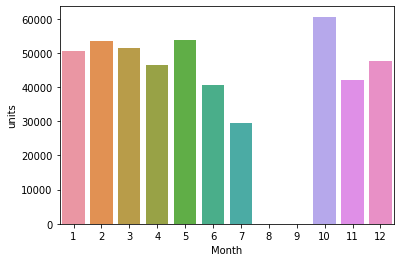

In [142]:
sns.barplot(x='Month', y='units', data= monthly_units_sold)

##### October (2015) month placed highest order

In [143]:
### Aggregated Weekly orders
weekly_units_sold=eleckart_master.groupby(['week'], as_index=False).agg({"units": "sum"}).sort_values(['units'], ascending=[False])
weekly_units_sold

,week,units
40,42,30092
16,17,18274
6,7,15379
9,10,14693
20,21,13858
2,3,13306
7,8,13229
50,52,13209
0,1,13050
43,45,12952


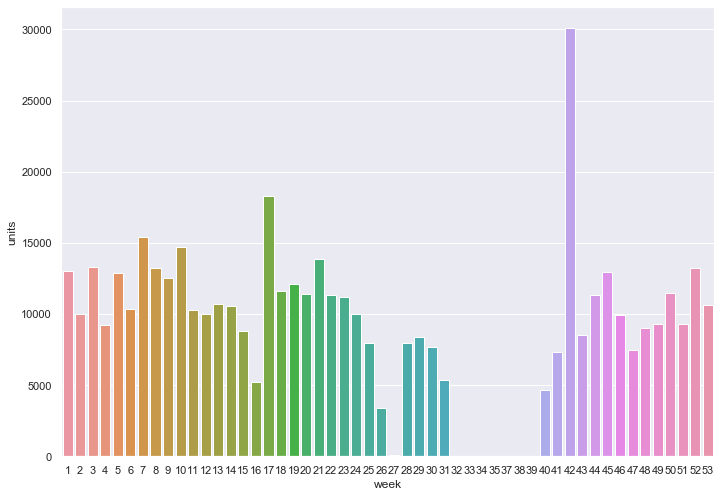

In [144]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='week', y='units', data= weekly_units_sold)

##### 42th week of 2015 placed highest orders

In [145]:
#Revenue analysis month-wise
monthly_gmv=eleckart_master.groupby(['Month'], as_index=False).agg({"gmv": "sum"}).sort_values(['gmv'], ascending=[False])
monthly_gmv

,Month,gmv
9,10,"79,345,600.74"
11,12,"64,575,579.42"
0,1,"63,165,692.14"
4,5,"60,833,803.24"
2,3,"60,627,983.65"
1,2,"59,847,454.94"
10,11,"53,658,860.01"
3,4,"52,857,970.01"
5,6,"47,262,897.25"
6,7,"42,204,753.99"


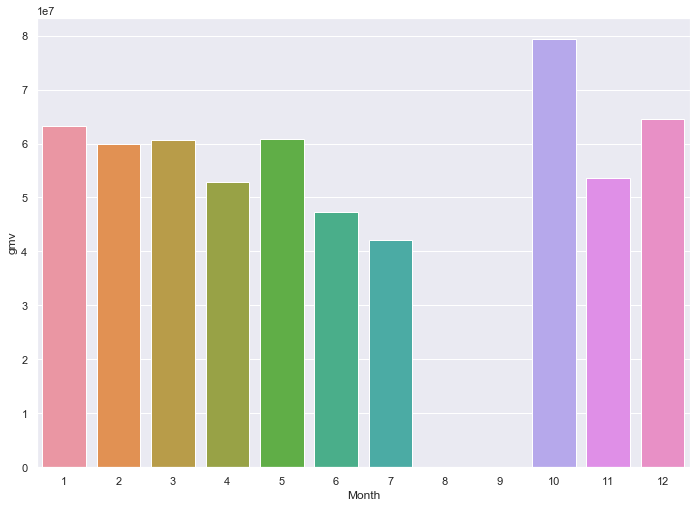

In [146]:
sns.barplot(x='Month', y='gmv', data= monthly_gmv)

In [147]:
#Revenue analysis week-wise
weekly_gmv=eleckart_master.groupby(['week'], as_index=False).agg({"gmv": "sum"}).sort_values(['gmv'], ascending=[False])
weekly_gmv

,week,gmv
40,42,"39,230,426.60"
16,17,"20,660,164.00"
9,10,"18,877,179.14"
50,52,"17,592,288.25"
2,3,"17,036,924.64"
20,21,"16,995,709.33"
6,7,"16,792,474.19"
43,45,"16,574,053.71"
48,50,"16,253,880.92"
0,1,"15,334,237.00"


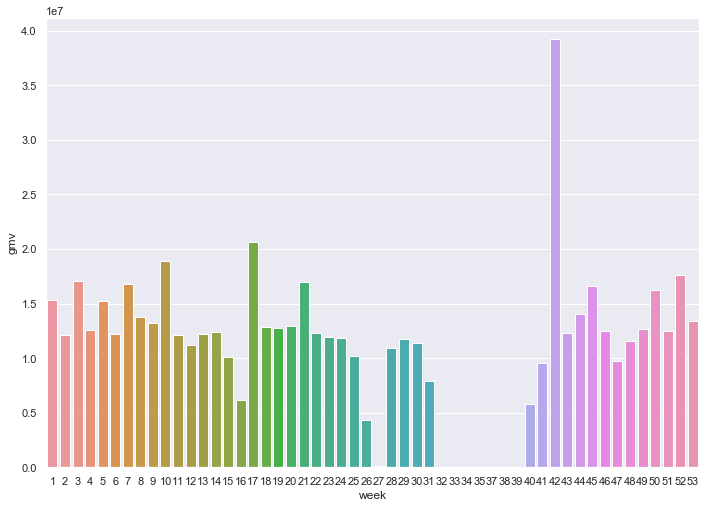

In [148]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='week', y='gmv', data= weekly_gmv)

In [149]:
### Aggregated orders by product sub-category
product_units_sold=eleckart_master.groupby(['product_analytic_sub_category'], as_index=False).agg({"units": "sum"}).sort_values(['units'], ascending=[False])
product_units_sold

,product_analytic_sub_category,units
0,CameraAccessory,201401
1,GamingAccessory,176407
2,HomeAudio,98320


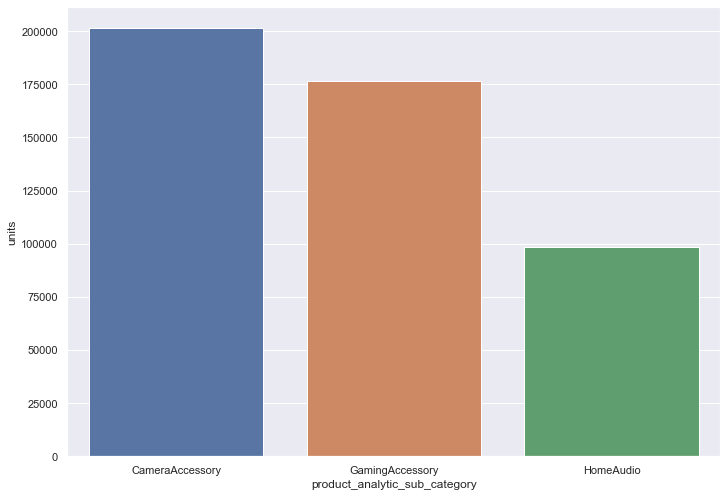

In [150]:
sns.barplot(x='product_analytic_sub_category', y='units', data= product_units_sold)

In [151]:
### Aggregated Monthly orders by product sub-category by monthly
monthly_product_units_sold=eleckart_master.groupby(['product_analytic_sub_category','month_date'], as_index=False).agg({"units": "sum"}).sort_values(['units'], ascending=[False])
monthly_product_units_sold

,product_analytic_sub_category,month_date,units
241,CameraAccessory,2016-04-27-4,5938
359,GamingAccessory,2015-10-16-10,5342
47,CameraAccessory,2015-10-16-10,5293
553,GamingAccessory,2016-04-27-4,4464
662,HomeAudio,2015-10-16-10,3125
...,...,...,...
340,GamingAccessory,2015-08-12-8,1
338,GamingAccessory,2015-08-07-8,1
337,GamingAccessory,2015-08-06-8,1
334,GamingAccessory,2015-08-01-8,1


In [152]:
#monthly revenue
monthly_product_gmv=eleckart_master.groupby(['product_analytic_sub_category','Month'], as_index=False).agg({"gmv": "sum"}).sort_values(['gmv'], ascending=[False])
monthly_product_gmv

,product_analytic_sub_category,Month,gmv
33,HomeAudio,10,"36,096,374.00"
9,CameraAccessory,10,"28,074,494.59"
4,CameraAccessory,5,"27,289,482.00"
11,CameraAccessory,12,"25,351,576.00"
35,HomeAudio,12,"24,592,665.92"
24,HomeAudio,1,"24,358,282.34"
25,HomeAudio,2,"24,023,834.36"
2,CameraAccessory,3,"23,769,859.00"
0,CameraAccessory,1,"23,295,342.00"
3,CameraAccessory,4,"22,793,437.00"


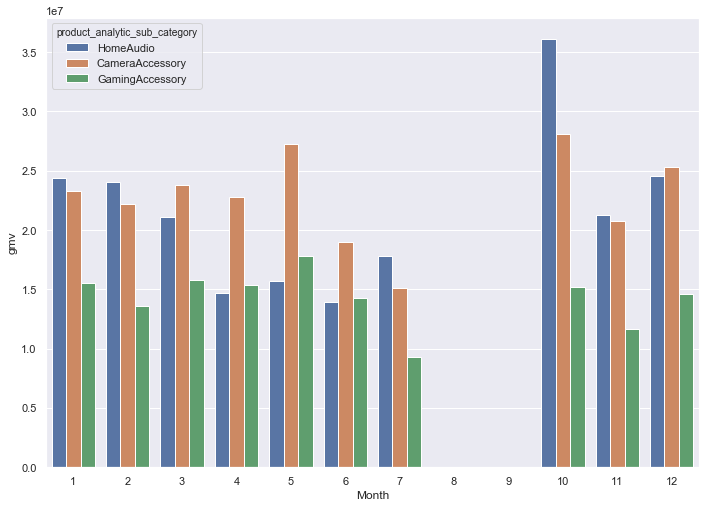

In [153]:
sns.barplot(x='Month', y='gmv', hue='product_analytic_sub_category',data= monthly_product_gmv)

In [154]:
#Weekly revenue
weekly_product_gmv=eleckart_master.groupby(['product_analytic_sub_category','week'], as_index=False).agg({"gmv": "sum"}).sort_values(['gmv'], ascending=[False])
weekly_product_gmv

,product_analytic_sub_category,week,gmv
132,HomeAudio,42,"19,172,852.00"
35,CameraAccessory,42,"12,862,543.98"
16,CameraAccessory,17,"8,934,564.00"
20,CameraAccessory,21,"8,041,519.00"
9,CameraAccessory,10,"7,680,343.00"
...,...,...,...
78,GamingAccessory,32,"2,295.00"
81,GamingAccessory,37,360.00
31,CameraAccessory,35,285.00
82,GamingAccessory,38,284.00


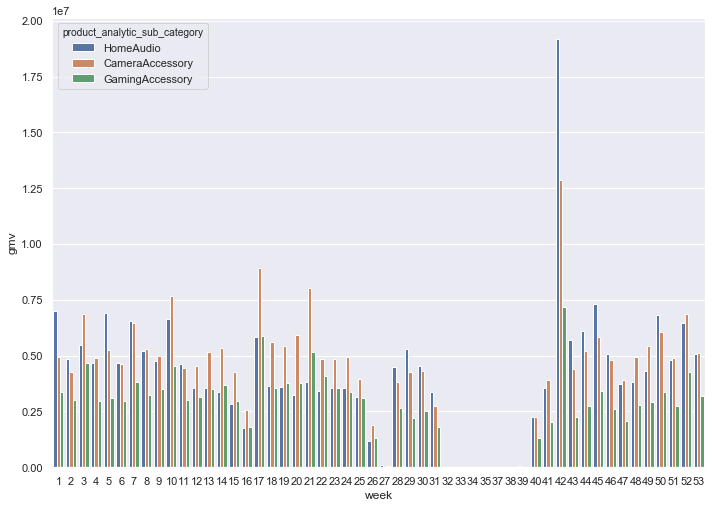

In [155]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='week', y='gmv', hue='product_analytic_sub_category',data= weekly_product_gmv)

In [156]:
monthly_product_units_sold_df=eleckart_master.groupby(['product_analytic_sub_category','Month'], as_index=False).agg({"units": "sum"}).sort_values(['units'], ascending=[False])
monthly_product_units_sold_df

,product_analytic_sub_category,Month,units
4,CameraAccessory,5,26010
9,CameraAccessory,10,23600
3,CameraAccessory,4,23328
2,CameraAccessory,3,22628
1,CameraAccessory,2,22356
21,GamingAccessory,10,21106
16,GamingAccessory,5,20455
13,GamingAccessory,2,19999
0,CameraAccessory,1,19668
12,GamingAccessory,1,19437


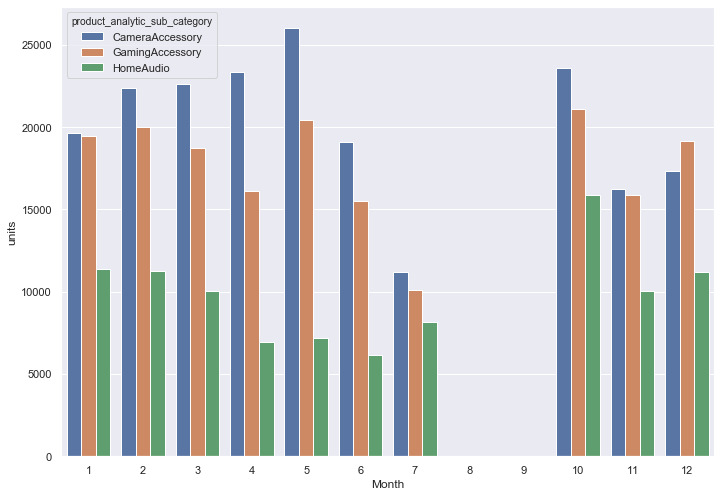

In [157]:
sns.barplot(x='Month', y='units', hue='product_analytic_sub_category',data= monthly_product_units_sold_df)

In [158]:
### Aggregated Monthly orders by product sub-category by weekly
weekly_product_units_sold=eleckart_master.groupby(['product_analytic_sub_category','week'], as_index=False).agg({"units": "sum"}).sort_values(['units'], ascending=[False]).sort_values(['units'], ascending=[False])
weekly_product_units_sold

,product_analytic_sub_category,week,units
85,GamingAccessory,42,11351
35,CameraAccessory,42,10785
16,CameraAccessory,17,8907
132,HomeAudio,42,7956
20,CameraAccessory,21,6613
...,...,...,...
129,HomeAudio,39,1
31,CameraAccessory,35,1
80,GamingAccessory,34,1
81,GamingAccessory,37,1


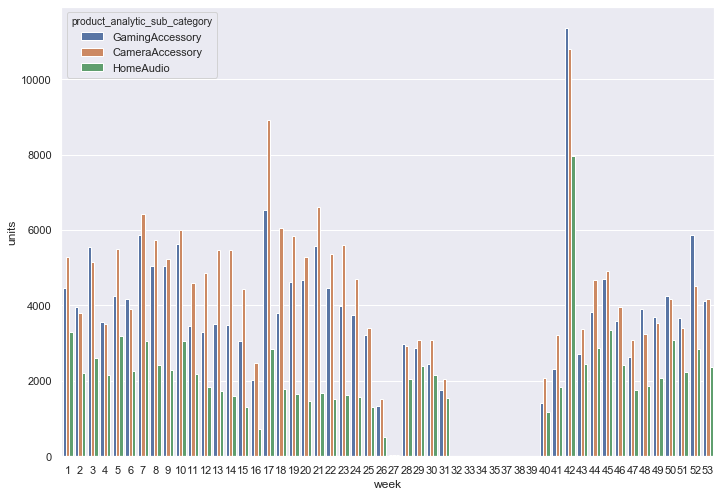

In [159]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='week', y='units',hue='product_analytic_sub_category', data= weekly_product_units_sold)

In [160]:
### Aggregated units sold by top 10 Product Vertical
product_vertical_units_sold=eleckart_master.loc[(eleckart_master['product_analytic_sub_category'] =='CameraAccessory') | (eleckart_master['product_analytic_sub_category']=='GamingAccessory') | (eleckart_master['product_analytic_sub_category']=='HomeAudio')]
product_vertical_units_sold.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,SEM,Radio,Other,Affiliates,week_y,NPS,NPSScore,holiday_count,ItemType,month_date
0,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,COD,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,NaN,4.00,Luxury,2015-10-17-10
1,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,0,0,COD,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,NaN,0.00,Luxury,2015-10-19-10
2,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,0,0,COD,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,NaN,0.00,MassMarket,2015-10-20-10
3,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,NaN,4.00,MassMarket,2015-10-14-10
4,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,NaN,4.00,MassMarket,2015-10-17-10


In [161]:
product_vertical_units_sold_top10=product_vertical_units_sold.groupby(['product_analytic_vertical'], as_index=False).agg({"units": "sum"}).sort_values(['units'], ascending=[False])
product_vertical_units_sold_top10.head(10)

,product_analytic_vertical,units
35,HomeAudioSpeaker,70753
28,GamingHeadset,57904
24,GamePad,48468
21,Flash,47374
31,GamingMouse,34525
4,CameraBattery,33315
38,Lens,29676
13,CameraTripod,27129
19,FMRadio,18828
3,CameraBag,14651


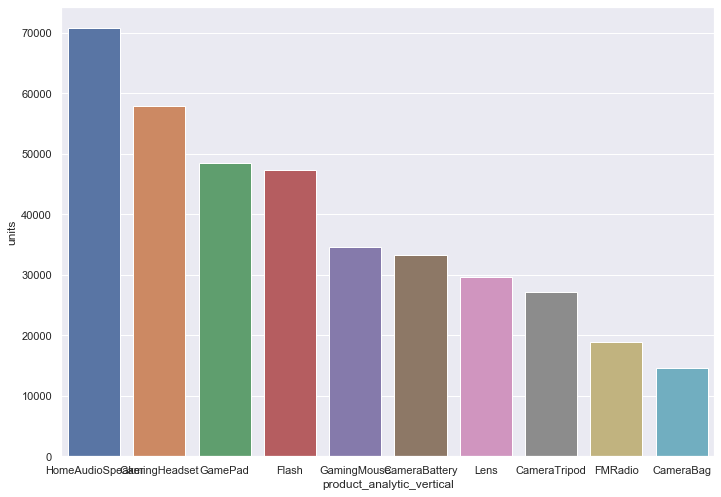

In [162]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='product_analytic_vertical', y='units', data= product_vertical_units_sold_top10.head(10))

In [163]:
### Aggregated Product units sold on weekdays/weekends
wday_units_sold=eleckart_master.groupby(['wday','week'], as_index=False).agg({"units": "sum"}).sort_values(['units'], ascending=[False])
wday_units_sold

,wday,week,units
218,4,42,13760
108,2,17,12364
263,5,42,4929
172,3,42,4205
146,3,7,3302
...,...,...,...
214,4,32,1
259,5,31,1
78,1,38,1
169,3,32,1


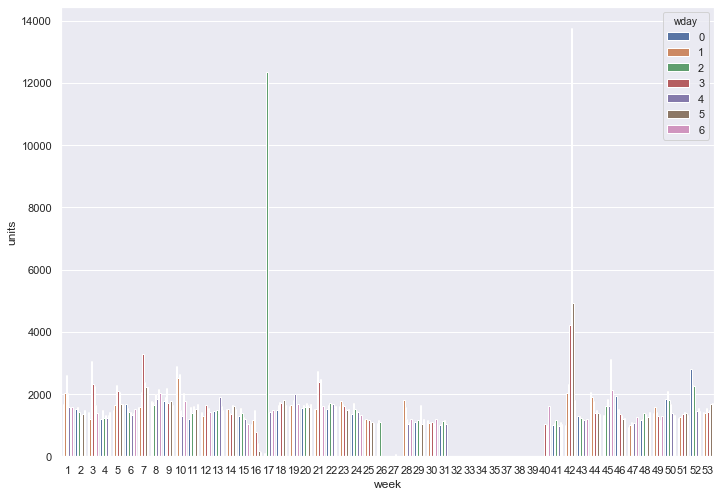

In [164]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='week', y='units',hue='wday',data= wday_units_sold)

In [165]:
wday_gmv=eleckart_master.groupby(['wday','week'], as_index=False).agg({"gmv": "sum"}).sort_values(['gmv'], ascending=[False])
wday_gmv.head()

,wday,week,gmv
218,4,42,"16,116,048.37"
108,2,17,"13,949,856.00"
263,5,42,"7,104,784.23"
172,3,42,"4,818,036.50"
128,2,42,"4,679,104.50"


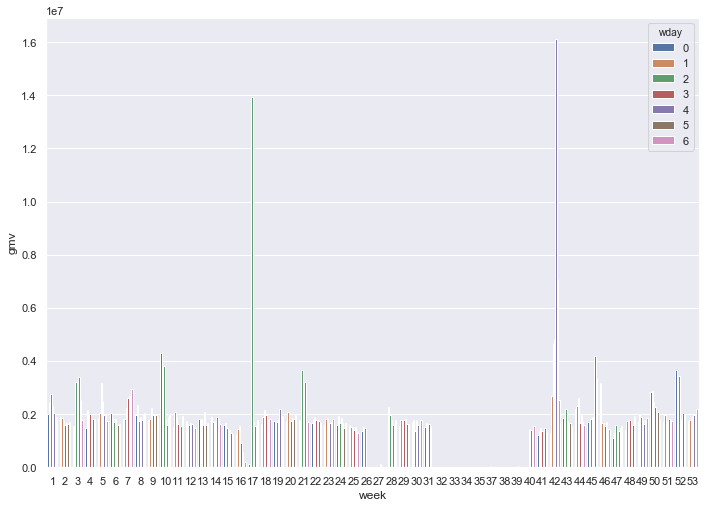

In [166]:
sns.barplot(x='week', y='gmv',hue="wday", data= wday_gmv)

In [167]:
### Aggregated Product units sold on holidays
holiday_units_sold=eleckart_master.groupby(['week','is_holiday'], as_index=False).agg({"units": "sum"}).sort_values(['units'], ascending=[False])
holiday_units_sold.head()

,week,is_holiday,units
52,42,1,23906
22,17,0,18274
11,8,0,13229
0,1,0,13050
12,9,0,12554


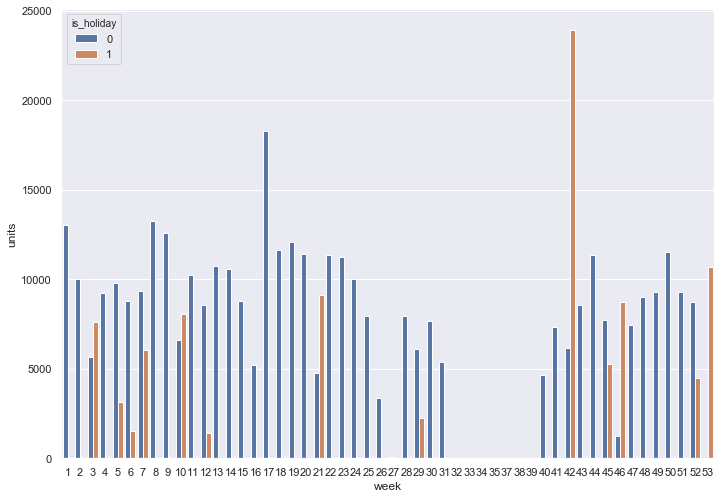

In [168]:
sns.barplot(x='week', y='units',hue='is_holiday',data= holiday_units_sold)

In [169]:
holiday_gmv=eleckart_master.groupby(['week','is_holiday'], as_index=False).agg({"gmv": "sum"}).sort_values(['gmv'], ascending=[False])
holiday_gmv.head()

,week,is_holiday,gmv
52,42,1,"29,343,976.10"
22,17,0,"20,660,164.00"
62,50,0,"16,253,880.92"
0,1,0,"15,334,237.00"
54,44,0,"14,029,672.46"


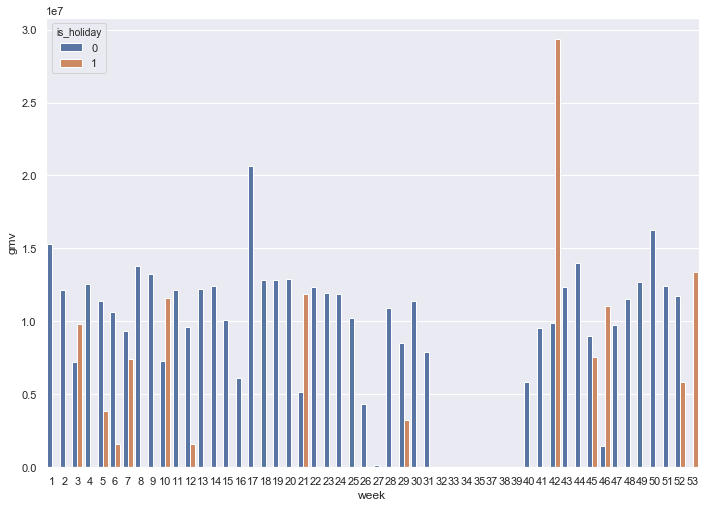

In [170]:
sns.barplot(x='week', y='gmv',hue='is_holiday',data= holiday_gmv)

In [171]:
### Aggregated Product units sold on payday
payday_units_sold=eleckart_master.groupby(['week','Pay_Day'], as_index=False).agg({"units": "sum"}).sort_values(['units'], ascending=[False])
payday_units_sold.head()

,week,Pay_Day,units
55,42,0,25887
23,17,0,16776
13,10,0,14693
29,21,0,13858
8,7,0,13796


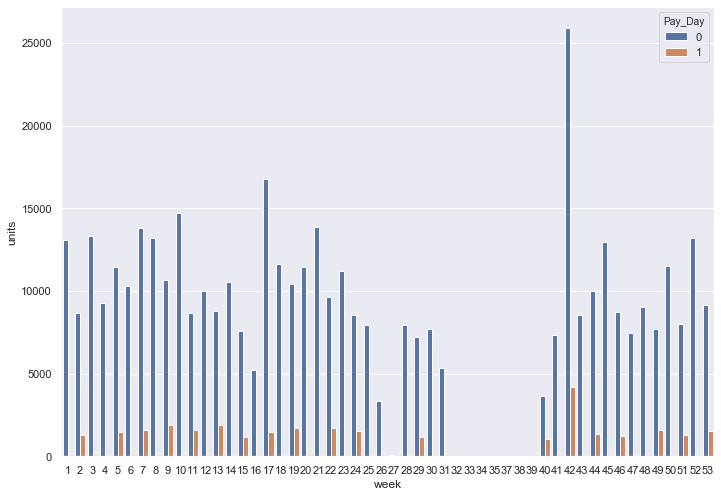

In [172]:
sns.barplot(x='week', y='units',hue='Pay_Day',data= payday_units_sold)

In [173]:
payday_gmv=eleckart_master.groupby(['week','Pay_Day'], as_index=False).agg({"gmv": "sum"}).sort_values(['gmv'], ascending=[False])
payday_gmv.head()

,week,Pay_Day,gmv
55,42,0,"34,412,390.10"
13,10,0,"18,877,179.14"
23,17,0,"18,870,164.00"
70,52,0,"17,592,288.25"
3,3,0,"17,036,924.64"


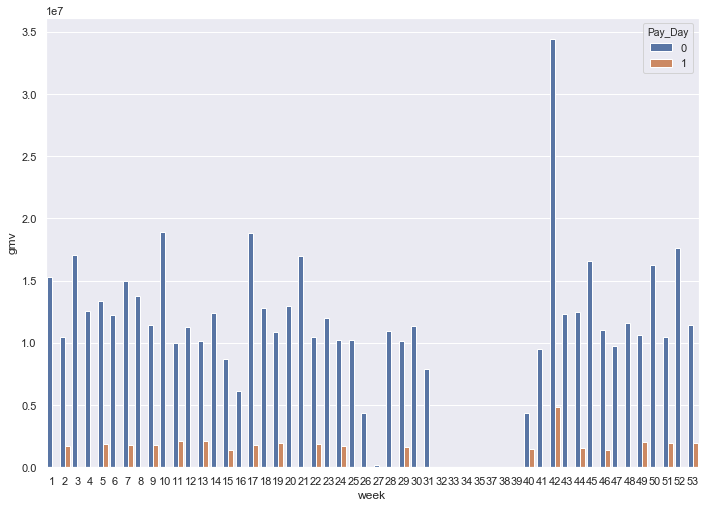

In [174]:
sns.barplot(x='week', y='gmv',hue='Pay_Day',data= payday_gmv)

In [175]:
master_special_sale_day_units_sold=eleckart_master.loc[(eleckart_master['special_sale']!='Regular Day')]
master_special_sale_day_units_sold.head()
#eleckart_master

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,SEM,Radio,Other,Affiliates,week_y,NPS,NPSScore,holiday_count,ItemType,month_date
0,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,COD,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,NaN,4.00,Luxury,2015-10-17-10
4,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,NaN,4.00,MassMarket,2015-10-17-10
5,2015-10-17,2015,10,"3,419,188,825,145,600.00","3,419,188,825,145,600.00","3,324.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,NaN,4.00,Luxury,2015-10-17-10
6,2015-10-16,2015,10,"3,418,428,515,041,500.00","3,418,428,515,041,500.00","3,695.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,NaN,4.00,Luxury,2015-10-16-10
7,2015-10-15,2015,10,"3,417,799,002,820,700.00","3,417,799,002,820,700.00","3,695.00",1,0,0,COD,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,NaN,4.00,Luxury,2015-10-15-10


In [176]:
master_special_sale_day_sold=master_special_sale_day_units_sold.groupby(['special_sale','week'], as_index=False).agg({"units": "sum"}).sort_values(['units'], ascending=[False])
master_special_sale_day_sold

,special_sale,week,units
4,Daussera,42,22894
3,Christmas & New Year,53,10655
6,Diwali,46,8722
1,BSD,10,8069
11,Republic Day,3,7637
9,Pacman,21,7584
5,Diwali,45,5249
2,Christmas & New Year,52,4475
8,FHSD,7,4447
0,BED,5,3126


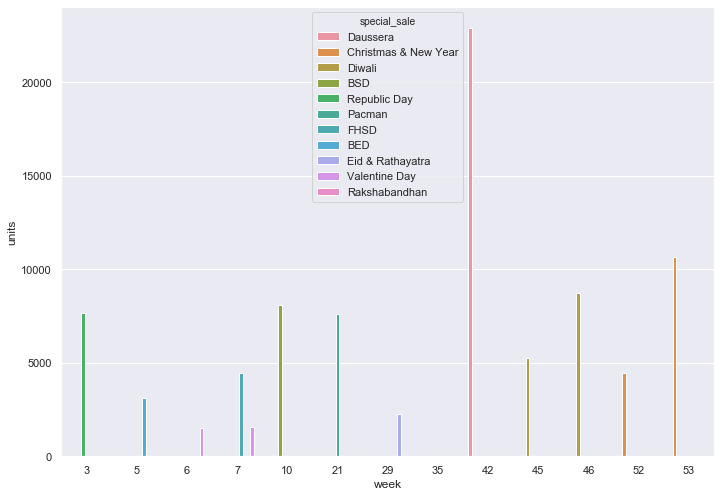

In [177]:
sns.barplot(x='week', y='units',hue='special_sale',data= master_special_sale_day_sold)

In [178]:
master_special_sale_gmv=master_special_sale_day_units_sold.groupby(['special_sale','week'], as_index=False).agg({"gmv": "sum"}).sort_values(['gmv'], ascending=[False])
master_special_sale_gmv

,special_sale,week,gmv
4,Daussera,42,"28,038,869.10"
3,Christmas & New Year,53,"13,410,163.25"
1,BSD,10,"11,613,609.64"
6,Diwali,46,"11,068,038.80"
9,Pacman,21,"10,065,285.58"
11,Republic Day,3,"9,814,269.19"
5,Diwali,45,"7,562,064.21"
2,Christmas & New Year,52,"5,821,614.00"
8,FHSD,7,"5,614,166.44"
0,BED,5,"3,889,371.50"


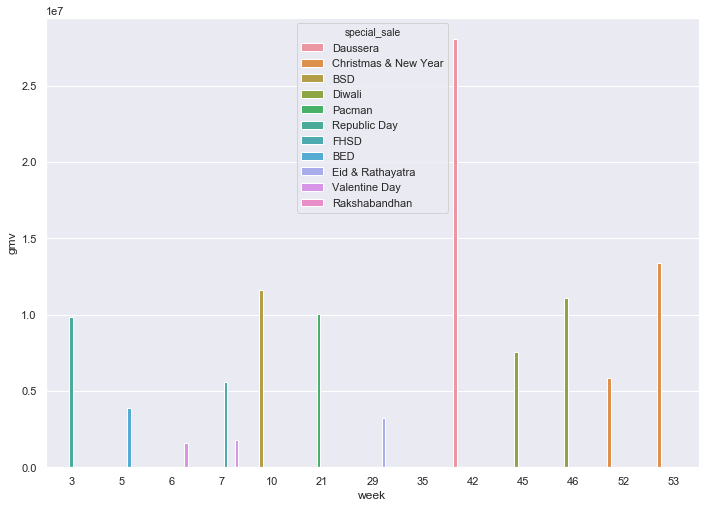

In [179]:
sns.barplot(x='week', y='gmv',hue='special_sale',data= master_special_sale_gmv)

In [180]:
### Aggregated Monthly orders by different payment types
monthly_units_sold_by_payment_type=eleckart_master.groupby(['s1_fact_order_payment_type','month_date'], as_index=False).agg({"units": "sum"})
monthly_units_sold_by_payment_type.head()

,s1_fact_order_payment_type,month_date,units
0,COD,2015-07-04-7,1
1,COD,2015-07-06-7,2
2,COD,2015-07-07-7,1306
3,COD,2015-07-08-7,1168
4,COD,2015-07-09-7,840


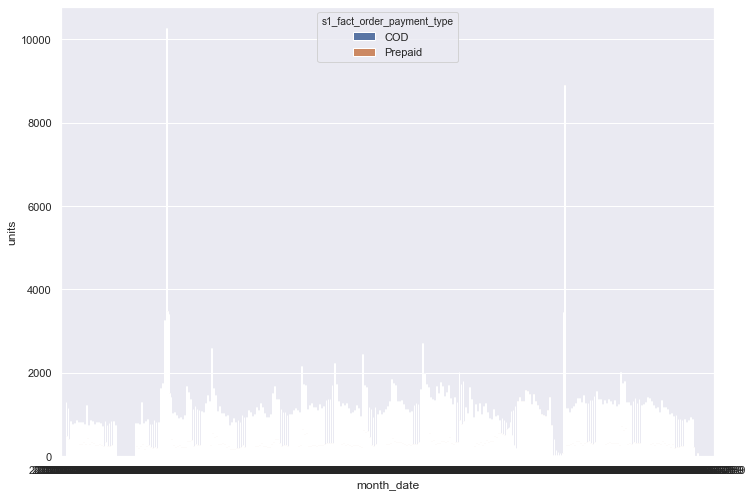

In [181]:
sns.barplot(x='month_date', y='units',hue='s1_fact_order_payment_type',data= monthly_units_sold_by_payment_type)

In [182]:
### Aggregated Weekly orders by different payment types

weekly_units_sold_by_payment_type=eleckart_master.groupby(['s1_fact_order_payment_type','week'], as_index=False).agg({"units": "sum"})
weekly_units_sold_by_payment_type.head()

,s1_fact_order_payment_type,week,units
0,COD,1,10872
1,COD,2,8095
2,COD,3,10256
3,COD,4,7465
4,COD,5,10493


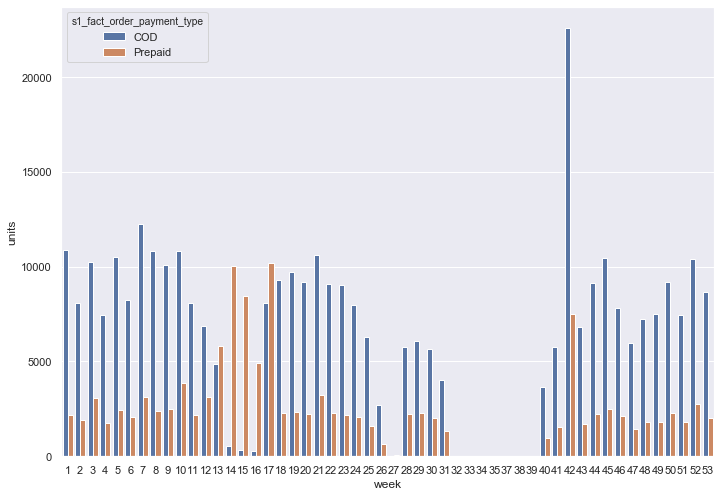

In [183]:
sns.barplot(x='week', y='units',hue='s1_fact_order_payment_type',data= weekly_units_sold_by_payment_type)

In [184]:
#distribution of investment type by week
weekly_total_investment=eleckart_master.groupby(['week','Total Investment'], as_index=False).agg({'TV':"sum",'Digital':"sum",'Sponsorship':"sum",'Content Marketing':"sum",'Online marketing':"sum",' Affiliates':"sum",'SEM':"sum",'Radio':"sum",'Other':"sum"})
weekly_total_investment.head()

,week,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,1,"167,539,354.84","126,526,896,774.17","13,172,663,225.81","121,327,161,290.33","25,998,677,419.36","661,521,903,225.78","212,900,280,645.10","121,327,161,290.33","77,996,032,258.07","782,560,190,322.66"
1,2,"167,539,354.84","96,885,599,999.99","10,086,720,000.00","92,904,000,000.01","19,908,000,000.00","506,548,000,000.05","163,024,399,999.98","92,904,000,000.01","59,724,000,000.01","599,230,800,000.05"
2,3,"167,539,354.84","127,960,993,548.37","13,321,966,451.61","122,702,322,580.66","26,293,354,838.72","669,019,806,451.58","215,313,361,290.26","122,702,322,580.66","78,880,064,516.13","791,429,980,645.24"
3,4,"167,539,354.84","89,635,993,548.38","9,331,966,451.61","85,952,322,580.65","18,418,354,838.71","468,644,806,451.65","150,825,861,290.31","85,952,322,580.65","55,255,064,516.14","554,392,480,645.21"
4,5,"115,987,586.21","78,906,226,213.53","58,360,258,849.47","357,779,038,781.20","18,209,129,126.20","606,970,970,873.20","197,265,565,533.82","148,707,887,863.91",0.00,0.00


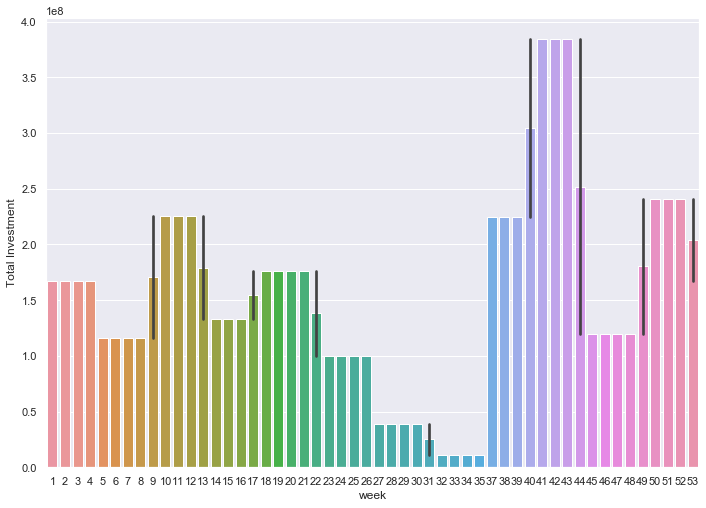

In [185]:
sns.barplot(x='week', y='Total Investment',data= weekly_total_investment)

In [186]:
## Create week wise sale and ad spend details for various sub category level 
 
weekly_ad_spent=eleckart_master.groupby(['week','product_analytic_sub_category'], as_index=False).agg({"gmv": "sum",'TV':"sum",'Digital':"sum",'Sponsorship':"sum",'Content Marketing':"sum",'Online marketing':"sum",' Affiliates':"sum",'SEM':"sum",'Radio':"sum",'Other':"sum"})
#weekly_ad_spent=eleckart_master.groupby(['week_date'], as_index=False).agg({"gmv": "sum",'TV':"sum",'Digital':"sum",'Sponsorship':"sum",'Content Marketing':"sum",'Online marketing':"sum",' Affiliates':"sum",'SEM':"sum",'Radio':"sum",'Other':"sum"})
weekly_ad_spent.head()

,week,product_analytic_sub_category,gmv,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,1,CameraAccessory,"4,960,054.00","51,132,967,741.93","5,323,432,258.06","49,031,612,903.23","10,506,774,193.55","267,339,032,258.04","86,038,806,451.62","49,031,612,903.23","31,520,322,580.65","316,253,903,225.82"
1,1,GamingAccessory,"3,375,045.00","43,022,903,225.81","4,479,096,774.19","41,254,838,709.68","8,840,322,580.64","224,937,096,774.18","72,392,419,354.84","41,254,838,709.68","26,520,967,741.94","266,093,709,677.43"
2,1,HomeAudio,"6,999,138.00","32,371,025,806.45","3,370,134,193.55","31,040,709,677.42","6,651,580,645.16","169,245,774,193.55","54,469,054,838.71","31,040,709,677.42","19,954,741,935.48","200,212,577,419.35"
3,2,CameraAccessory,"4,273,683.00","36,851,341,935.49","3,836,578,064.52","35,336,903,225.81","7,572,193,548.39","192,670,258,064.51","62,007,851,612.90","35,336,903,225.81","22,716,580,645.16","227,923,025,806.46"
4,2,GamingAccessory,"2,998,131.00","38,245,877,419.36","3,981,762,580.65","36,674,129,032.26","7,858,741,935.48","199,961,322,580.63","64,354,364,516.13","36,674,129,032.26","23,576,225,806.45","236,548,132,258.07"


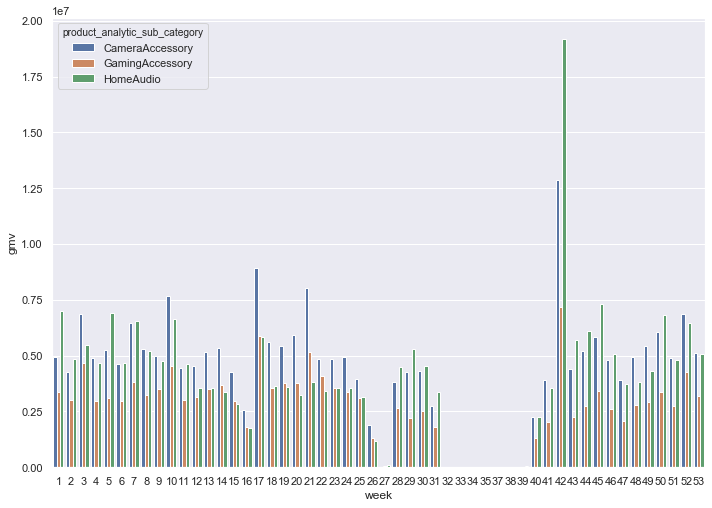

In [187]:
#weekly total sales
sns.barplot(x='week', y='gmv',hue='product_analytic_sub_category',data= weekly_ad_spent)

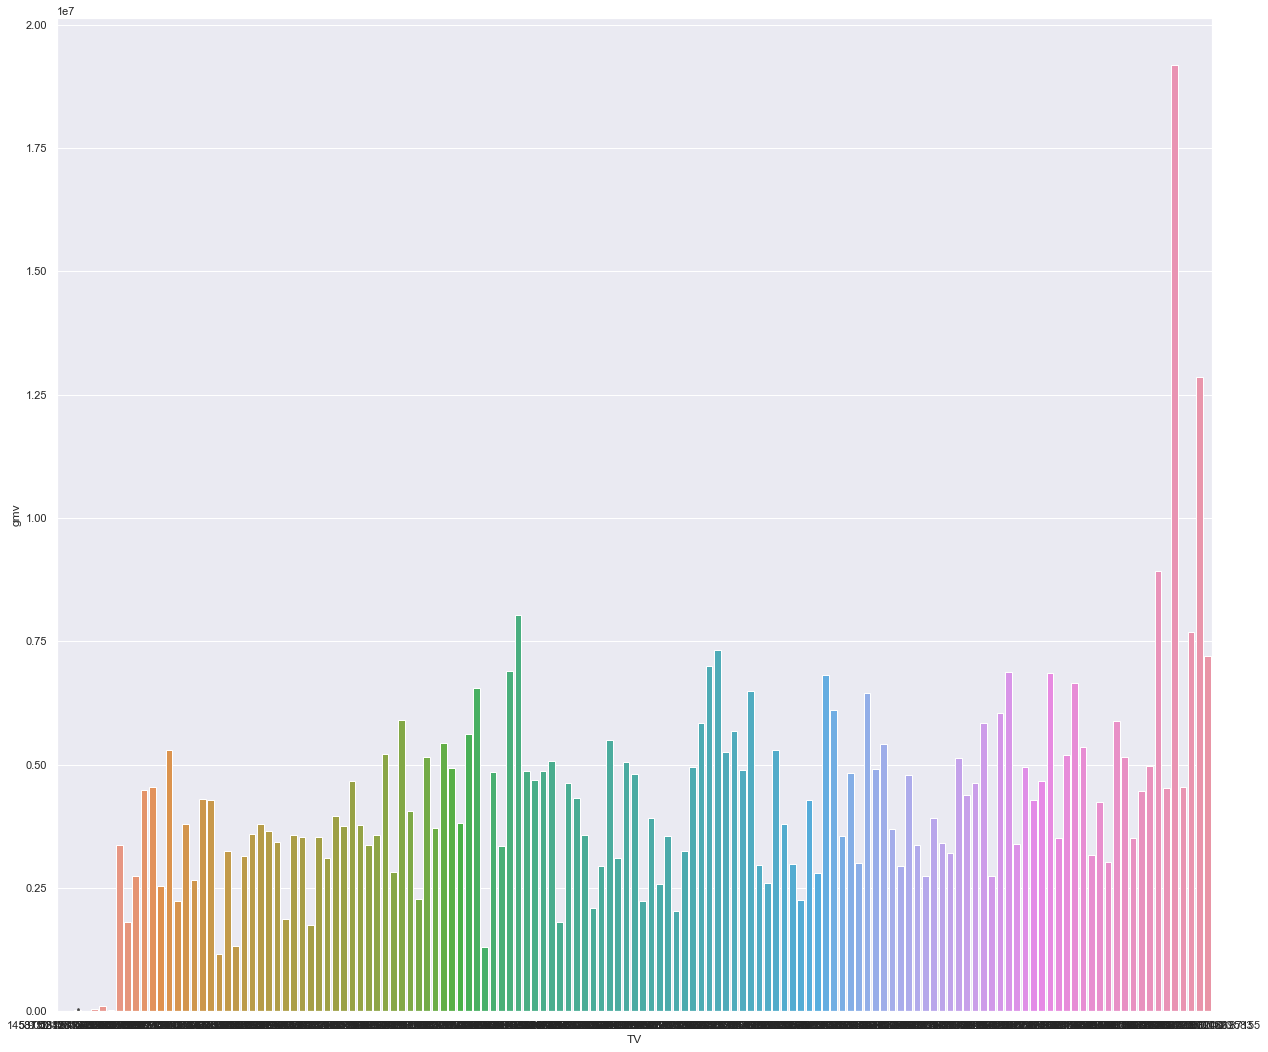

In [188]:
## Total TV ad spend vs sales details
sns.set(rc={'figure.figsize':(20.7,18.27)})

sns.barplot(x='TV', y='gmv',data= weekly_ad_spent)

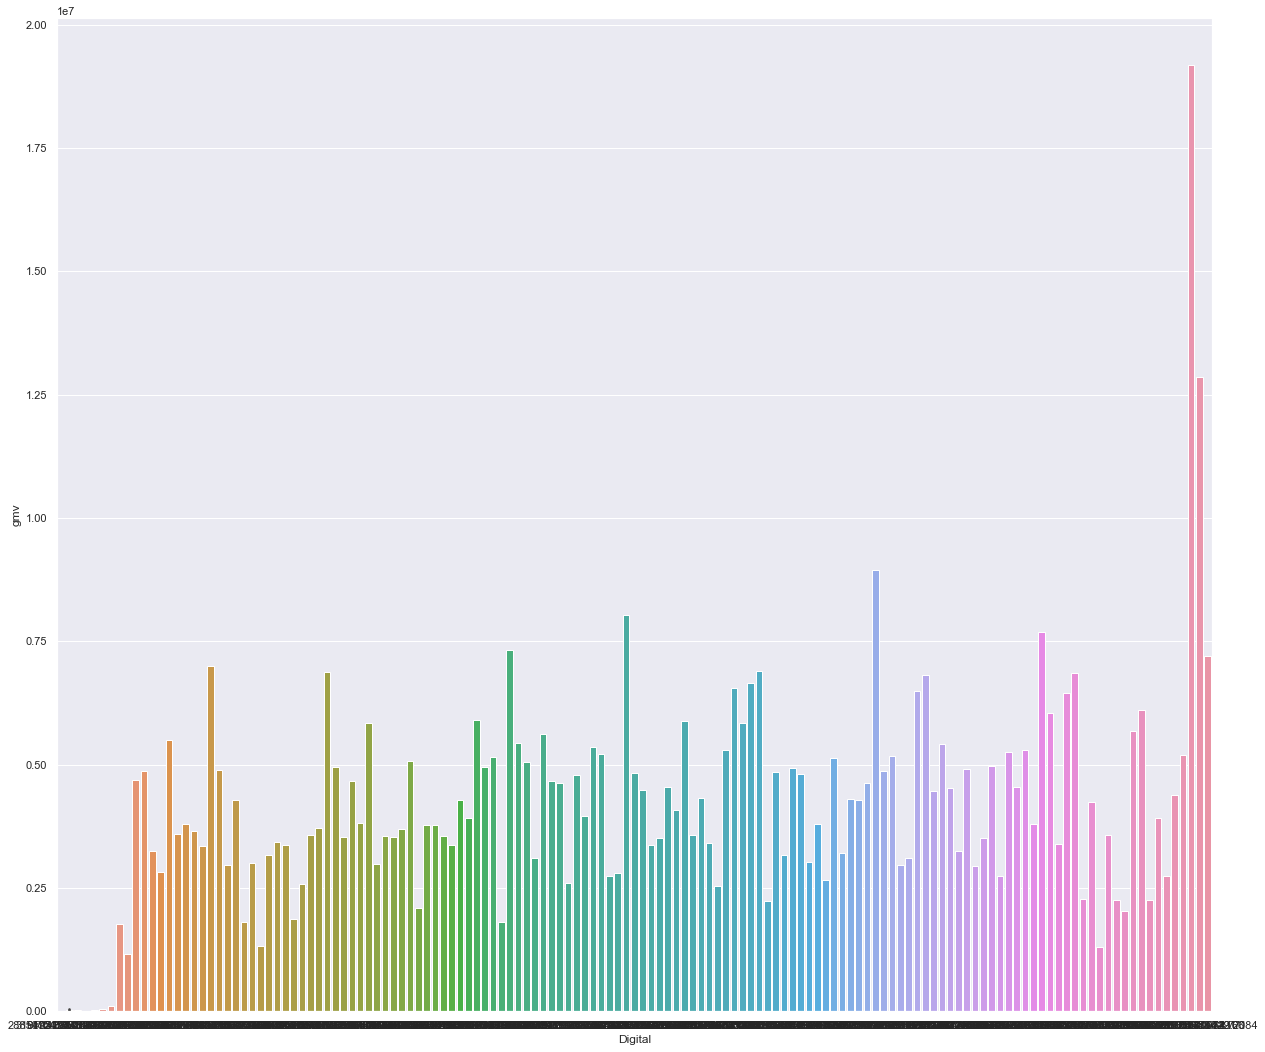

In [189]:
## Total Digital ad spend vs sales details
sns.set(rc={'figure.figsize':(20.7,18.27)})
sns.barplot(x='Digital', y='gmv',data= weekly_ad_spent)

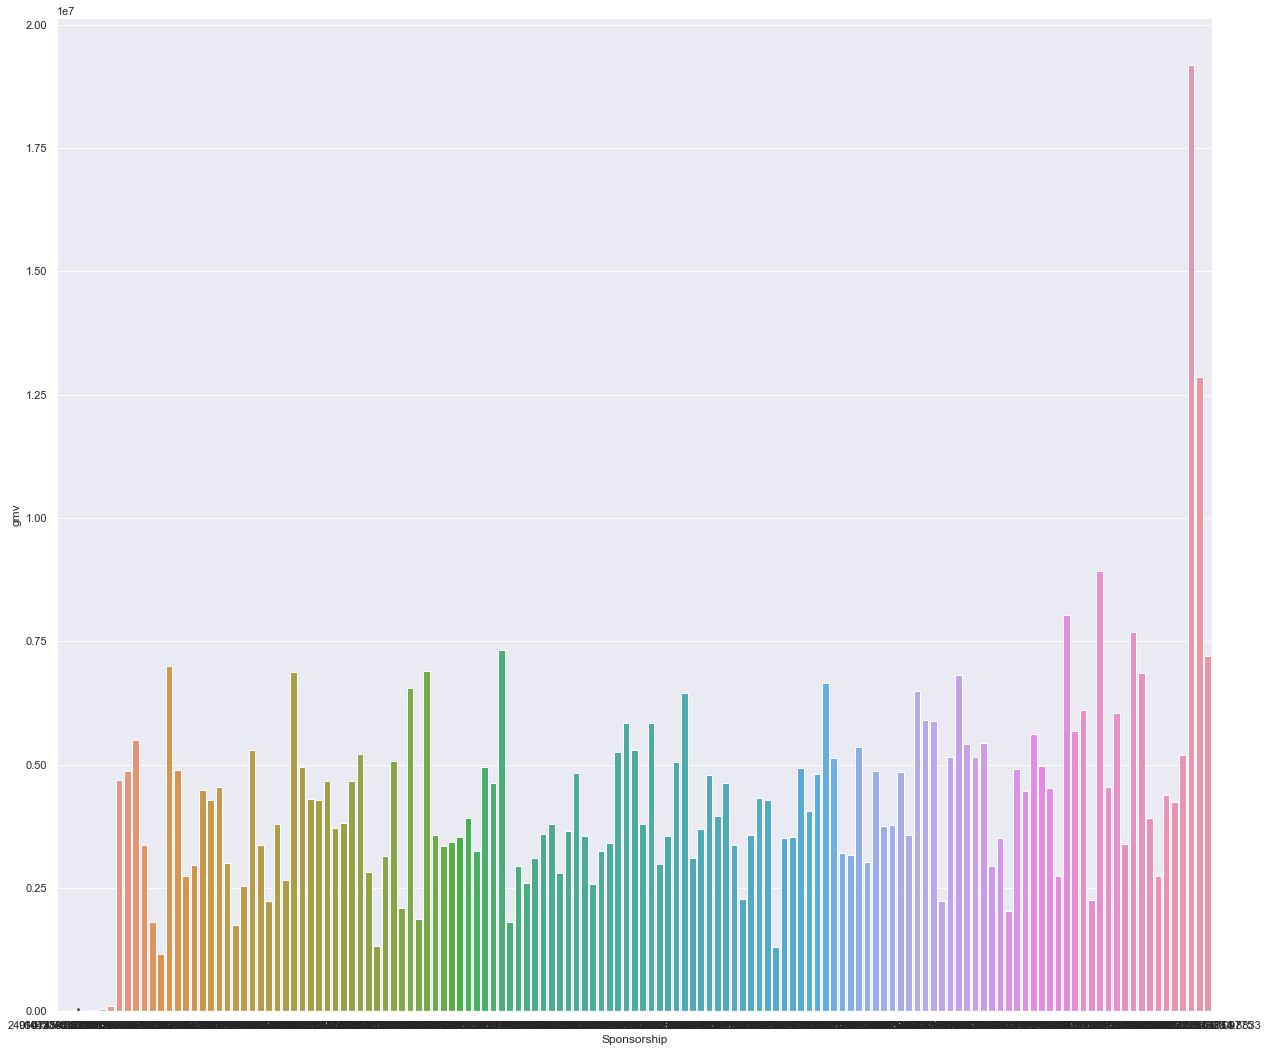

In [190]:
## Total sponsership ad spend vs sales details
sns.barplot(x='Sponsorship', y='gmv',data= weekly_ad_spent)

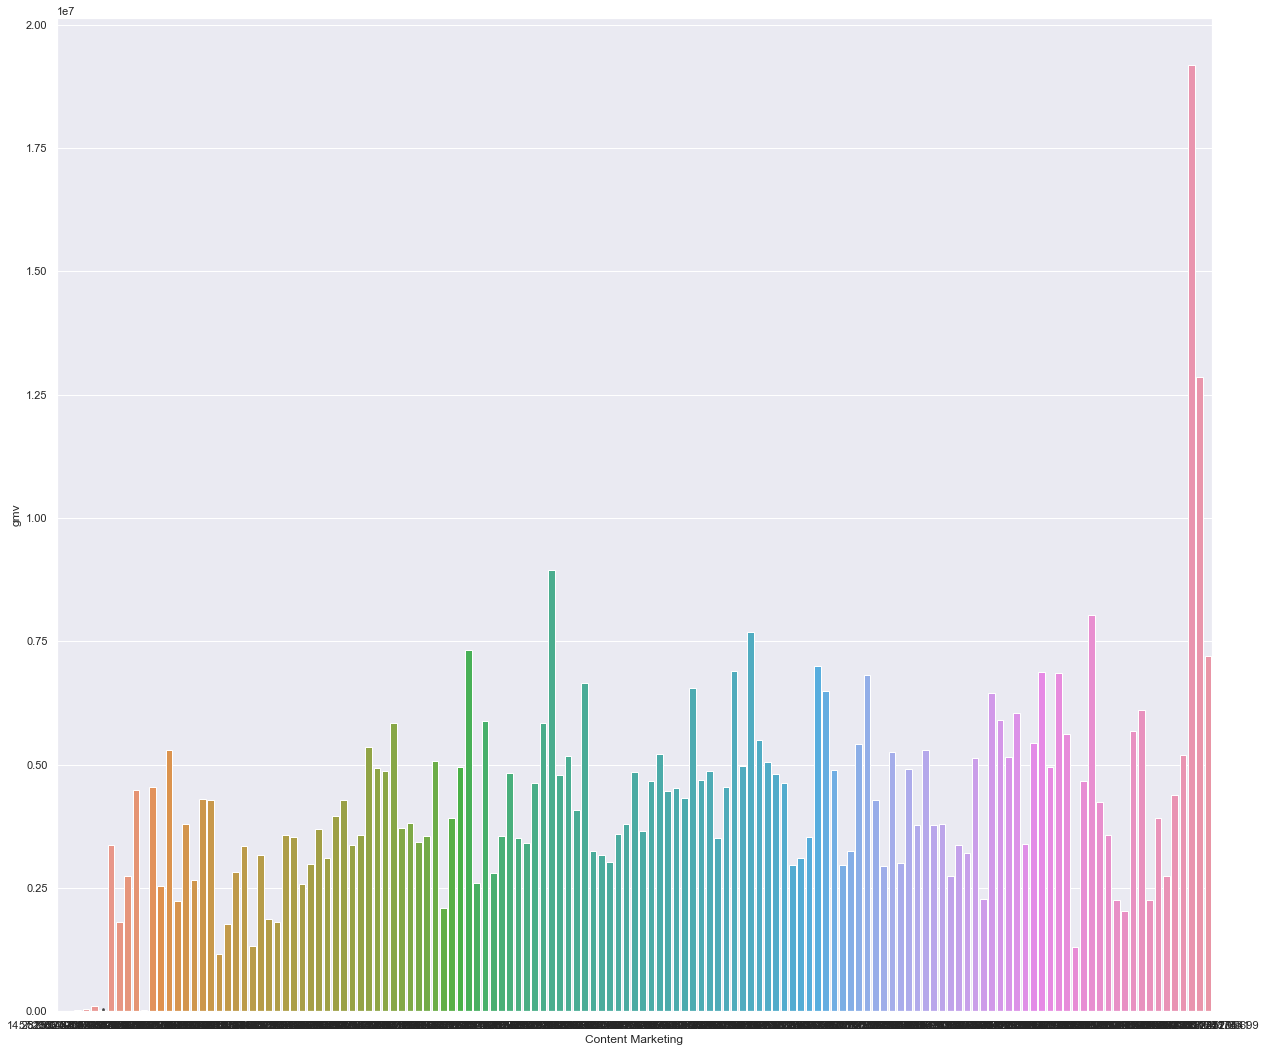

In [191]:
# Total Content Marketing ad spend vs sales details
sns.barplot(x='Content Marketing', y='gmv',data= weekly_ad_spent)

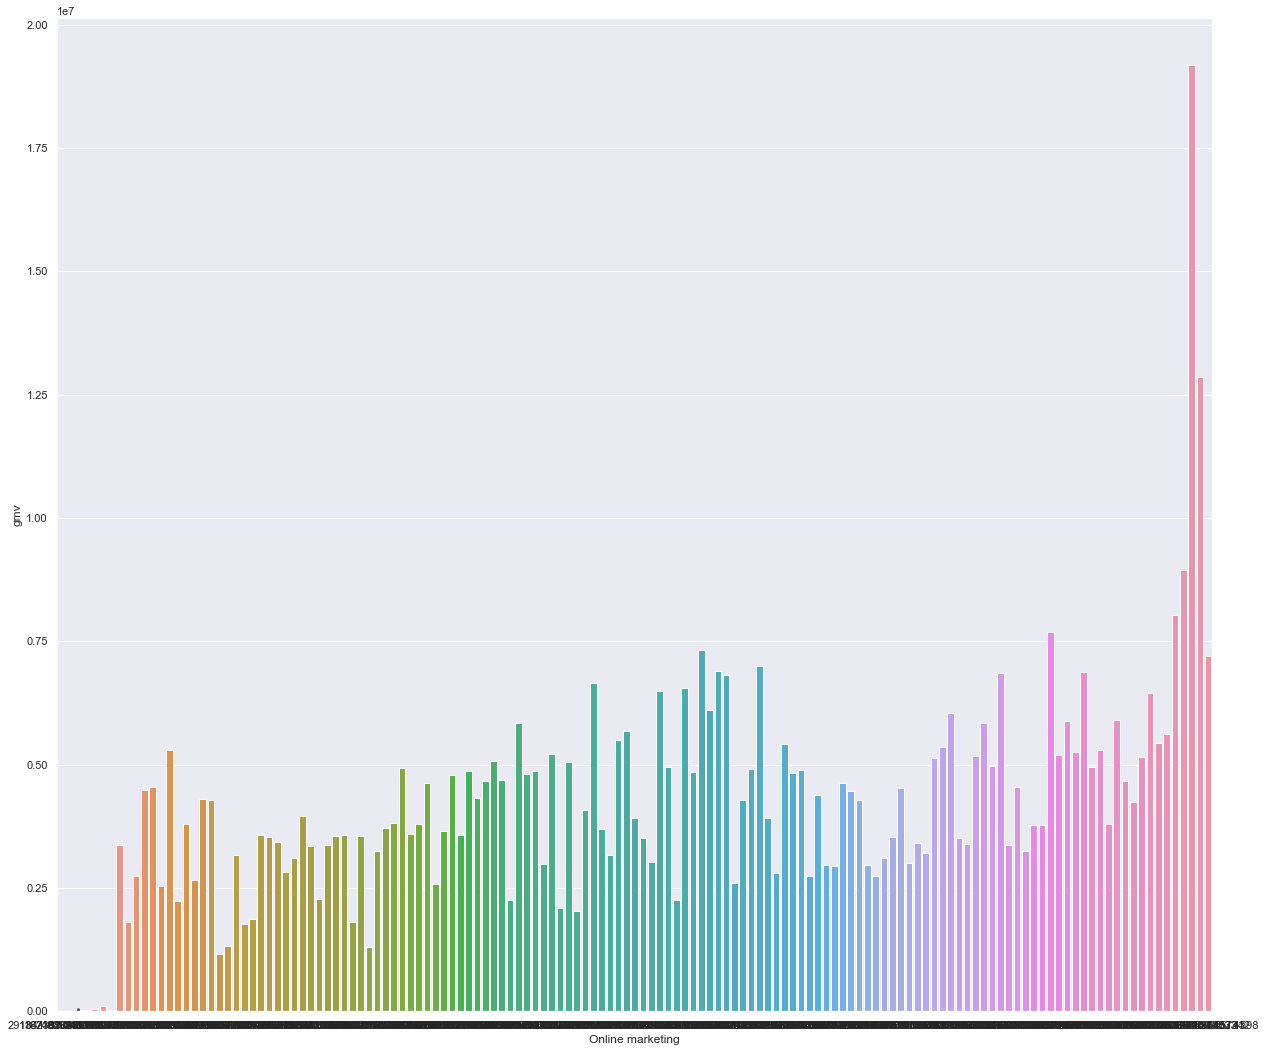

In [192]:
# Total Online marketing ad spend vs sales details
sns.barplot(x='Online marketing', y='gmv',data= weekly_ad_spent)

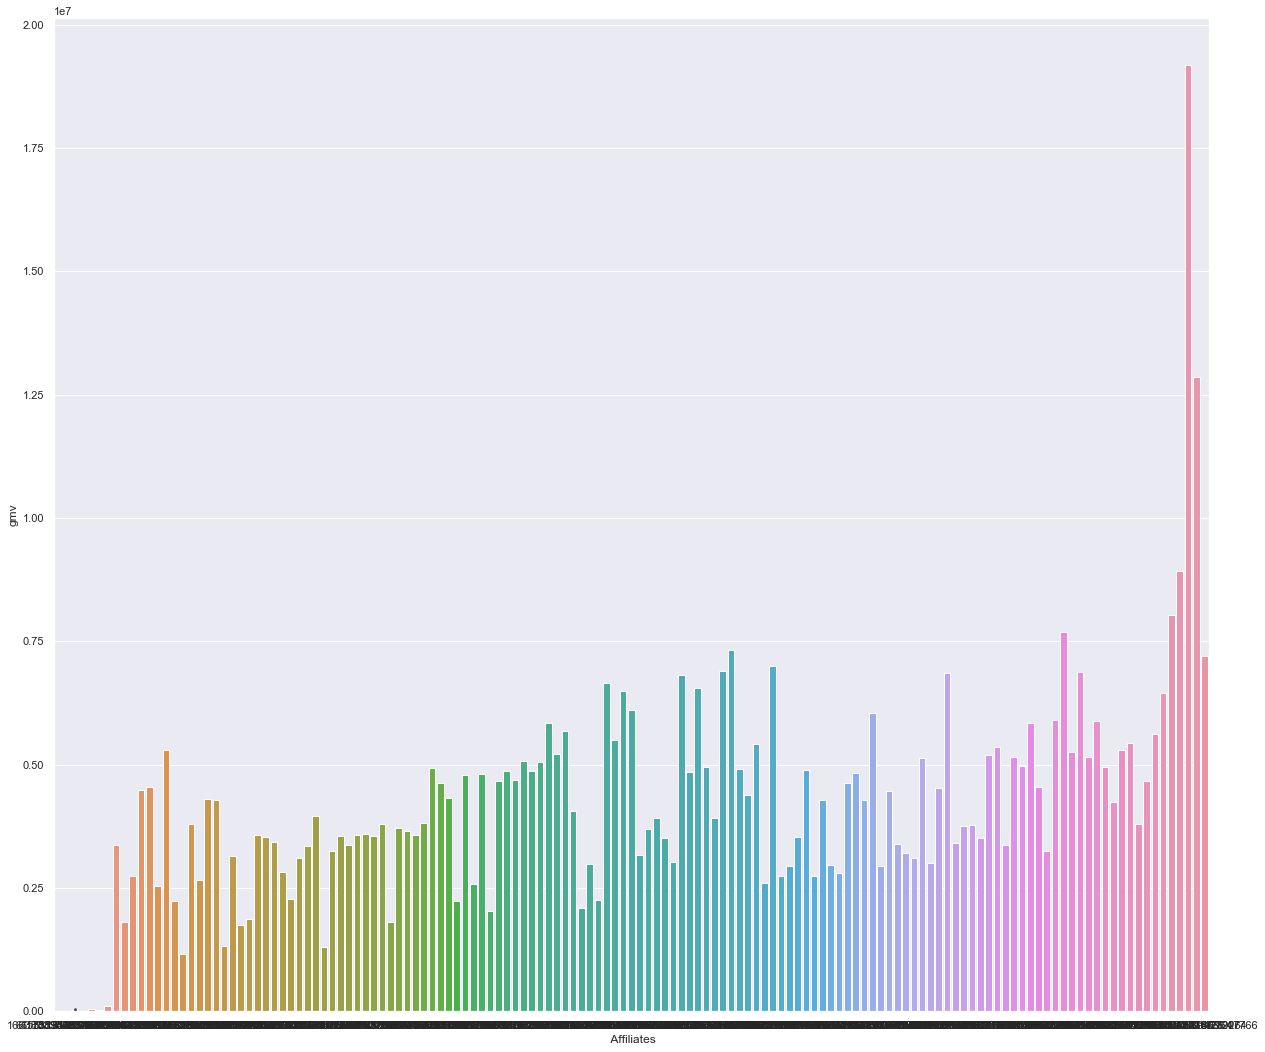

In [193]:
## Total  Affiliatesd spend vs sales details
sns.barplot(x=' Affiliates', y='gmv',data= weekly_ad_spent)

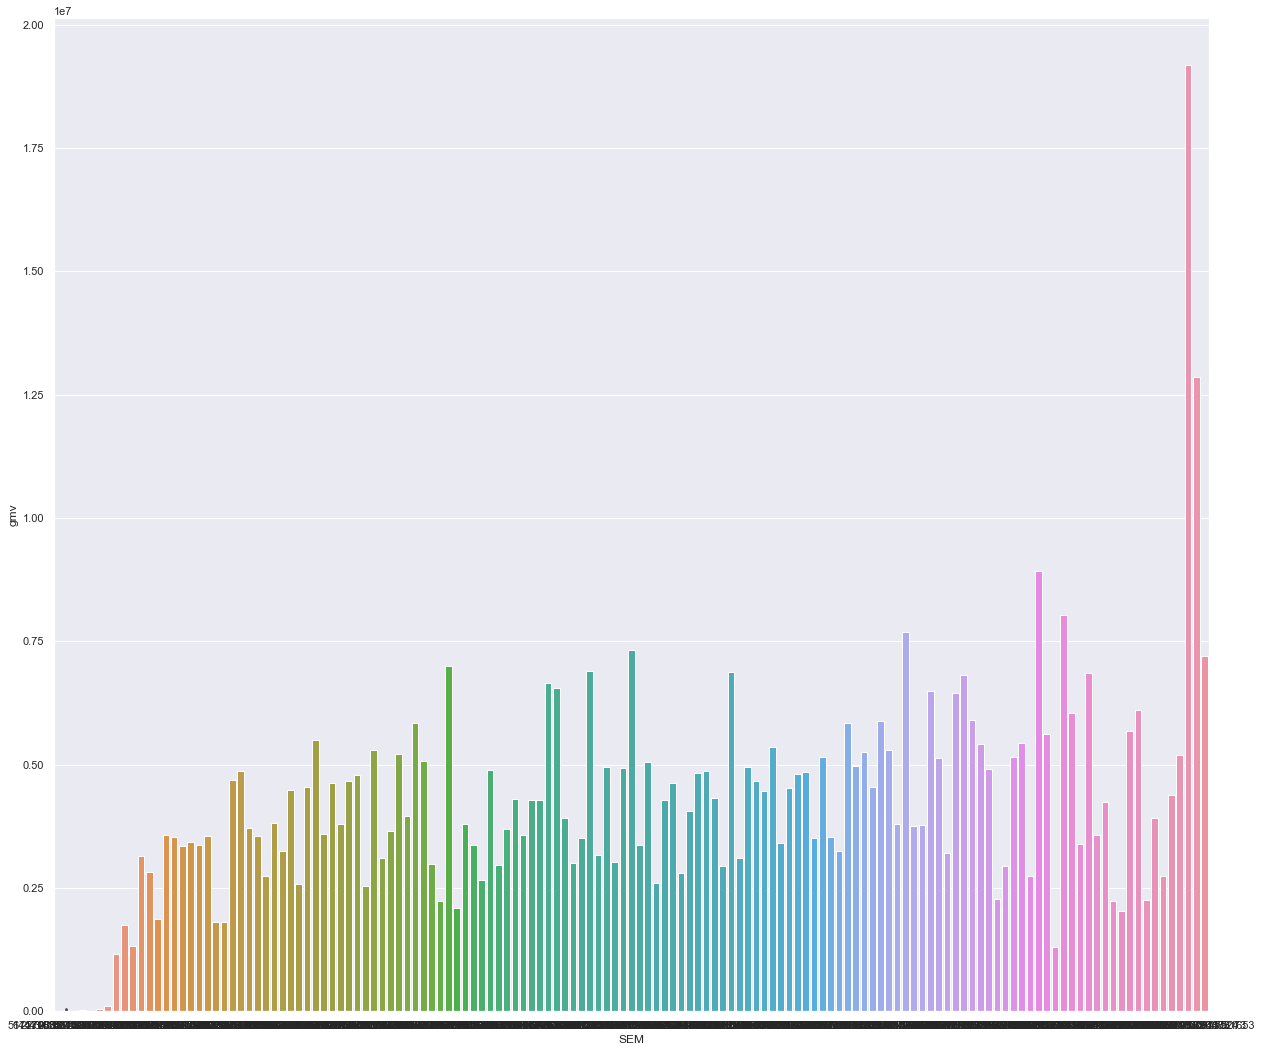

In [194]:
## Total  SEM spend vs sales details
sns.barplot(x='SEM', y='gmv',data= weekly_ad_spent)

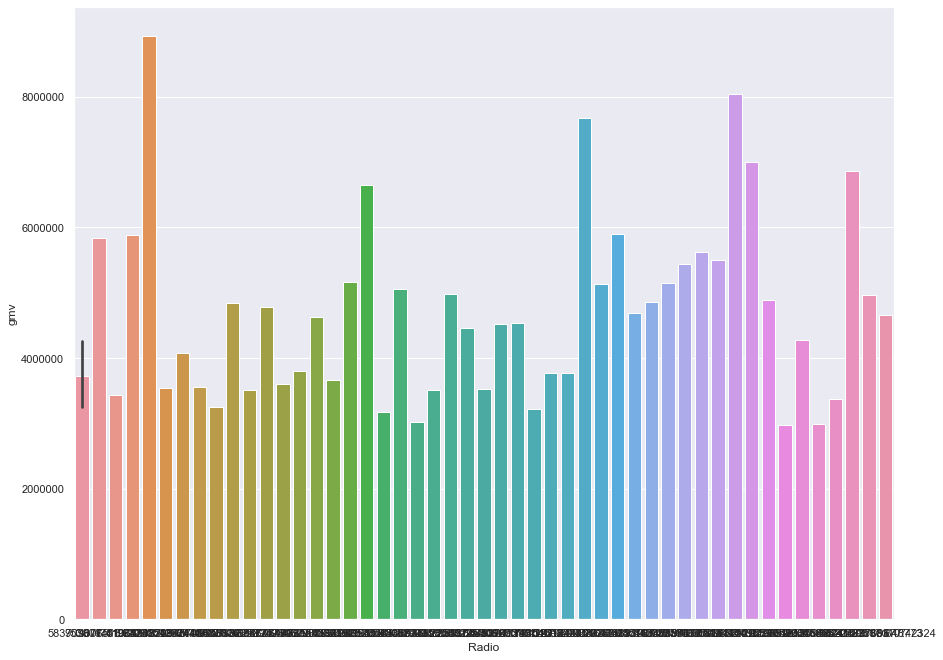

In [195]:
## Total  Radio spend vs sales details
sns.set(rc={'figure.figsize':(14.7,11.27)})
sns.barplot(x='Radio', y='gmv',data= weekly_ad_spent)

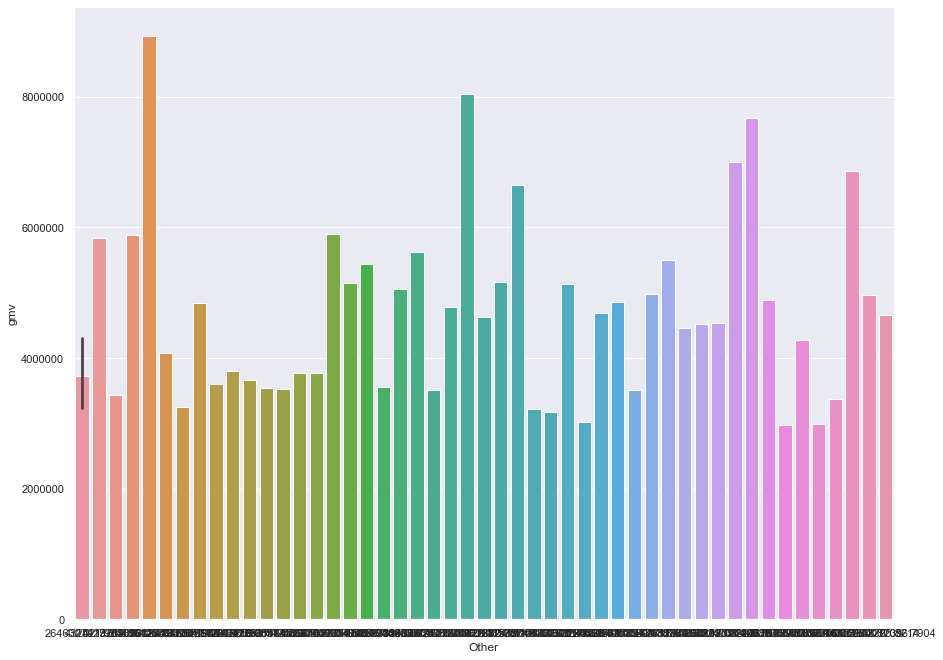

In [196]:
## Total  Other spend vs sales details
sns.barplot(x='Other', y='gmv',data= weekly_ad_spent)

In [197]:
## delivery_status  vs number of orders--KPI
order_status=eleckart_master.groupby(['delivery_status','week'], as_index=False).agg({"units": "count"})
order_status.head()

,delivery_status,week,units
0,Delayed,1,1993
1,Delayed,2,1064
2,Delayed,3,1468
3,Delayed,4,853
4,Delayed,5,1436


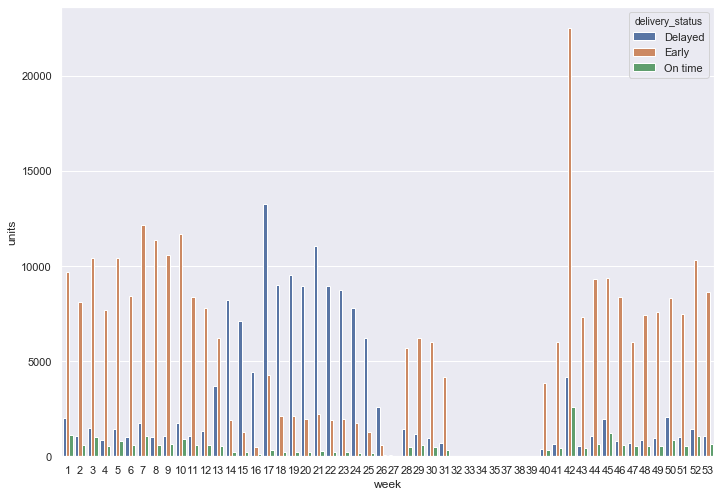

In [198]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = "week",y='units', hue = "delivery_status", data = order_status)

In [199]:
order_status_mon=eleckart_master.groupby(['delivery_status','Month'], as_index=False).agg({"units": "count"})
order_status_mon.head()

,delivery_status,Month,units
0,Delayed,1,5826
1,Delayed,2,5375
2,Delayed,3,6346
3,Delayed,4,34231
4,Delayed,5,42344


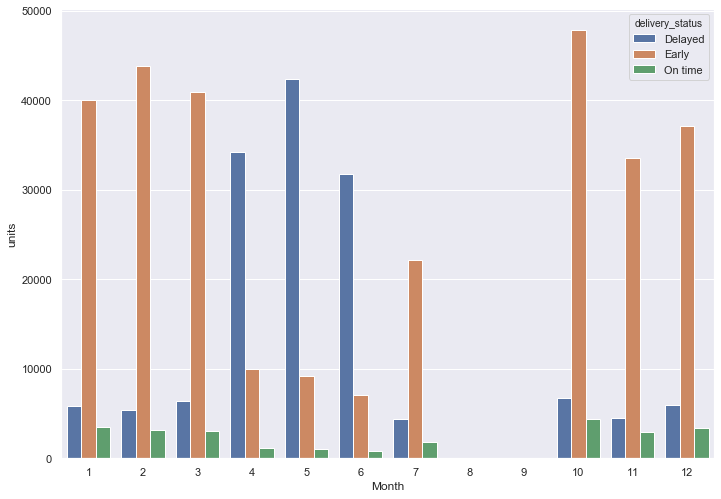

In [200]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = "Month",y='units', hue = "delivery_status", data = order_status_mon)

In [201]:
## payment type vs number of orders
payment_type=eleckart_master.groupby(['s1_fact_order_payment_type'], as_index=False).agg({"units": "count"})
payment_type

,s1_fact_order_payment_type,units
0,COD,339066
1,Prepaid,125383


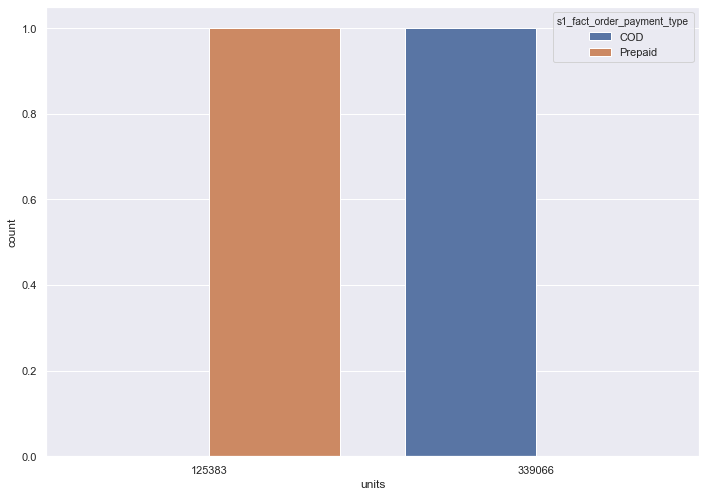

In [202]:
sns.countplot(x = "units", hue = "s1_fact_order_payment_type", data = payment_type)

In [203]:
eleckart_master['NPSScore']=eleckart_master['NPSScore'].astype(float)
NPS_Score=eleckart_master.groupby(['week'], as_index=False).agg({"NPSScore": "mean"})
NPS_Score.head()

,week,NPSScore
0,1,nan
1,2,nan
2,3,nan
3,4,nan
4,5,nan


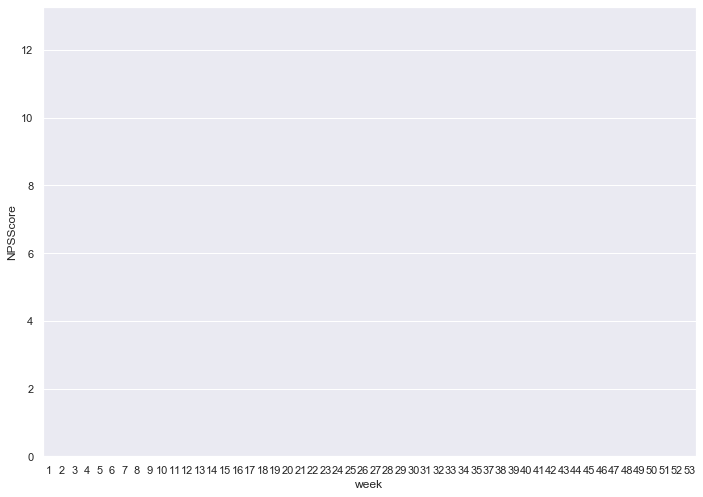

In [204]:
# Consumer sentiment score
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = "week", y = "NPSScore", data = NPS_Score)

In [206]:
## Itemtype vs discount--KPI
Itemtype_dis=eleckart_master.groupby(['ItemType'], as_index=False).agg({"Discount_Percentage": "mean"})
Itemtype_dis

,ItemType,Discount_Percentage
0,Luxury,32.92
1,MassMarket,48.73


##### Mass market goods are sold at a higher discounts

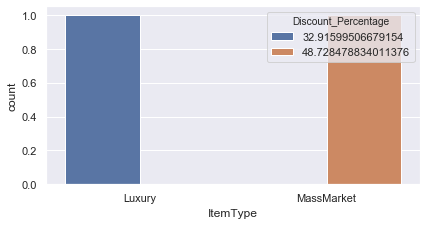

In [207]:
# Distribution of discount percentage offered on different types of goods--KPI
sns.set(rc={'figure.figsize':(6.7,3.27)})
sns.countplot(x = "ItemType", hue = "Discount_Percentage", data = Itemtype_dis)

##### Mass market goods are sold at a higher discounts

In [208]:
# The median gmv value for Itemtype
Itemtype_gmv=eleckart_master.groupby(['ItemType'], as_index=False).agg({"gmv": "median"})
Itemtype_gmv

,ItemType,gmv
0,Luxury,"3,350.00"
1,MassMarket,448.00


In [209]:
# Distribution of discounts offered on different events

event_dis=eleckart_master.loc[(eleckart_master['special_sale']!='Regular Day')]
event_dis.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,SEM,Radio,Other,Affiliates,week_y,NPS,NPSScore,holiday_count,ItemType,month_date
0,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,COD,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,Luxury,2015-10-17-10
4,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,MassMarket,2015-10-17-10
5,2015-10-17,2015,10,"3,419,188,825,145,600.00","3,419,188,825,145,600.00","3,324.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,Luxury,2015-10-17-10
6,2015-10-16,2015,10,"3,418,428,515,041,500.00","3,418,428,515,041,500.00","3,695.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,Luxury,2015-10-16-10
7,2015-10-15,2015,10,"3,417,799,002,820,700.00","3,417,799,002,820,700.00","3,695.00",1,0,0,COD,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,Luxury,2015-10-15-10


In [210]:
event_dis=event_dis.groupby(['special_sale','week'], as_index=False).agg({"Discount_Percentage": "mean"})
event_dis

,special_sale,week,Discount_Percentage
0,BED,5,45.52
1,BSD,10,47.08
2,Christmas & New Year,52,47.67
3,Christmas & New Year,53,44.77
4,Daussera,42,52.87
5,Diwali,45,49.24
6,Diwali,46,43.02
7,Eid & Rathayatra,29,40.01
8,FHSD,7,49.46
9,Pacman,21,49.66


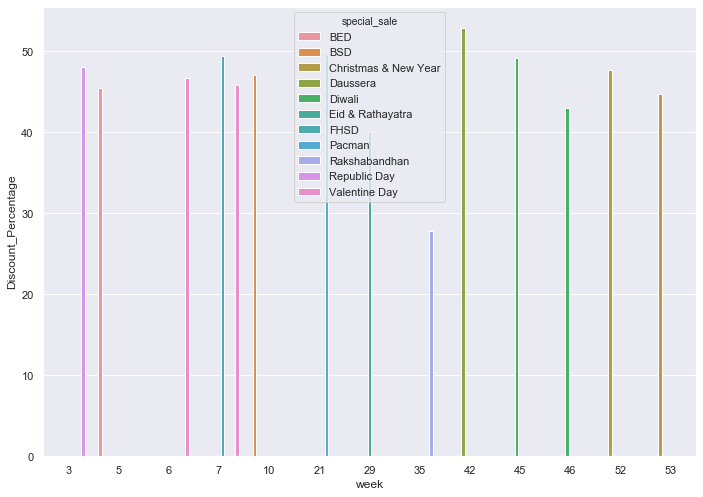

In [211]:
# Distribution of discounts offered on different events

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = "week", y = "Discount_Percentage",hue='special_sale', data = event_dis)

##### discount percentage higher on Daussera,week no 42

In [213]:
# Comparision of  mean gmv for normal days vs days on which there are holiday promotions
gmv_holiday_promotiongmv=eleckart_master.groupby(['special_sale'], as_index=False).agg({"gmv": "mean"}).sort_values(['gmv'], ascending=[False])
gmv_holiday_promotiongmv.head()

,special_sale,gmv
5,Eid & Rathayatra,"1,482.27"
1,BSD,"1,479.82"
4,Diwali,"1,363.54"
7,Pacman,"1,356.87"
10,Republic Day,"1,321.79"


##### The average gmv value is higher on the day when holiday promotions are there.

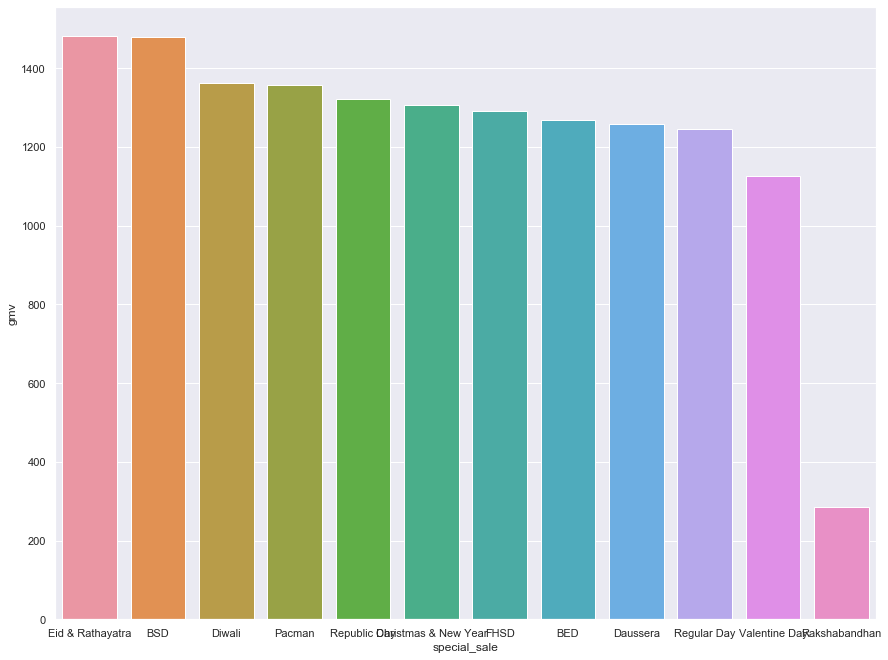

In [214]:
sns.set(rc={'figure.figsize':(14.7,11.27)})
sns.barplot(x ="special_sale", y ="gmv", data =gmv_holiday_promotiongmv)

In [215]:
## Further filtering the data for the product sub-categories- camera accessory, home audio and gaming accessory. 
eleckart_CameraAccessory=eleckart_master.loc[(eleckart_master['product_analytic_sub_category'] =='CameraAccessory')]
eleckart_CameraAccessory.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,SEM,Radio,Other,Affiliates,week_y,NPS,NPSScore,holiday_count,ItemType,month_date
0,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,COD,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,Luxury,2015-10-17-10
1,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,0,0,COD,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,0.00,Luxury,2015-10-19-10
2,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,0,0,COD,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,0.00,MassMarket,2015-10-20-10
3,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,MassMarket,2015-10-14-10
4,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,MassMarket,2015-10-17-10


In [216]:
eleckart_GamingAccessory=eleckart_master.loc[(eleckart_master['product_analytic_sub_category'] =='GamingAccessory')]
eleckart_GamingAccessory.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,SEM,Radio,Other,Affiliates,week_y,NPS,NPSScore,holiday_count,ItemType,month_date
1555,2015-10-04,2015,10,"1,408,216,975,064,600.00","1,408,216,975,064,600.00","3,075.00",1,0,0,COD,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,0.00,Luxury,2015-10-04-10
1556,2015-10-14,2015,10,"1,416,985,339,691,600.00","1,416,985,339,691,600.00","2,750.00",1,0,0,COD,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,Luxury,2015-10-14-10
1557,2015-10-15,2015,10,"1,417,669,228,375,400.00","1,417,669,228,375,400.00","2,899.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,Luxury,2015-10-15-10
1558,2015-10-17,2015,10,"1,419,414,998,353,400.00","1,419,414,998,353,400.00","2,609.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,Luxury,2015-10-17-10
1559,2015-10-26,2015,10,"1,427,167,582,532,600.00","1,427,167,582,532,600.00","2,772.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,0.00,Luxury,2015-10-26-10


In [217]:
eleckart_HomeAudio=eleckart_master.loc[(eleckart_master['product_analytic_sub_category'] =='HomeAudio')]
eleckart_HomeAudio.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,SEM,Radio,Other,Affiliates,week_y,NPS,NPSScore,holiday_count,ItemType,month_date
2460,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,0.00,Luxury,2015-10-03-10
2461,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,Luxury,2015-10-16-10
2462,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,Luxury,2015-10-16-10
2463,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,Luxury,2015-10-16-10
2464,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,COD,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,0.00,Luxury,2015-10-20-10


## Exploratory Data Analysis based on sub-categories

### Camera Accessory

In [218]:
## Weekly Gross Merchandise Value
CA_weekly_gmv=eleckart_CameraAccessory.groupby(['week'], as_index=False).agg({"gmv": "sum"}).sort_values(['gmv'], ascending=[False])
CA_weekly_gmv.head()

,week,gmv
35,42,"12,862,543.98"
16,17,"8,934,564.00"
20,21,"8,041,519.00"
9,10,"7,680,343.00"
2,3,"6,870,874.00"


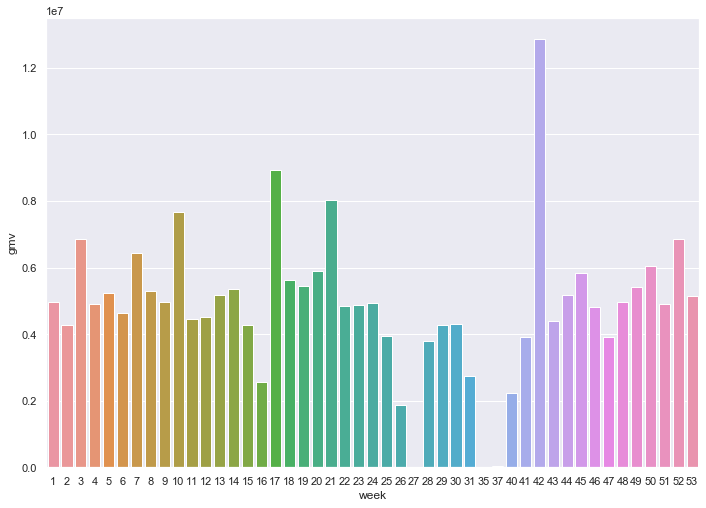

In [219]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x ="week", y ="gmv", data =CA_weekly_gmv)

In [220]:
# Weekly units sold
CA_weekly_units=eleckart_CameraAccessory.groupby(['week'], as_index=False).agg({"units": "sum"}).sort_values(['units'], ascending=[False])
CA_weekly_units.head()

,week,units
35,42,10785
16,17,8907
20,21,6613
6,7,6434
17,18,6044


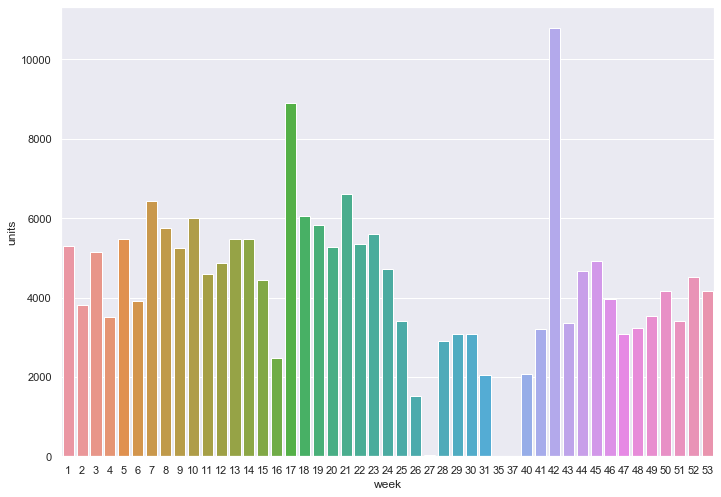

In [221]:
sns.barplot(x ="week", y ="units", data =CA_weekly_units)

In [222]:
## Aggregated Weekly orders by different payment types
CA_weekly_units_sold_by_payment_type=eleckart_CameraAccessory.groupby(['week','s1_fact_order_payment_type'], as_index=False).agg({"units": "sum"}).sort_values(['units'], ascending=[False])
CA_weekly_units_sold_by_payment_type.head()

,week,s1_fact_order_payment_type,units
67,42,COD,7661
27,14,Prepaid,5240
12,7,COD,5012
40,21,COD,4963
33,17,Prepaid,4904


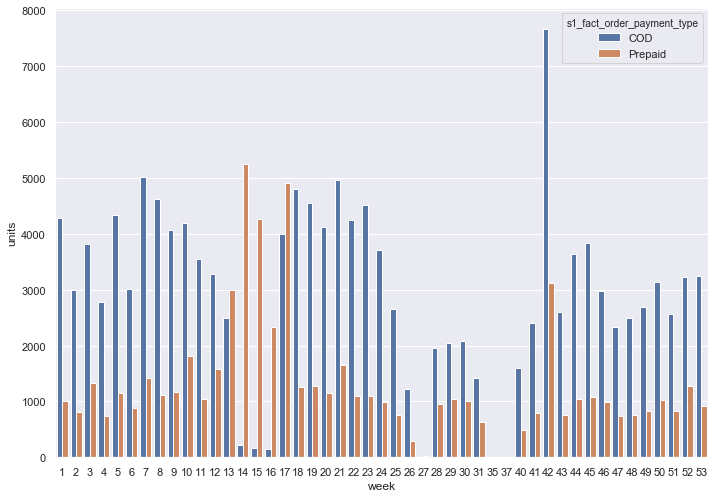

In [223]:
sns.barplot(x ="week", y ="units", hue='s1_fact_order_payment_type',data =CA_weekly_units_sold_by_payment_type)

In [224]:
# Aggregated units sold for top 10 Camera Accessory Products
CA_product_vertical_units_sold_top10=eleckart_CameraAccessory.groupby(['product_analytic_vertical'], as_index=False).agg({"units": "sum"}).sort_values(['units'], ascending=[False])
CA_product_vertical_units_sold_top10.head(10)

,product_analytic_vertical,units
15,Flash,47374
3,CameraBattery,33315
17,Lens,29676
12,CameraTripod,27129
2,CameraBag,14651
4,CameraBatteryCharger,13191
0,Binoculars,11998
14,Filter,10934
11,CameraRemoteControl,4762
7,CameraFilmRolls,2079


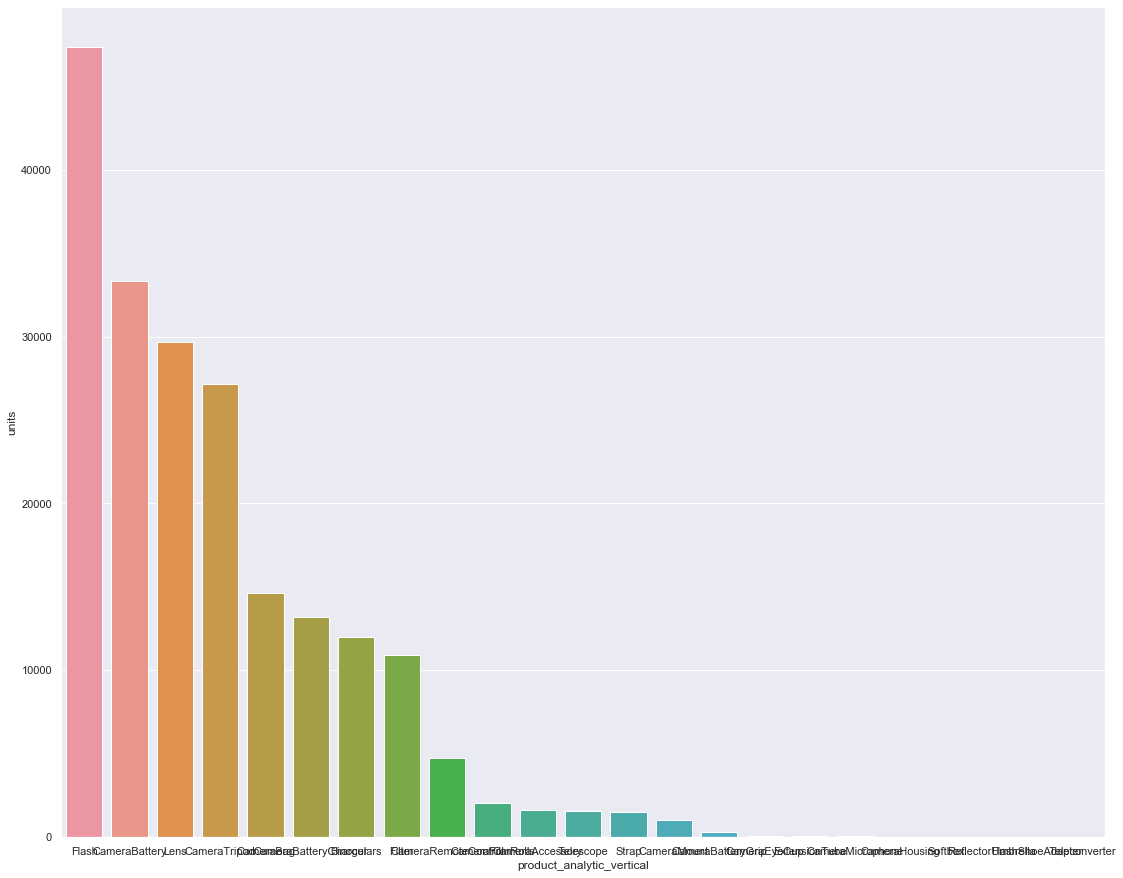

In [225]:
sns.set(rc={'figure.figsize':(18.7,15.27)})
sns.barplot(x ="product_analytic_vertical", y ="units", data =CA_product_vertical_units_sold_top10)

In [226]:
## Weekly average mrp of the products sold
CA_weekly_mrp=eleckart_CameraAccessory.groupby(['week'], as_index=False).agg({"product_mrp": "mean"}).sort_values(['product_mrp'], ascending=[False])
CA_weekly_mrp.head()

,week,product_mrp
32,37,"12,425.00"
42,49,"2,754.56"
41,48,"2,745.10"
45,52,"2,740.13"
43,50,"2,676.77"


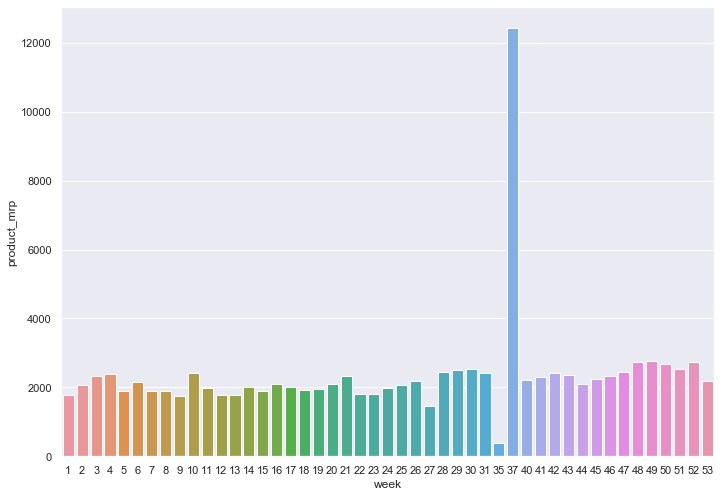

In [227]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x ="week", y ="product_mrp", data =CA_weekly_mrp)

In [228]:
# Aggregated Product units sold on weekdays/weekends
CA_wday_units_sold=eleckart_CameraAccessory.groupby(['wday'], as_index=False).agg({"units": "sum"}).sort_values(['units'], ascending=[False])
CA_wday_units_sold.head()

,wday,units
2,2,35247
4,4,31663
3,3,28736
5,5,27495
1,1,27019


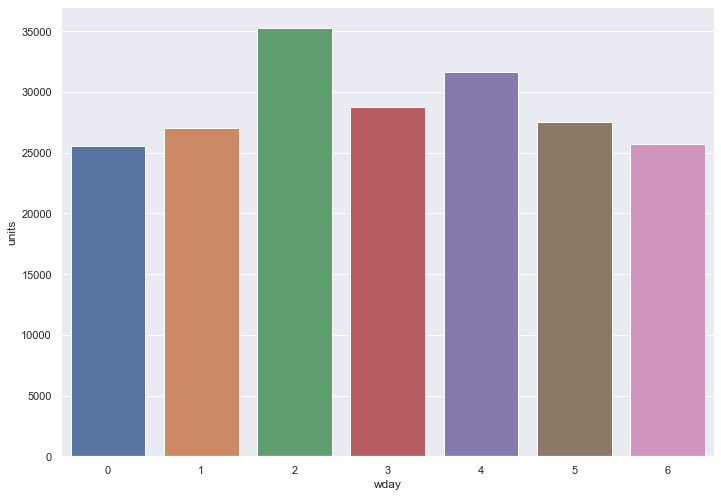

In [229]:
sns.barplot(x ="wday", y ="units", data =CA_wday_units_sold)

In [230]:
## Units sold of special sale day [i.e. on different holidays]
CA_special_sale_day_units_sold=eleckart_CameraAccessory.loc[(eleckart_CameraAccessory['special_sale']!='Regular Day')]
CA_special_sale_day_units_sold.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,SEM,Radio,Other,Affiliates,week_y,NPS,NPSScore,holiday_count,ItemType,month_date
0,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,COD,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,Luxury,2015-10-17-10
4,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,MassMarket,2015-10-17-10
5,2015-10-17,2015,10,"3,419,188,825,145,600.00","3,419,188,825,145,600.00","3,324.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,Luxury,2015-10-17-10
6,2015-10-16,2015,10,"3,418,428,515,041,500.00","3,418,428,515,041,500.00","3,695.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,Luxury,2015-10-16-10
7,2015-10-15,2015,10,"3,417,799,002,820,700.00","3,417,799,002,820,700.00","3,695.00",1,0,0,COD,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,Luxury,2015-10-15-10


In [231]:
CA_special_sale_day_units_sold=CA_special_sale_day_units_sold.groupby(['special_sale'], as_index=False).agg({"units": "sum"}).sort_values(['units'], ascending=[False])
CA_special_sale_day_units_sold

,special_sale,units
3,Daussera,8060
4,Diwali,5764
2,Christmas & New Year,5587
7,Pacman,3529
9,Republic Day,3045
1,BSD,2913
6,FHSD,1506
0,BED,1227
10,Valentine Day,1174
5,Eid & Rathayatra,878


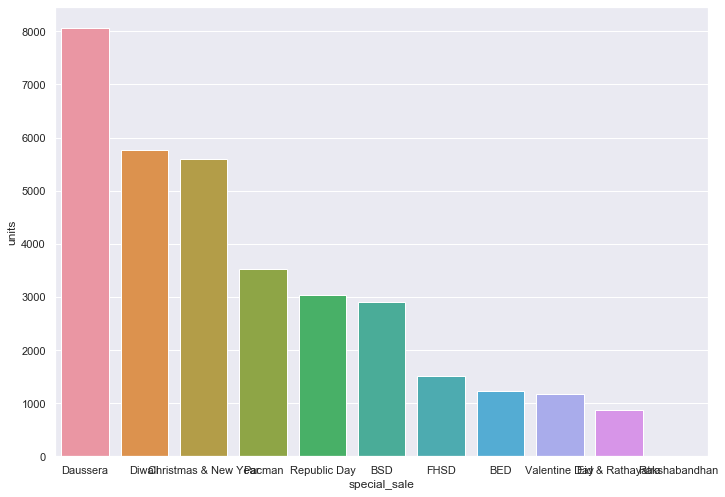

In [232]:
sns.barplot(x ="special_sale", y ="units", data =CA_special_sale_day_units_sold)

### Home Audio

In [233]:
## Weekly Gross Merchandise Value--home-audio
HA_weekly_gmv=eleckart_HomeAudio.groupby(['week'], as_index=False).agg({"gmv": "sum"}).sort_values(['gmv'], ascending=[False])
HA_weekly_gmv.head()

,week,gmv
35,42,"19,172,852.00"
38,45,"7,321,605.00"
0,1,"6,999,138.00"
4,5,"6,906,156.00"
43,50,"6,821,552.42"


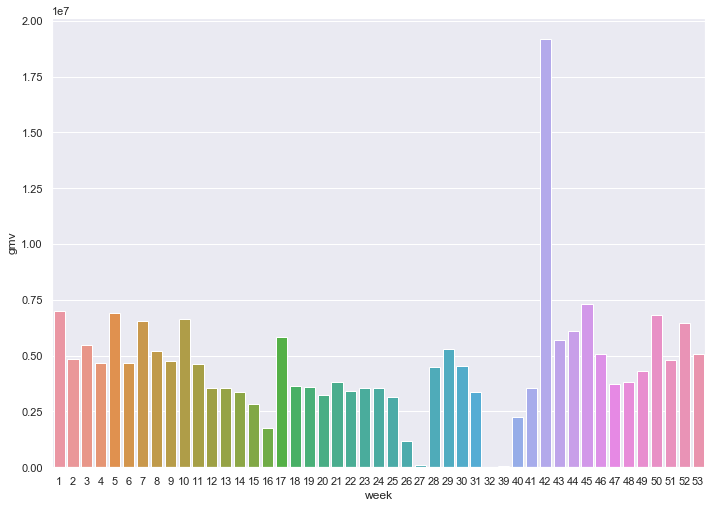

In [234]:
sns.barplot(x ="week", y ="gmv", data =HA_weekly_gmv)

In [235]:
# Weekly units sold
HA_weekly_units=eleckart_HomeAudio.groupby(['week'], as_index=False).agg({"units": "sum"}).sort_values(['units'], ascending=[False])
HA_weekly_units.head()

,week,units
35,42,7956
38,45,3336
0,1,3285
4,5,3192
43,50,3075


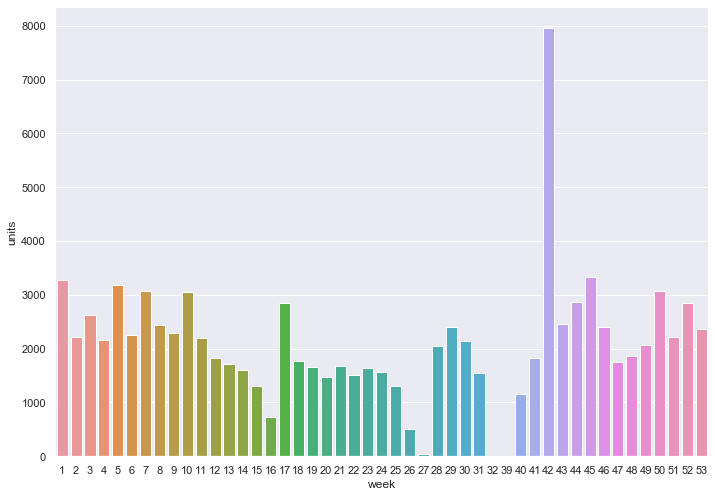

In [236]:
sns.barplot(x ="week", y ="units", data =HA_weekly_units)

In [237]:
## Aggregated Weekly orders by different payment types
HA_weekly_units_sold_by_payment_type=eleckart_HomeAudio.groupby(['week','s1_fact_order_payment_type'], as_index=False).agg({"units": "sum"})
HA_weekly_units_sold_by_payment_type.head()

,week,s1_fact_order_payment_type,units
0,1,COD,2842
1,1,Prepaid,443
2,2,COD,1819
3,2,Prepaid,398
4,3,COD,2063


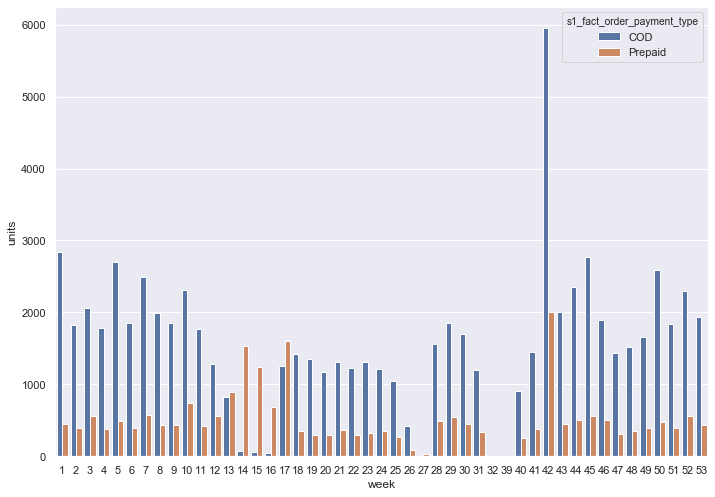

In [238]:
sns.barplot(x ="week", y ="units",hue='s1_fact_order_payment_type', data =HA_weekly_units_sold_by_payment_type)

In [239]:
## Aggregated units sold for top 10 Home AudioProducts
HA_product_vertical_units_sold_top10=eleckart_HomeAudio.groupby(['product_analytic_vertical'], as_index=False).agg({"units": "sum"}).sort_values(['units'], ascending=[False])
HA_product_vertical_units_sold_top10.head(10)

,product_analytic_vertical,units
6,HomeAudioSpeaker,70753
4,FMRadio,18828
10,VoiceRecorder,3249
0,BoomBox,2006
2,Dock,1673
5,HiFiSystem,1239
3,DockingStation,341
1,DJController,161
9,SoundMixer,64
8,SlingBox,5


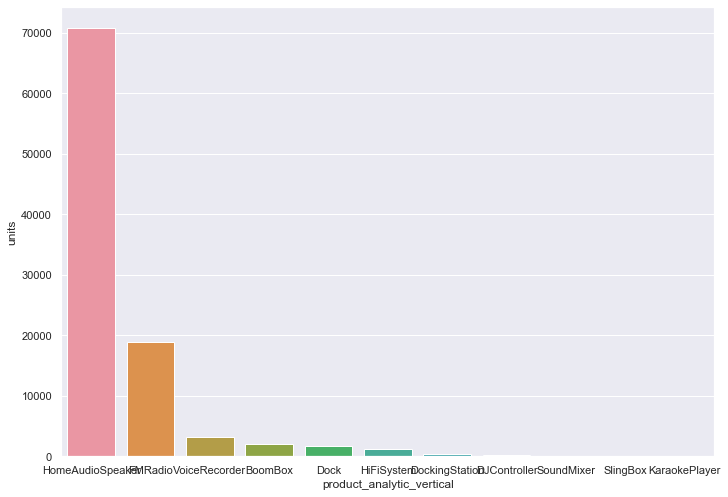

In [240]:
sns.barplot(x ="product_analytic_vertical", y ="units",data =HA_product_vertical_units_sold_top10)

In [241]:
## Weekly average mrp of the products sold
HA_weekly_mrp=eleckart_HomeAudio.groupby(['week'], as_index=False).agg({"product_mrp": "mean"}).sort_values(['product_mrp'], ascending=[False])
HA_weekly_mrp.head()

,week,product_mrp
32,39,"48,595.00"
43,50,"4,800.02"
35,42,"4,687.43"
26,27,"4,642.47"
38,45,"4,574.96"


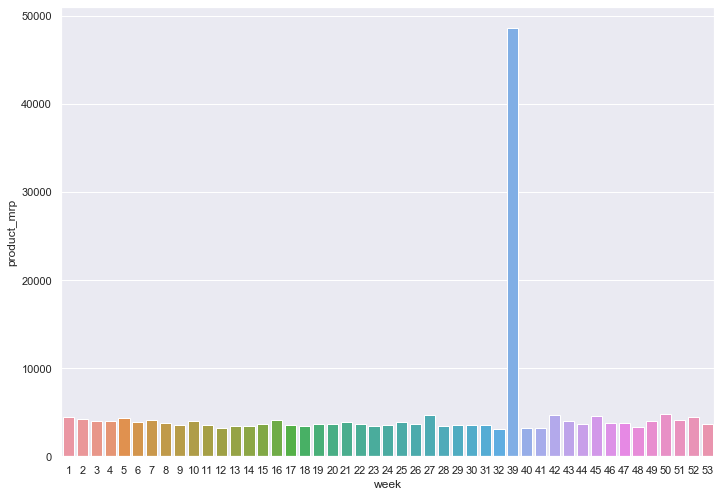

In [242]:
sns.barplot(x ="week", y ="product_mrp",data =HA_weekly_mrp)

In [243]:
# Aggregated Product units sold on weekdays/weekends
HA_wday_units_sold=eleckart_HomeAudio.groupby(['wday'], as_index=False).agg({"units": "sum"}).sort_values(['units'], ascending=[False])
HA_wday_units_sold.head()

,wday,units
2,2,16414
4,4,15284
5,5,13896
1,1,13634
3,3,13606


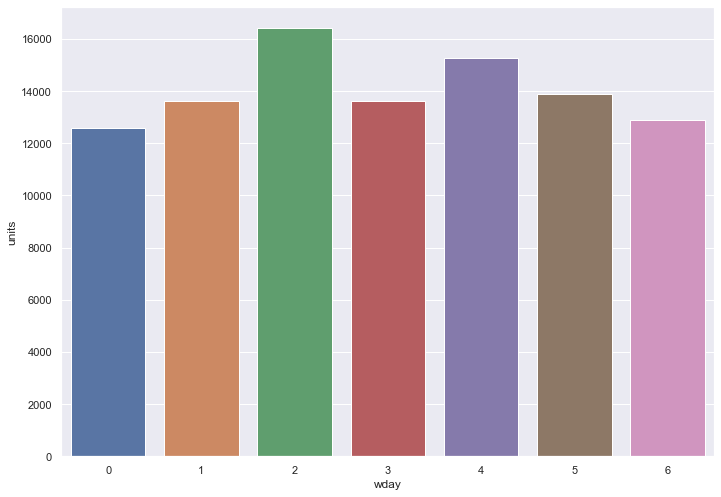

In [244]:
sns.barplot(x ="wday", y ="units",data =HA_wday_units_sold)

In [245]:
## Units sold of special sale day [i.e. on different holidays]
HA_special_sale_day_units_sold=eleckart_HomeAudio.loc[(eleckart_HomeAudio['special_sale']!='Regular Day')]
HA_special_sale_day_units_sold.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,SEM,Radio,Other,Affiliates,week_y,NPS,NPSScore,holiday_count,ItemType,month_date
2461,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,Luxury,2015-10-16-10
2462,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,Luxury,2015-10-16-10
2463,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,Luxury,2015-10-16-10
2471,2015-10-16,2015,10,"4,418,147,055,565,400.00","4,418,147,055,565,400.00","6,700.00",1,0,0,COD,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,Luxury,2015-10-16-10
2479,2015-10-15,2015,10,"3,417,694,594,666,300.00","3,417,694,594,666,300.00","6,099.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,Luxury,2015-10-15-10


In [246]:
HA_special_sale_day_units_sold=HA_special_sale_day_units_sold.groupby(['special_sale'], as_index=False).agg({"units": "sum"}).sort_values(['units'], ascending=[False])
HA_special_sale_day_units_sold

,special_sale,units
3,Daussera,5447
4,Diwali,3870
2,Christmas & New Year,3444
1,BSD,1715
8,Republic Day,1450
6,FHSD,1230
7,Pacman,990
0,BED,746
5,Eid & Rathayatra,656
9,Valentine Day,580


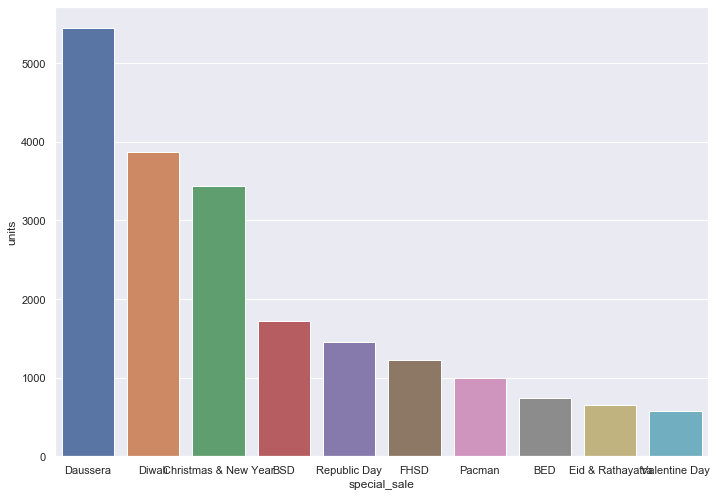

In [247]:
sns.barplot(x ="special_sale", y ="units",data =HA_special_sale_day_units_sold)

### Gaming Accessory

In [248]:
## Weekly Gross Merchandise Value--GamingAccessory
GA_weekly_gmv=eleckart_GamingAccessory.groupby(['week'], as_index=False).agg({"gmv": "sum"}).sort_values(['gmv'], ascending=[False])
GA_weekly_gmv.head()

,week,gmv
38,42,"7,195,030.62"
16,17,"5,888,741.00"
20,21,"5,153,867.33"
2,3,"4,667,260.30"
9,10,"4,541,478.14"


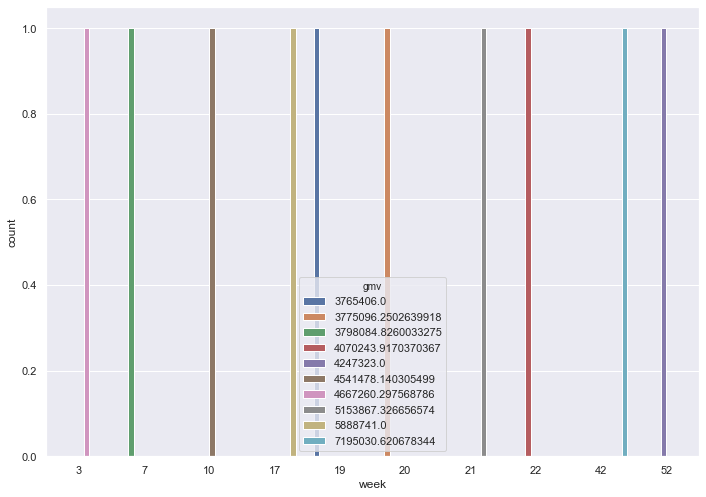

In [249]:
sns.countplot(x ="week",hue ="gmv",data =GA_weekly_gmv.head(10))

In [250]:
GA_weekly_units=eleckart_GamingAccessory.groupby(['week'], as_index=False).agg({"units": "sum"}).sort_values(['units'], ascending=[False])
GA_weekly_units.head()

,week,units
38,42,11351
16,17,6519
6,7,5877
48,52,5854
9,10,5631


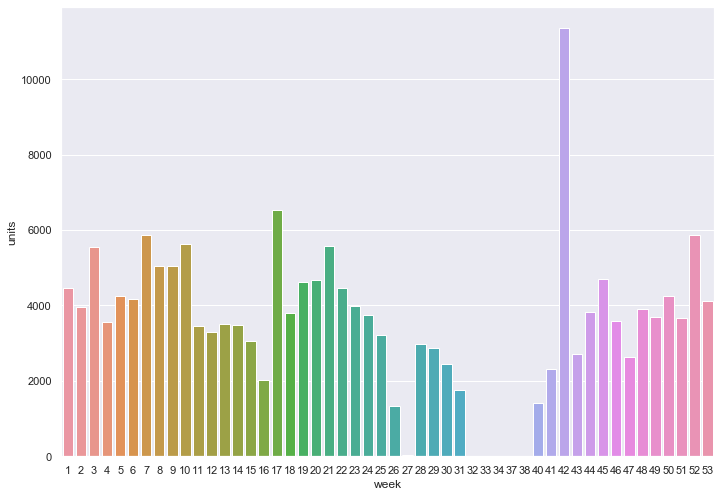

In [251]:
sns.barplot(x ="week", y ="units",data =GA_weekly_units)

In [252]:
## Aggregated Weekly orders by different payment types
GA_weekly_units_sold_by_payment_type=eleckart_GamingAccessory.groupby(['week','s1_fact_order_payment_type'], as_index=False).agg({"units": "sum"}).sort_values(['units'], ascending=[False])
GA_weekly_units_sold_by_payment_type.head()

,week,s1_fact_order_payment_type,units
72,42,COD,8967
92,52,COD,4900
12,7,COD,4760
4,3,COD,4378
40,21,COD,4362


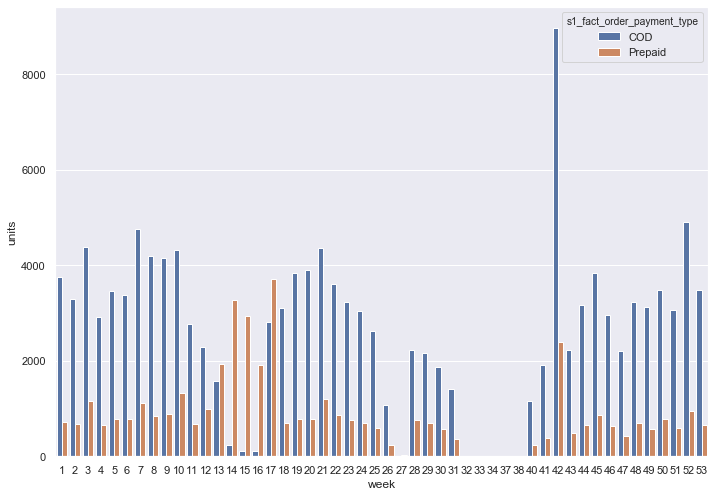

In [253]:
sns.barplot(x ="week", y ="units",hue='s1_fact_order_payment_type',data =GA_weekly_units_sold_by_payment_type)

In [254]:
### Aggregated units sold for top 10 GA
GA_product_vertical_units_sold_top10=eleckart_GamingAccessory.groupby(['product_analytic_vertical'], as_index=False).agg({"units": "sum"}).sort_values(['units'], ascending=[False])
GA_product_vertical_units_sold_top10.head(10)

,product_analytic_vertical,units
6,GamingHeadset,57904
2,GamePad,48468
9,GamingMouse,34525
3,GamingAccessoryKit,8089
7,GamingKeyboard,6020
14,TVOutCableAccessory,5897
8,GamingMemoryCard,5480
10,GamingMousePad,3081
4,GamingAdapter,2848
12,JoystickGamingWheel,2556


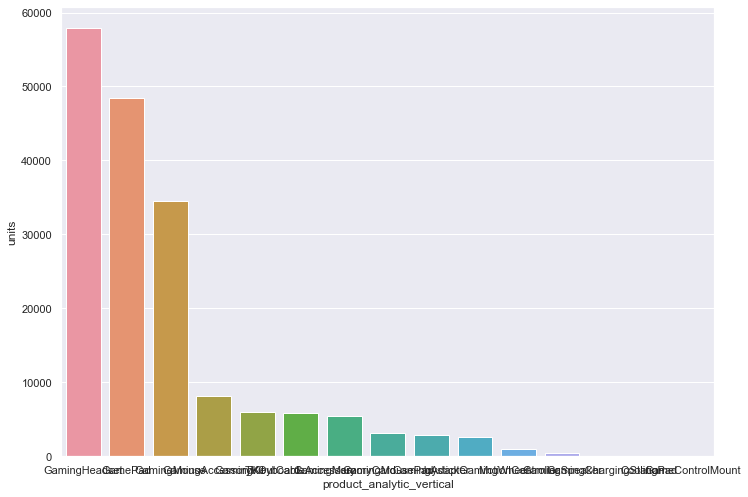

In [255]:
sns.barplot(x ="product_analytic_vertical", y ="units",data =GA_product_vertical_units_sold_top10)

In [256]:
## Weekly average mrp of the products sold
GA_weekly_mrp=eleckart_GamingAccessory.groupby(['week'], as_index=False).agg({"product_mrp": "mean"}).sort_values(['product_mrp'], ascending=[False])
GA_weekly_mrp.head()

,week,product_mrp
30,31,"5,311.19"
38,42,"4,834.84"
26,27,"3,799.19"
0,1,"2,615.39"
32,33,"2,583.25"


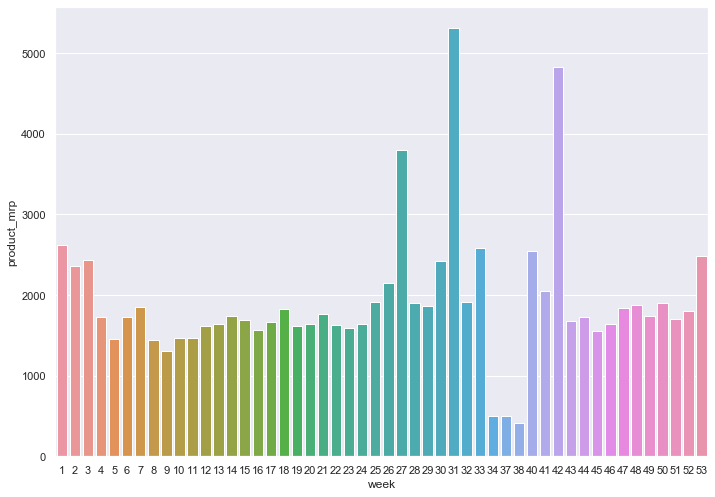

In [257]:
sns.barplot(x ="week", y ="product_mrp",data =GA_weekly_mrp)

In [258]:
## Aggregated Product units sold on weekdays/weekends
GA_wday_units_sold=eleckart_GamingAccessory.groupby(['wday'], as_index=False).agg({"units": "sum"}).sort_values(['units'], ascending=[False])
GA_wday_units_sold.head()

,wday,units
2,2,29953
4,4,28121
3,3,25578
1,1,24085
5,5,23176


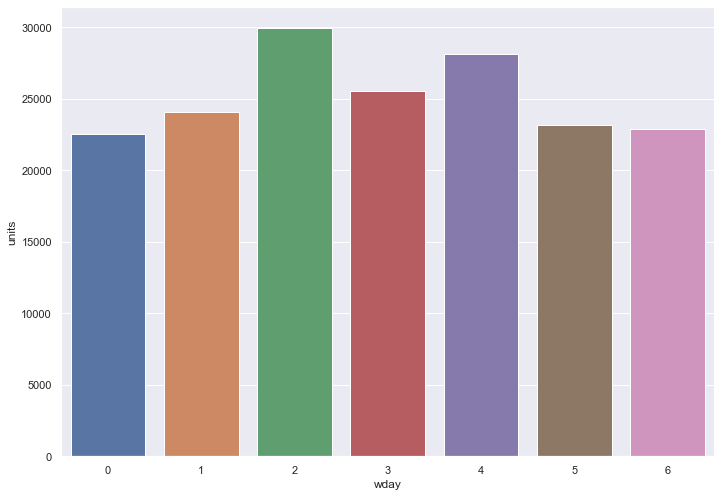

In [259]:
sns.barplot(x ="wday", y ="units",data =GA_wday_units_sold)

In [260]:
### Units sold of special sale day [i.e. on different holidays]
GA_special_sale_day_units_sold=eleckart_GamingAccessory.loc[(eleckart_GamingAccessory['special_sale']!='Regular Day')]
GA_special_sale_day_units_sold.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,SEM,Radio,Other,Affiliates,week_y,NPS,NPSScore,holiday_count,ItemType,month_date
1557,2015-10-15,2015,10,"1,417,669,228,375,400.00","1,417,669,228,375,400.00","2,899.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,Luxury,2015-10-15-10
1558,2015-10-17,2015,10,"1,419,414,998,353,400.00","1,419,414,998,353,400.00","2,609.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,Luxury,2015-10-17-10
1560,2015-10-16,2015,10,"4,417,730,112,316,700.00","4,417,730,112,316,700.00","2,750.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,Luxury,2015-10-16-10
1565,2015-10-16,2015,10,"3,418,252,708,402,100.00","3,418,252,708,402,100.00","2,899.00",1,0,0,COD,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,Luxury,2015-10-16-10
1571,2015-10-15,2015,10,"1,417,435,111,255,100.00","1,417,435,111,255,100.00","2,899.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,Luxury,2015-10-15-10


In [262]:
GA_special_sale_day_units_sold=GA_special_sale_day_units_sold.groupby(['special_sale'], as_index=False).agg({"units": "sum"}).sort_values(['units'], ascending=[False])
GA_special_sale_day_units_sold

,special_sale,units
3,Daussera,9387
2,Christmas & New Year,6099
4,Diwali,4337
1,BSD,3441
8,Republic Day,3142
7,Pacman,3065
6,FHSD,1711
9,Valentine Day,1360
0,BED,1153
5,Eid & Rathayatra,716


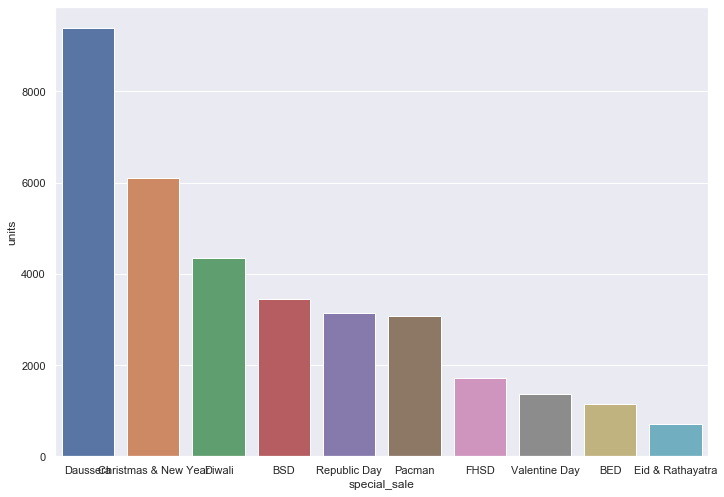

In [263]:
sns.barplot(x ="special_sale", y ="units",data =GA_special_sale_day_units_sold)

In [264]:
# Mean discount percentage every week for the 1 years
mean_discount_percent=eleckart_GamingAccessory.groupby(['week'], as_index=False).agg({"Discount_Percentage": "mean"}).sort_values(['Discount_Percentage'], ascending=[False])
mean_discount_percent.head()

,week,Discount_Percentage
31,32,62.93
38,42,53.29
33,34,52.10
48,52,52.06
6,7,50.69


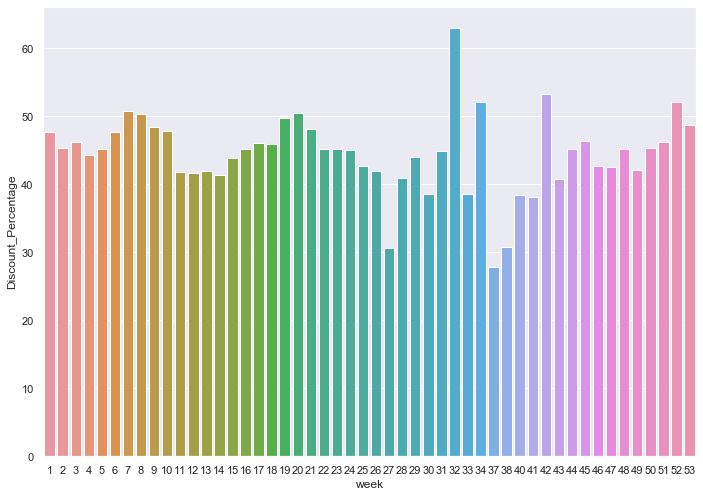

In [265]:
sns.barplot(x ="week", y ="Discount_Percentage",data =mean_discount_percent)

In [266]:
# Mean discount percentage every week for the 1 years
HA_mean_discount_percent=eleckart_HomeAudio.groupby(['week'], as_index=False).agg({"Discount_Percentage": "mean"}).sort_values(['Discount_Percentage'], ascending=[False])
HA_mean_discount_percent.head()

,week,Discount_Percentage
43,50,47.67
0,1,45.53
38,45,44.69
4,5,43.68
6,7,43.44


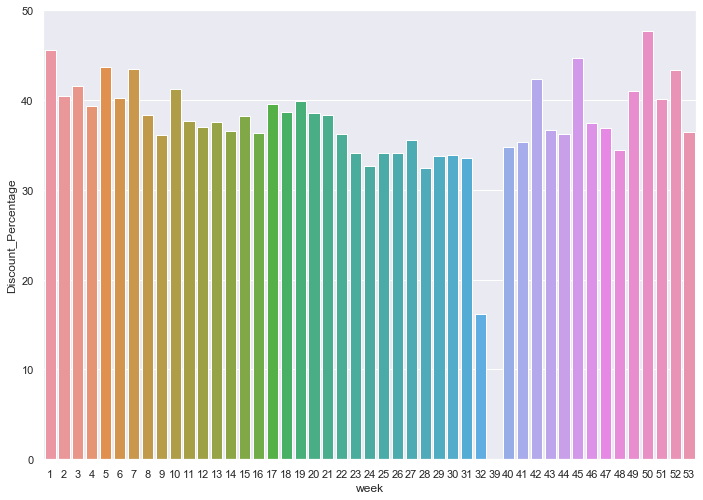

In [267]:
sns.barplot(x ="week", y ="Discount_Percentage",data=HA_mean_discount_percent)

In [268]:
# Mean discount percentage every week for the 1 years
CA_mean_discount_percent=eleckart_CameraAccessory.groupby(['week'], as_index=False).agg({"Discount_Percentage": "mean"}).sort_values(['Discount_Percentage'], ascending=[False])
CA_mean_discount_percent.head()


,week,Discount_Percentage
17,18,57.49
22,23,57.05
18,19,56.70
21,22,55.18
16,17,54.65


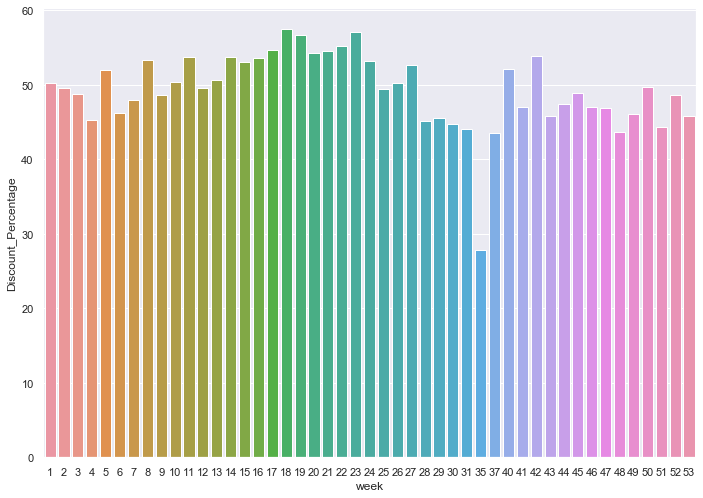

In [269]:
sns.barplot(x ="week", y ="Discount_Percentage",data=CA_mean_discount_percent)

In [270]:
#Model building for following data sets
eleckart_CameraAccessory.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,SEM,Radio,Other,Affiliates,week_y,NPS,NPSScore,holiday_count,ItemType,month_date
0,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,COD,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,Luxury,2015-10-17-10
1,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,0,0,COD,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,0.00,Luxury,2015-10-19-10
2,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,0,0,COD,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,0.00,MassMarket,2015-10-20-10
3,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,MassMarket,2015-10-14-10
4,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,MassMarket,2015-10-17-10


In [271]:
#impute NaN with 0 for important columns CameraAccessory

listcol=['TV','Digital','Sponsorship','Content Marketing','Online marketing',' Affiliates','SEM','Radio','Other']

eleckart_CameraAccessory[listcol]=eleckart_CameraAccessory[listcol].apply(lambda x: x.fillna(0)) 
eleckart_CameraAccessory[listcol].head()

,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
2,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
3,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
4,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00


In [272]:
#Ad-stock for CameraAccessory
import datetime  
import numpy as np  
import pandas as pd
import numpy.random as random
import statsmodels.api as sm
import statsmodels.tsa as tsa
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
### Incude adstock

ar_coeff = .5

eleckart_CameraAccessory['TV_adstock'] = tsa.filters.filtertools.recursive_filter(eleckart_CameraAccessory ['TV'], ar_coeff)
eleckart_CameraAccessory['Digital_adstock'] = tsa.filters.filtertools.recursive_filter(eleckart_CameraAccessory ['Digital'], ar_coeff)
eleckart_CameraAccessory['Sponsorship_adstock'] = tsa.filters.filtertools.recursive_filter(eleckart_CameraAccessory ['Sponsorship'], ar_coeff)
eleckart_CameraAccessory['Content Marketing_adstock'] = tsa.filters.filtertools.recursive_filter(eleckart_CameraAccessory ['Content Marketing'], ar_coeff)
eleckart_CameraAccessory['Online Marketing_adstock'] = tsa.filters.filtertools.recursive_filter(eleckart_CameraAccessory ['Online marketing'], ar_coeff)
eleckart_CameraAccessory['Affiliates_adstock'] = tsa.filters.filtertools.recursive_filter(eleckart_CameraAccessory [' Affiliates'], ar_coeff)
eleckart_CameraAccessory['SEM_adstock'] = tsa.filters.filtertools.recursive_filter(eleckart_CameraAccessory ['SEM'], ar_coeff)
eleckart_CameraAccessory['Radio_adstock'] = tsa.filters.filtertools.recursive_filter(eleckart_CameraAccessory ['Radio'], ar_coeff)
eleckart_CameraAccessory['Other_adstock'] = tsa.filters.filtertools.recursive_filter(eleckart_CameraAccessory ['Other'], ar_coeff)
eleckart_CameraAccessory.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,month_date,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online Marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,COD,...,2015-10-17-10,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,0,0,COD,...,2015-10-19-10,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00
2,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,0,0,COD,...,2015-10-20-10,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00
3,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,0,0,Prepaid,...,2015-10-14-10,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00
4,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,Prepaid,...,2015-10-17-10,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00


#### Analyzing GMV against each channel adstock

In [273]:
#GMV against TV Adstock
TV_adstock_gmv=eleckart_CameraAccessory.groupby(['week'], as_index=False).agg({"gmv": "sum","TV_adstock":"mean"}).sort_values(['gmv'], ascending=[False])
TV_adstock_gmv.head()

,week,gmv,TV_adstock
35,42,"12,862,543.98","27,747,147.64"
16,17,"8,934,564.00","22,840,470.72"
20,21,"8,041,519.00","6,190,004.16"
9,10,"7,680,343.00","41,950,193.89"
2,3,"6,870,874.00","19,780,268.05"


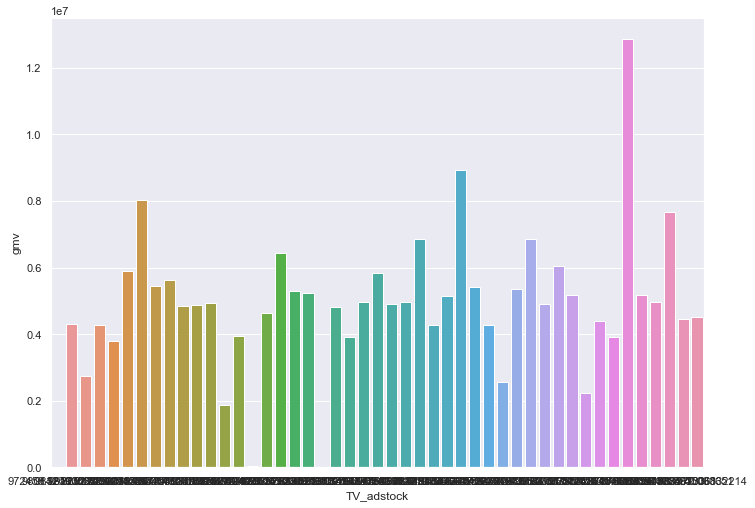

In [274]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x ="TV_adstock", y ="gmv",data=TV_adstock_gmv)

In [275]:
#GMV against Digital Adstock
Digital_adstock_gmv=eleckart_CameraAccessory.groupby(['week'], as_index=False).agg({"gmv": "sum","Digital_adstock":"mean"}).sort_values(['gmv'], ascending=[False])
Digital_adstock_gmv.head()

,week,gmv,Digital_adstock
35,42,"12,862,543.98","56,984,044.89"
16,17,"8,934,564.00","4,047,353.86"
20,21,"8,041,519.00","3,480,488.65"
9,10,"7,680,343.00","9,481,413.99"
2,3,"6,870,874.00","2,070,082.29"


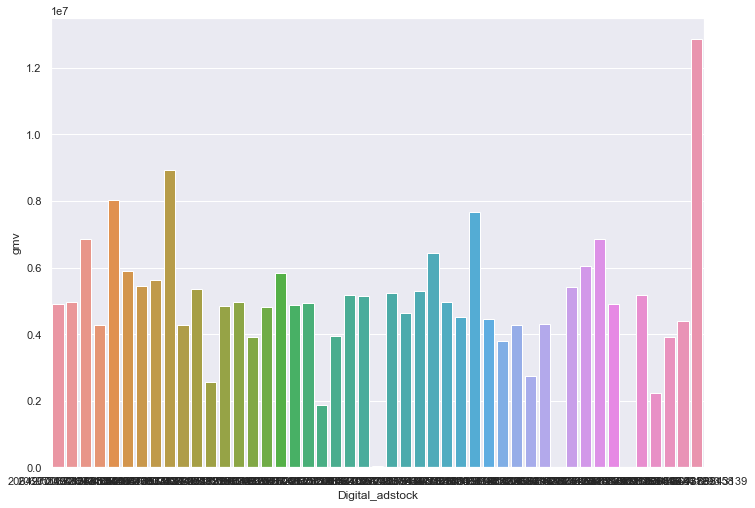

In [276]:
sns.barplot(x ="Digital_adstock", y ="gmv",data=Digital_adstock_gmv)

In [277]:
#GMV against Sponsorship Adstock
Sponsorship_adstock_gmv=eleckart_CameraAccessory.groupby(['week'], as_index=False).agg({"gmv": "sum","Sponsorship_adstock":"mean"}).sort_values(['gmv'], ascending=[False])
Sponsorship_adstock_gmv.head()

,week,gmv,Sponsorship_adstock
35,42,"12,862,543.98","382,279,653.53"
16,17,"8,934,564.00","115,979,450.32"
20,21,"8,041,519.00","143,043,572.09"
9,10,"7,680,343.00","187,648,578.92"
2,3,"6,870,874.00","19,061,702.28"


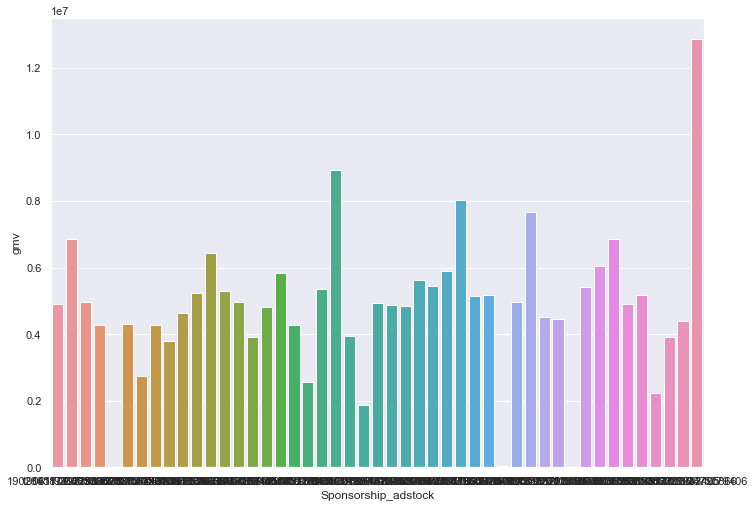

In [278]:
sns.barplot(x ="Sponsorship_adstock", y ="gmv",data=Sponsorship_adstock_gmv)

In [279]:
#GMV SEM Content Marketing Adstock
SEM_adstock_gmv=eleckart_CameraAccessory.groupby(['week'], as_index=False).agg({"gmv": "sum",'SEM_adstock':'mean'}).sort_values(['gmv'], ascending=[False])
SEM_adstock_gmv.head()

,week,gmv,SEM_adstock
35,42,"12,862,543.98","144,137,275.50"
16,17,"8,934,564.00","20,638,445.82"
20,21,"8,041,519.00","31,192,352.04"
9,10,"7,680,343.00","23,465,373.72"
2,3,"6,870,874.00","18,985,256.01"


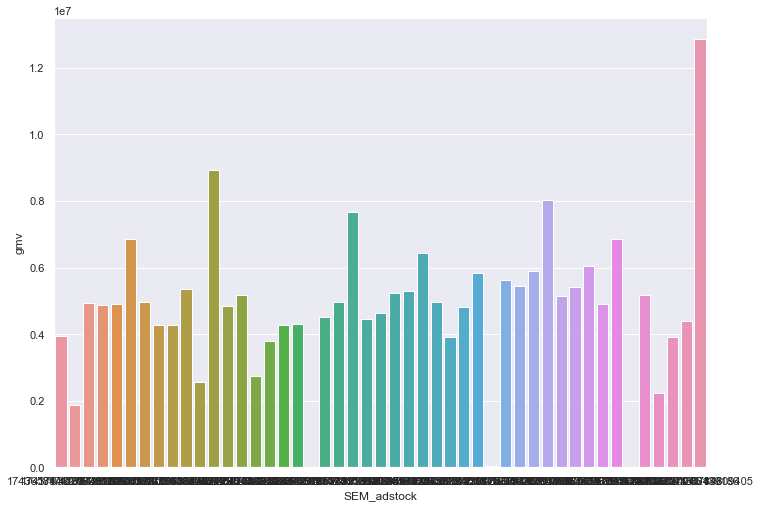

In [280]:
sns.barplot(x ="SEM_adstock", y ="gmv",data=SEM_adstock_gmv)

In [281]:
#GMV Affiliates_adstock Adstock
Affiliates_adstock_gmv=eleckart_CameraAccessory.groupby(['week'], as_index=False).agg({"gmv": "sum",'Affiliates_adstock':'mean'}).sort_values(['gmv'], ascending=[False])
Affiliates_adstock_gmv.head()

,week,gmv,Affiliates_adstock
35,42,"12,862,543.98","31,491,674.55"
16,17,"8,934,564.00","26,873,122.92"
20,21,"8,041,519.00","30,692,294.34"
9,10,"7,680,343.00","28,081,805.94"
2,3,"6,870,874.00","33,281,354.46"


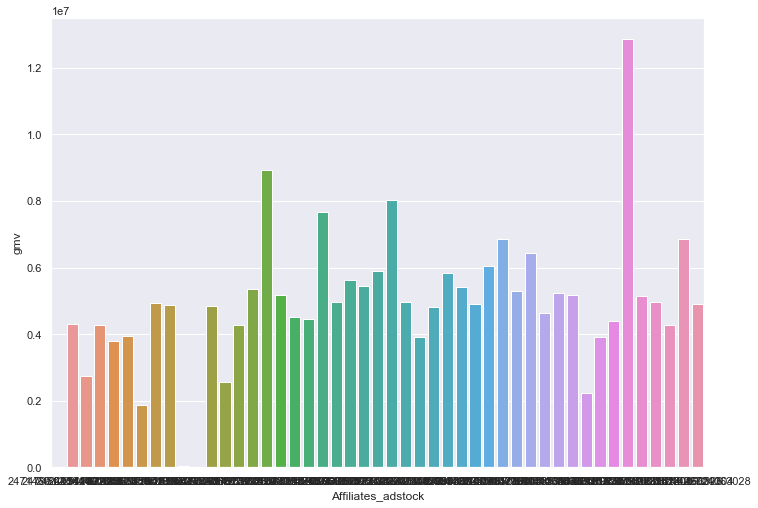

In [282]:
sns.barplot(x ="Affiliates_adstock", y ="gmv",data=Affiliates_adstock_gmv)

In [283]:
#GMV Radio_adstock Adstock
Radio_adstock_gmv=eleckart_CameraAccessory.groupby(['week'], as_index=False).agg({"gmv": "sum",'Radio_adstock':'mean'}).sort_values(['gmv'], ascending=[False])
Radio_adstock_gmv.head()

,week,gmv,Radio_adstock
35,42,"12,862,543.98",301.99
16,17,"8,934,564.00","410,000.69"
20,21,"8,041,519.00","4,962,593.75"
9,10,"7,680,343.00","3,921,051.06"
2,3,"6,870,874.00","12,182,915.25"


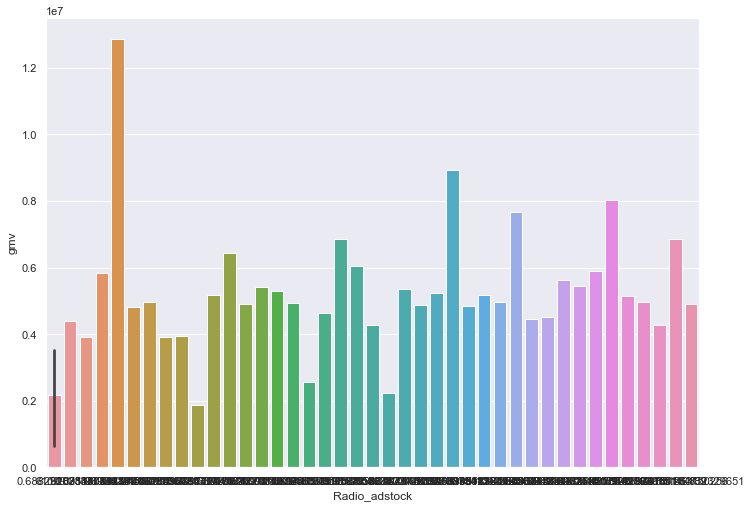

In [284]:
sns.barplot(x ="Radio_adstock", y ="gmv",data=Radio_adstock_gmv)

In [285]:
#GMV Other_adstock Adstock
Other_adstock_gmv=eleckart_CameraAccessory.groupby(['week'], as_index=False).agg({"gmv": "sum",'Other_adstock':'mean'}).sort_values(['gmv'], ascending=[False])
Other_adstock_gmv.head()

,week,gmv,Other_adstock
35,42,"12,862,543.98","4,590.50"
16,17,"8,934,564.00","1,999,696.33"
20,21,"8,041,519.00","22,498,595.50"
9,10,"7,680,343.00","71,857,196.86"
2,3,"6,870,874.00","122,237,687.53"


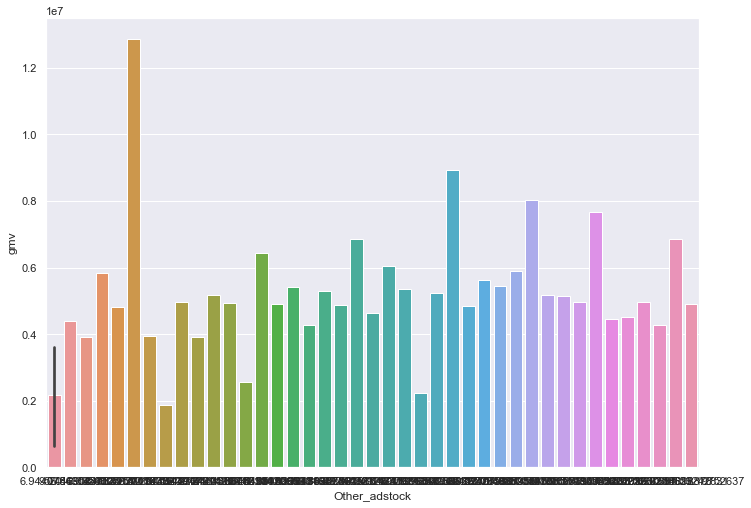

In [286]:
sns.barplot(x ="Other_adstock", y ="gmv",data=Other_adstock_gmv)

In [287]:
#GMV Content Marketing Adstock
Content_Marketing_adstock_gmv=eleckart_CameraAccessory.groupby(['week'], as_index=False).agg({"gmv": "sum","Content Marketing_adstock":"mean"}).sort_values(['gmv'], ascending=[False])
Content_Marketing_adstock_gmv.head()

,week,gmv,Content Marketing_adstock
35,42,"12,862,543.98","15,548,121.33"
16,17,"8,934,564.00","442,359.08"
20,21,"8,041,519.00","3,564,258.94"
9,10,"7,680,343.00","1,671,999.63"
2,3,"6,870,874.00","4,064,310.88"


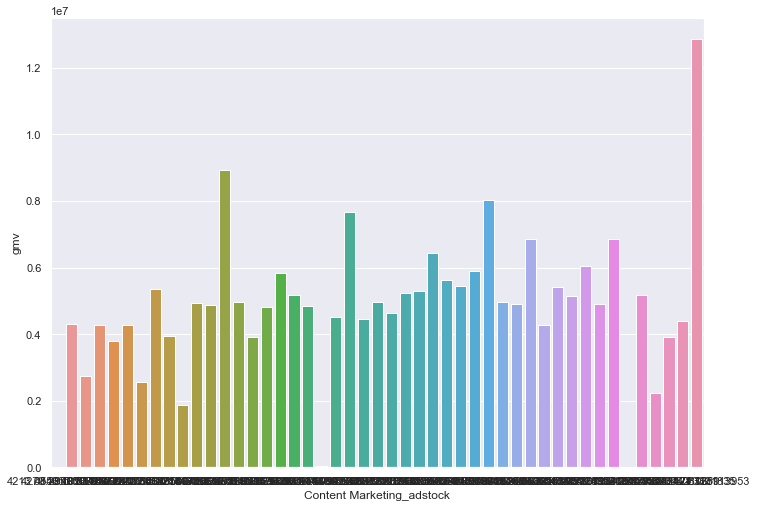

In [288]:
sns.barplot(x ="Content Marketing_adstock", y ="gmv",data=Content_Marketing_adstock_gmv)

In [289]:
#GMV Online Marketing Adstock
Onmkt_adstock_gmv=eleckart_CameraAccessory.groupby(['week'], as_index=False).agg({"gmv": "sum","Online Marketing_adstock":"mean"}).sort_values(['gmv'], ascending=[False])
Onmkt_adstock_gmv.head()

,week,gmv,Online Marketing_adstock
35,42,"12,862,543.98","110,052,529.83"
16,17,"8,934,564.00","79,380,855.89"
20,21,"8,041,519.00","106,737,398.43"
9,10,"7,680,343.00","83,277,737.70"
2,3,"6,870,874.00","103,411,471.80"


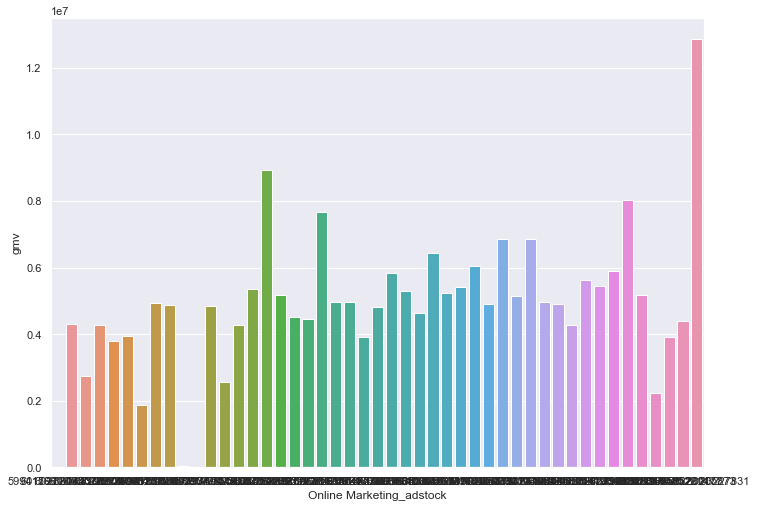

In [290]:
sns.barplot(x ="Online Marketing_adstock", y ="gmv",data=Onmkt_adstock_gmv)

In [291]:
#Moving Avg of 1st week
#df=eleckart_CameraAccessory['gmvperunit'].rolling(window=2).mean()
df=eleckart_CameraAccessory[['gmvperunit','Discount_Percentage','week']]
df['LP_MA1']=df['gmvperunit'].rolling(window=2).mean()
df['PO_MA1']=df['Discount_Percentage'].rolling(window=2).mean()
#df['MA2']=df.rolling(window=4).mean()
df.head()

,gmvperunit,Discount_Percentage,week,LP_MA1,PO_MA1
0,"6,400.00",10.99,42,nan,nan
1,"6,900.00",4.03,43,"6,650.00",7.51
2,"1,990.00",5.19,43,"4,445.00",4.61
3,"1,690.00",19.49,42,"1,840.00",12.34
4,"1,618.00",22.92,42,"1,654.00",21.20


In [292]:
#Moving Avg of 2ndst week
#df2=eleckart_CameraAccessory['gmvperunit'].rolling(window=3).mean()
df2=eleckart_CameraAccessory[['gmvperunit','Discount_Percentage','week']]
df2['LP_MA2']=df2['gmvperunit'].rolling(window=3).mean()
df2['PO_MA2']=df2['Discount_Percentage'].rolling(window=3).mean()
#df['MA2']=df.rolling(window=4).mean()
df2.head()

,gmvperunit,Discount_Percentage,week,LP_MA2,PO_MA2
0,"6,400.00",10.99,42,nan,nan
1,"6,900.00",4.03,43,nan,nan
2,"1,990.00",5.19,43,"5,096.67",6.74
3,"1,690.00",19.49,42,"3,526.67",9.57
4,"1,618.00",22.92,42,"1,766.00",15.86


In [293]:
#Moving Avg of 3rd week
#df3=eleckart_CameraAccessory['gmvperunit'].rolling(window=4).mean()
df3=eleckart_CameraAccessory[['gmvperunit','Discount_Percentage','week']]
df3['LP_MA3']=df3['gmvperunit'].rolling(window=4).mean()
df3['PO_MA3']=df3['Discount_Percentage'].rolling(window=4).mean()
#df['MA2']=df.rolling(window=4).mean()
df3.head()

,gmvperunit,Discount_Percentage,week,LP_MA3,PO_MA3
0,"6,400.00",10.99,42,nan,nan
1,"6,900.00",4.03,43,nan,nan
2,"1,990.00",5.19,43,nan,nan
3,"1,690.00",19.49,42,"4,245.00",9.92
4,"1,618.00",22.92,42,"3,049.50",12.91


In [294]:
eleckart_CameraAccessory['inc_LP_MA1']=(eleckart_CameraAccessory['gmvperunit'] - df['LP_MA1'])/df['LP_MA1']
eleckart_CameraAccessory['inc_LP_MA2']=(eleckart_CameraAccessory['gmvperunit'] - df2['LP_MA2'])/df2['LP_MA2']
eleckart_CameraAccessory['inc_LP_MA3']=(eleckart_CameraAccessory['gmvperunit'] - df3['LP_MA3'])/df3['LP_MA3']
eleckart_CameraAccessory.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,Sponsorship_adstock,Content Marketing_adstock,Online Marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,inc_LP_MA1,inc_LP_MA2,inc_LP_MA3
0,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,COD,...,"191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00,nan,nan,nan
1,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,0,0,COD,...,"286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00,0.04,nan,nan
2,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,0,0,COD,...,"334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00,-0.55,-0.61,nan
3,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,0,0,Prepaid,...,"358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00,-0.08,-0.52,-0.60
4,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,Prepaid,...,"370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00,-0.02,-0.08,-0.47


In [295]:
eleckart_CameraAccessory['inc_PO_MA1']=(eleckart_CameraAccessory['Discount_Percentage'] - df['PO_MA1'])/df['PO_MA1']
eleckart_CameraAccessory['inc_PO_MA2']=(eleckart_CameraAccessory['Discount_Percentage'] - df2['PO_MA2'])/df2['PO_MA2']
eleckart_CameraAccessory['inc_PO_MA3']=(eleckart_CameraAccessory['Discount_Percentage'] - df3['PO_MA3'])/df3['PO_MA3']
eleckart_CameraAccessory.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,inc_LP_MA1,inc_LP_MA2,inc_LP_MA3,inc_PO_MA1,inc_PO_MA2,inc_PO_MA3
0,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,COD,...,"15,747,089.60","72,093,251.50",0.00,0.00,nan,nan,nan,nan,nan,nan
1,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,0,0,COD,...,"23,620,634.40","108,139,877.25",0.00,0.00,0.04,nan,nan,-0.46,nan,nan
2,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,0,0,COD,...,"27,557,406.80","126,163,190.13",0.00,0.00,-0.55,-0.61,nan,0.13,-0.23,nan
3,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,0,0,Prepaid,...,"29,525,793.00","135,174,846.56",0.00,0.00,-0.08,-0.52,-0.60,0.58,1.04,0.96
4,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,Prepaid,...,"30,509,986.10","139,680,674.78",0.00,0.00,-0.02,-0.08,-0.47,0.08,0.44,0.78


In [296]:
eleckart_HomeAudio.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,SEM,Radio,Other,Affiliates,week_y,NPS,NPSScore,holiday_count,ItemType,month_date
2460,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,0.00,Luxury,2015-10-03-10
2461,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,Luxury,2015-10-16-10
2462,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,Luxury,2015-10-16-10
2463,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,Luxury,2015-10-16-10
2464,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,COD,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,0.00,Luxury,2015-10-20-10


In [297]:
#impute NaN with 0 for important columns HomeAudio

listcol=['TV','Digital','Sponsorship','Content Marketing','Online marketing',' Affiliates','SEM','Radio','Other']

eleckart_HomeAudio[listcol]=eleckart_HomeAudio[listcol].apply(lambda x: x.fillna(0)) 
eleckart_HomeAudio[listcol].head()

,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
2460,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
2461,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
2462,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
2463,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
2464,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00


In [298]:
#Ad-stock for HomeAudio
### Incude adstock

ar_coeff = .5

eleckart_HomeAudio['TV_adstock'] = tsa.filters.filtertools.recursive_filter(eleckart_HomeAudio ['TV'], ar_coeff)
eleckart_HomeAudio['Digital_adstock'] = tsa.filters.filtertools.recursive_filter(eleckart_HomeAudio ['Digital'], ar_coeff)
eleckart_HomeAudio['Sponsorship_adstock'] = tsa.filters.filtertools.recursive_filter(eleckart_HomeAudio ['Sponsorship'], ar_coeff)
eleckart_HomeAudio['Content Marketing_adstock'] = tsa.filters.filtertools.recursive_filter(eleckart_HomeAudio['Content Marketing'], ar_coeff)
eleckart_HomeAudio['Online marketing_adstock'] = tsa.filters.filtertools.recursive_filter(eleckart_HomeAudio ['Online marketing'], ar_coeff)
eleckart_HomeAudio['Affiliates_adstock'] = tsa.filters.filtertools.recursive_filter(eleckart_HomeAudio [' Affiliates'], ar_coeff)
eleckart_HomeAudio['SEM_adstock'] = tsa.filters.filtertools.recursive_filter(eleckart_HomeAudio ['SEM'], ar_coeff)
eleckart_HomeAudio['Radio_adstock'] = tsa.filters.filtertools.recursive_filter(eleckart_HomeAudio ['Radio'], ar_coeff)
eleckart_HomeAudio['Other_adstock'] = tsa.filters.filtertools.recursive_filter(eleckart_HomeAudio ['Other'], ar_coeff)
eleckart_HomeAudio.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,month_date,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
2460,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,Prepaid,...,2015-10-03-10,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
2461,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,Prepaid,...,2015-10-16-10,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00
2462,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,Prepaid,...,2015-10-16-10,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00
2463,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,Prepaid,...,2015-10-16-10,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00
2464,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,COD,...,2015-10-20-10,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00


In [299]:
#GMV against TV Adstock--HomeAudio
HA_TV_adstock_gmv=eleckart_HomeAudio.groupby(['week'], as_index=False).agg({"gmv": "sum","TV_adstock":"mean"}).sort_values(['gmv'], ascending=[False])
HA_TV_adstock_gmv.head()

,week,gmv,TV_adstock
35,42,"19,172,852.00","27,743,855.80"
38,45,"7,321,605.00","19,704,736.91"
0,1,"6,999,138.00","19,783,870.02"
4,5,"6,906,156.00","12,519,878.75"
43,50,"6,821,552.42","24,372,839.99"


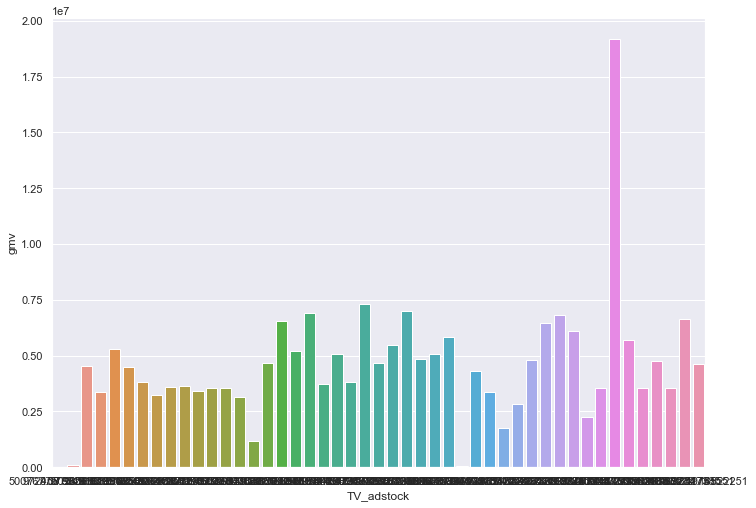

In [300]:
sns.barplot(x ="TV_adstock", y ="gmv",data=HA_TV_adstock_gmv)

In [301]:
#GMV against Digital Adstock
HA_Digital_adstock_gmv=eleckart_HomeAudio.groupby(['week'], as_index=False).agg({"gmv": "sum","Digital_adstock":"mean"}).sort_values(['gmv'], ascending=[False])
HA_Digital_adstock_gmv.head()

,week,gmv,Digital_adstock
35,42,"19,172,852.00","56,971,386.81"
38,45,"7,321,605.00","6,012,340.28"
0,1,"6,999,138.00","2,065,614.11"
4,5,"6,906,156.00","9,233,104.18"
43,50,"6,821,552.42","13,829,195.79"


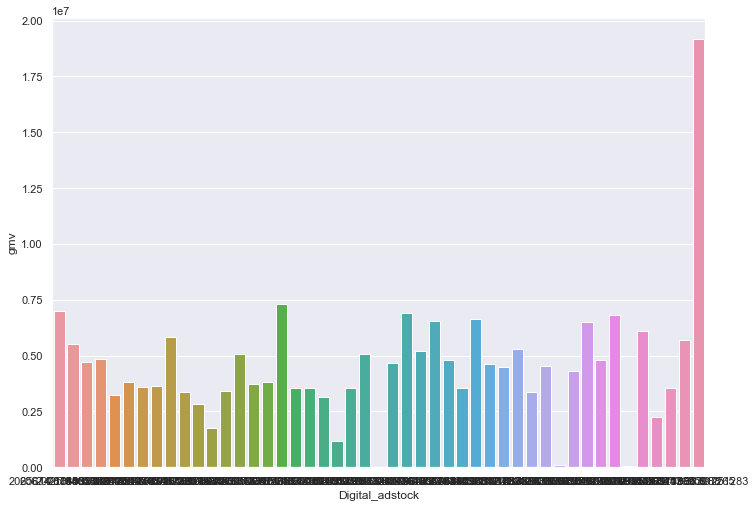

In [302]:
sns.barplot(x ="Digital_adstock", y ="gmv",data=HA_Digital_adstock_gmv)

In [303]:
#GMV against Sponsorship Adstock
HA_Sponsorship_adstock_gmv=eleckart_HomeAudio.groupby(['week'], as_index=False).agg({"gmv": "sum","Sponsorship_adstock":"mean"}).sort_values(['gmv'], ascending=[False])
HA_Sponsorship_adstock_gmv.head()

,week,gmv,Sponsorship_adstock
35,42,"19,172,852.00","382,188,086.21"
38,45,"7,321,605.00","66,559,595.06"
0,1,"6,999,138.00","19,079,081.30"
4,5,"6,906,156.00","56,761,712.13"
43,50,"6,821,552.42","255,971,315.59"


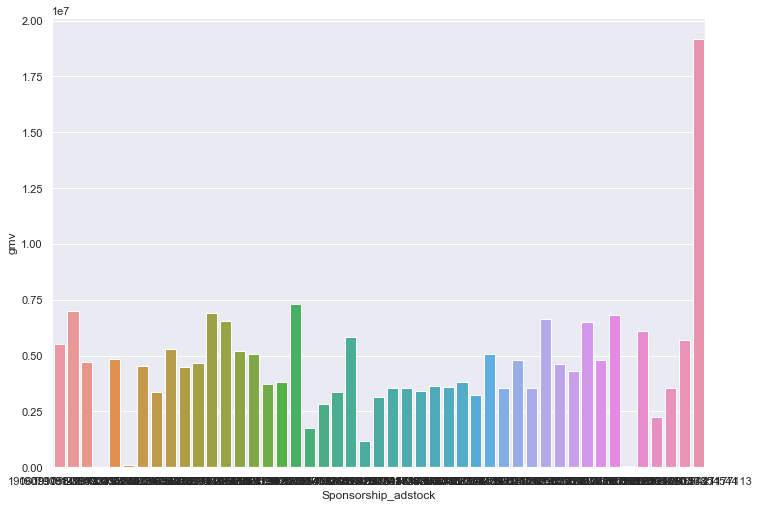

In [304]:
sns.barplot(x ="Sponsorship_adstock", y ="gmv",data=HA_Sponsorship_adstock_gmv)

In [305]:
#GMV SEM Content Marketing Adstock
HA_SEM_adstock_gmv=eleckart_HomeAudio.groupby(['week'], as_index=False).agg({"gmv": "sum",'SEM_adstock':'mean'}).sort_values(['gmv'], ascending=[False])
HA_SEM_adstock_gmv.head()

,week,gmv,SEM_adstock
35,42,"19,172,852.00","144,107,906.88"
38,45,"7,321,605.00","24,510,613.62"
0,1,"6,999,138.00","18,977,392.49"
4,5,"6,906,156.00","23,542,249.72"
43,50,"6,821,552.42","50,478,425.56"


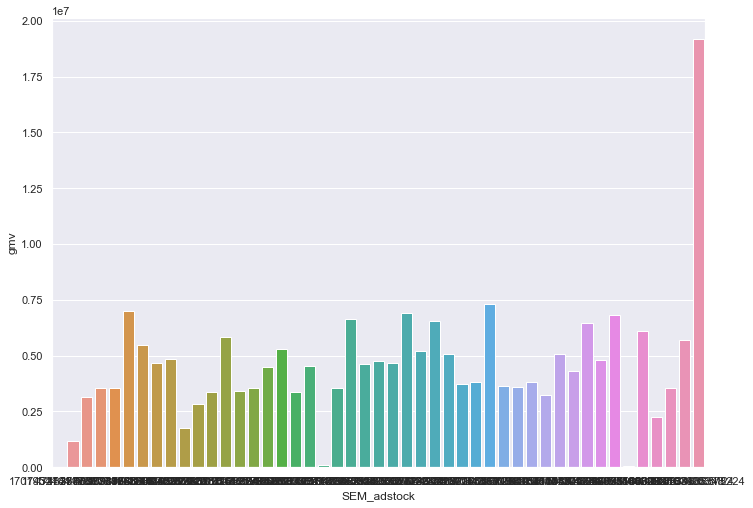

In [306]:
sns.barplot(x ="SEM_adstock", y ="gmv",data=HA_SEM_adstock_gmv)

In [307]:
#GMV Affiliates_adstock Adstock
HA_Affiliates_adstock_gmv=eleckart_HomeAudio.groupby(['week'], as_index=False).agg({"gmv": "sum",'Affiliates_adstock':'mean'}).sort_values(['gmv'], ascending=[False])
HA_Affiliates_adstock_gmv.head()

,week,gmv,Affiliates_adstock
35,42,"19,172,852.00","31,492,018.00"
38,45,"7,321,605.00","30,780,350.08"
0,1,"6,999,138.00","33,280,414.31"
4,5,"6,906,156.00","31,206,661.33"
43,50,"6,821,552.42","30,831,780.50"


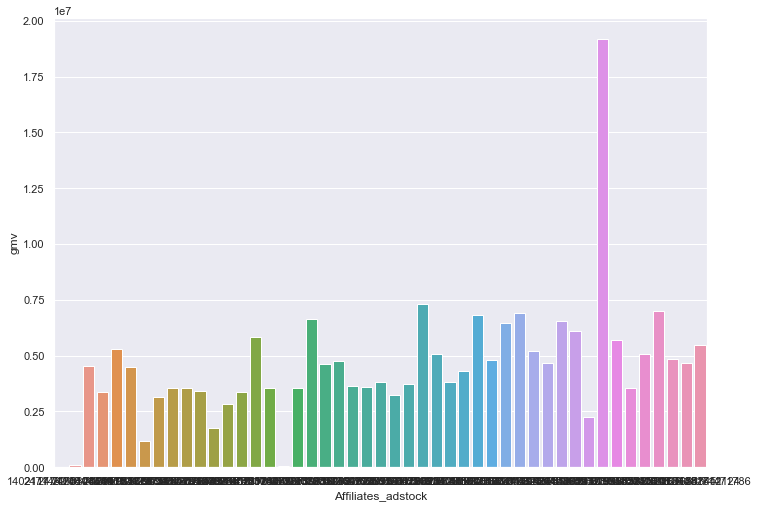

In [308]:
sns.barplot(x ="Affiliates_adstock", y ="gmv",data=HA_Affiliates_adstock_gmv)

In [309]:
#GMV Radio_adstock Adstock
HA_Radio_adstock_gmv=eleckart_HomeAudio.groupby(['week'], as_index=False).agg({"gmv": "sum",'Radio_adstock':'mean'}).sort_values(['gmv'], ascending=[False])
HA_Radio_adstock_gmv.head()

,week,gmv,Radio_adstock
35,42,"19,172,852.00","1,218.56"
38,45,"7,321,605.00",214.94
0,1,"6,999,138.00","12,182,864.28"
4,5,"6,906,156.00","9,530.72"
43,50,"6,821,552.42","3,439.56"


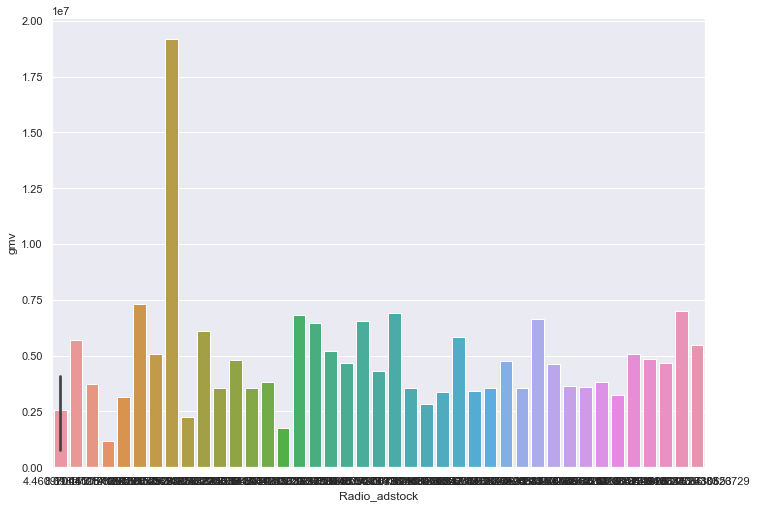

In [310]:
sns.barplot(x ="Radio_adstock", y ="gmv",data=HA_Radio_adstock_gmv)

In [311]:
#GMV Other_adstock Adstock
HA_Other_adstock_gmv=eleckart_HomeAudio.groupby(['week'], as_index=False).agg({"gmv": "sum",'Other_adstock':'mean'}).sort_values(['gmv'], ascending=[False])
HA_Other_adstock_gmv.head()

,week,gmv,Other_adstock
35,42,"19,172,852.00","12,262.98"
38,45,"7,321,605.00","1,138.15"
0,1,"6,999,138.00","122,239,099.43"
4,5,"6,906,156.00","117,767.51"
43,50,"6,821,552.42","34,510.27"


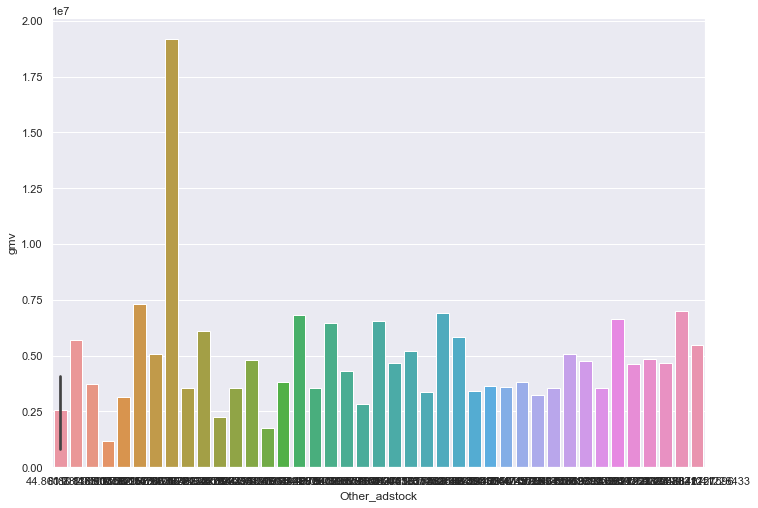

In [312]:
sns.barplot(x ="Other_adstock", y ="gmv",data=HA_Other_adstock_gmv)

In [313]:
#GMV Content Marketing Adstock
HA_Content_Marketing_adstock_gmv=eleckart_HomeAudio.groupby(['week'], as_index=False).agg({"gmv": "sum","Content Marketing_adstock":"mean"}).sort_values(['gmv'], ascending=[False])
HA_Content_Marketing_adstock_gmv.head()

,week,gmv,Content Marketing_adstock
35,42,"19,172,852.00","15,544,816.04"
38,45,"7,321,605.00","805,430.57"
0,1,"6,999,138.00","4,062,925.28"
4,5,"6,906,156.00","2,880,565.51"
43,50,"6,821,552.42","4,818,913.35"


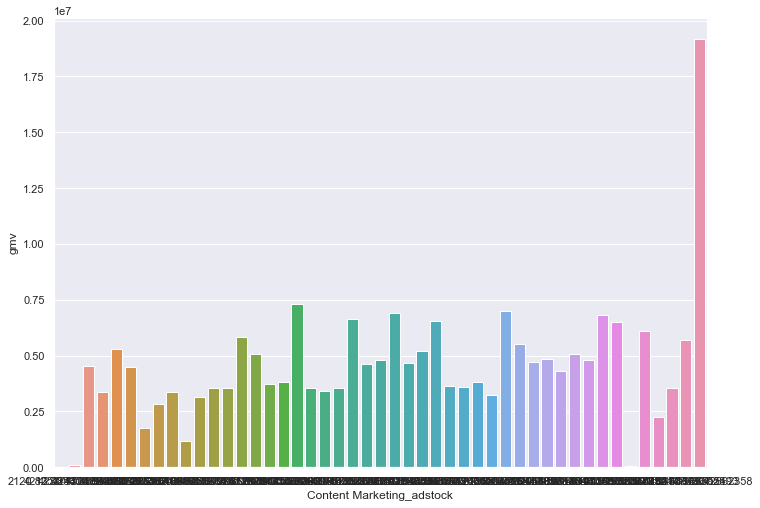

In [314]:
sns.barplot(x ="Content Marketing_adstock", y ="gmv",data=HA_Content_Marketing_adstock_gmv)

In [315]:
#GMV Online Marketing Adstock
HA_Onmkt_adstock_gmv=eleckart_HomeAudio.groupby(['week'], as_index=False).agg({"gmv": "sum","Online marketing_adstock":"mean"}).sort_values(['gmv'], ascending=[False])
HA_Onmkt_adstock_gmv.head()

,week,gmv,Online marketing_adstock
35,42,"19,172,852.00","110,049,764.64"
38,45,"7,321,605.00","91,310,954.73"
0,1,"6,999,138.00","103,407,593.15"
4,5,"6,906,156.00","96,017,209.73"
43,50,"6,821,552.42","101,627,017.24"


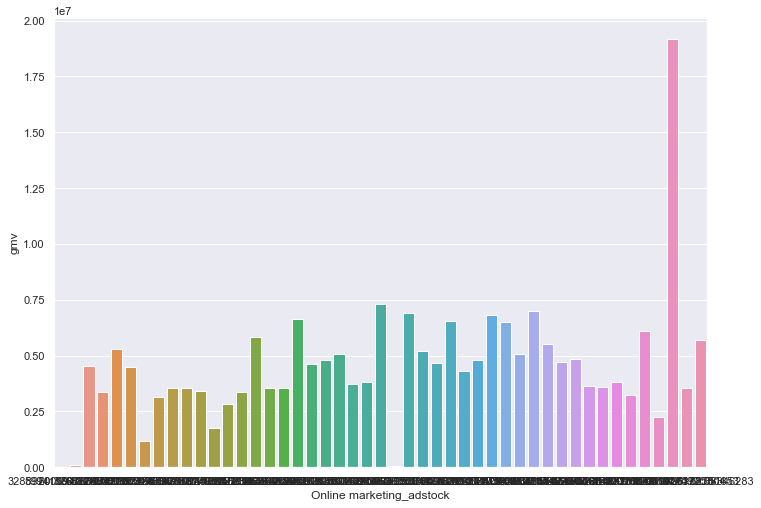

In [316]:
sns.barplot(x ="Online marketing_adstock", y ="gmv",data=HA_Onmkt_adstock_gmv)

In [317]:
#Moving Avg of 1st week--Advance KPI
#df=eleckart_HomeAudio['gmvperunit'].rolling(window=3).mean()
df=eleckart_HomeAudio[['gmvperunit','Discount_Percentage','week']]
df['LP_MA1']=df['gmvperunit'].rolling(window=2).mean()
df['PO_MA1']=df['Discount_Percentage'].rolling(window=2).mean()
#df['MA2']=df.rolling(window=4).mean()
df.head()

,gmvperunit,Discount_Percentage,week,LP_MA1,PO_MA1
2460,"7,049.00",6.00,40,nan,nan
2461,"5,489.00",26.80,42,"6,269.00",16.40
2462,"6,255.00",16.59,42,"5,872.00",21.70
2463,"6,099.00",18.67,42,"6,177.00",17.63
2464,"6,850.00",8.65,43,"6,474.50",13.66


In [318]:
#Moving Avg of 2ndst week
#df2=eleckart_HomeAudio['gmvperunit'].rolling(window=3).mean()
df2=eleckart_HomeAudio[['gmvperunit','Discount_Percentage','week']]
df2['LP_MA2']=df2['gmvperunit'].rolling(window=3).mean()
df2['PO_MA2']=df2['Discount_Percentage'].rolling(window=3).mean()
#df['MA2']=df.rolling(window=4).mean()
df2.head()

,gmvperunit,Discount_Percentage,week,LP_MA2,PO_MA2
2460,"7,049.00",6.00,40,nan,nan
2461,"5,489.00",26.80,42,nan,nan
2462,"6,255.00",16.59,42,"6,264.33",16.46
2463,"6,099.00",18.67,42,"5,947.67",20.69
2464,"6,850.00",8.65,43,"6,401.33",14.64


In [319]:
#Moving Avg of 3rd week
#df3=eleckart_HomeAudio['gmvperunit'].rolling(window=3).mean()
df3=eleckart_HomeAudio[['gmvperunit','Discount_Percentage','week']]
df3['LP_MA3']=df3['gmvperunit'].rolling(window=4).mean()
df3['PO_MA3']=df3['Discount_Percentage'].rolling(window=4).mean()
#df['MA2']=df.rolling(window=4).mean()
df3.head()

,gmvperunit,Discount_Percentage,week,LP_MA3,PO_MA3
2460,"7,049.00",6.00,40,nan,nan
2461,"5,489.00",26.80,42,nan,nan
2462,"6,255.00",16.59,42,nan,nan
2463,"6,099.00",18.67,42,"6,223.00",17.02
2464,"6,850.00",8.65,43,"6,173.25",17.68


In [320]:
eleckart_HomeAudio['inc_LP_MA1']=(eleckart_HomeAudio['gmvperunit'] - df['LP_MA1'])/df['LP_MA1']
eleckart_HomeAudio['inc_LP_MA2']=(eleckart_HomeAudio['gmvperunit'] - df2['LP_MA2'])/df2['LP_MA2']
eleckart_HomeAudio['inc_LP_MA3']=(eleckart_HomeAudio['gmvperunit'] - df3['LP_MA3'])/df3['LP_MA3']
eleckart_HomeAudio.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,inc_LP_MA1,inc_LP_MA2,inc_LP_MA3
2460,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,Prepaid,...,"191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00,nan,nan,nan
2461,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,Prepaid,...,"286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00,-0.12,nan,nan
2462,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,Prepaid,...,"334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00,0.07,-0.00,nan
2463,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,Prepaid,...,"358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00,-0.01,0.03,-0.02
2464,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,COD,...,"370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00,0.06,0.07,0.11


In [321]:
eleckart_HomeAudio['inc_PO_MA1']=(eleckart_HomeAudio['Discount_Percentage'] - df['PO_MA1'])/df['PO_MA1']
eleckart_HomeAudio['inc_PO_MA2']=(eleckart_HomeAudio['Discount_Percentage'] - df2['PO_MA2'])/df2['PO_MA2']
eleckart_HomeAudio['inc_PO_MA3']=(eleckart_HomeAudio['Discount_Percentage'] - df3['PO_MA3'])/df3['PO_MA3']
eleckart_HomeAudio.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,inc_LP_MA1,inc_LP_MA2,inc_LP_MA3,inc_PO_MA1,inc_PO_MA2,inc_PO_MA3
2460,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,Prepaid,...,"15,747,089.60","72,093,251.50",0.00,0.00,nan,nan,nan,nan,nan,nan
2461,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,Prepaid,...,"23,620,634.40","108,139,877.25",0.00,0.00,-0.12,nan,nan,0.63,nan,nan
2462,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,Prepaid,...,"27,557,406.80","126,163,190.13",0.00,0.00,0.07,-0.00,nan,-0.24,0.01,nan
2463,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,Prepaid,...,"29,525,793.00","135,174,846.56",0.00,0.00,-0.01,0.03,-0.02,0.06,-0.10,0.10
2464,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,COD,...,"30,509,986.10","139,680,674.78",0.00,0.00,0.06,0.07,0.11,-0.37,-0.41,-0.51


In [322]:
eleckart_GamingAccessory.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,SEM,Radio,Other,Affiliates,week_y,NPS,NPSScore,holiday_count,ItemType,month_date
1555,2015-10-04,2015,10,"1,408,216,975,064,600.00","1,408,216,975,064,600.00","3,075.00",1,0,0,COD,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,0.00,Luxury,2015-10-04-10
1556,2015-10-14,2015,10,"1,416,985,339,691,600.00","1,416,985,339,691,600.00","2,750.00",1,0,0,COD,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,Luxury,2015-10-14-10
1557,2015-10-15,2015,10,"1,417,669,228,375,400.00","1,417,669,228,375,400.00","2,899.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,Luxury,2015-10-15-10
1558,2015-10-17,2015,10,"1,419,414,998,353,400.00","1,419,414,998,353,400.00","2,609.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,4.00,Luxury,2015-10-17-10
1559,2015-10-26,2015,10,"1,427,167,582,532,600.00","1,427,167,582,532,600.00","2,772.00",1,0,0,Prepaid,...,"72,093,251.50",0.00,0.00,"15,747,089.60",40.00,NaN,nan,0.00,Luxury,2015-10-26-10


In [323]:
#impute NaN with 0 for important columns GamingAccessory

listcol=['TV','Digital','Sponsorship','Content Marketing','Online marketing',' Affiliates','SEM','Radio','Other']

eleckart_GamingAccessory[listcol]=eleckart_GamingAccessory[listcol].apply(lambda x: x.fillna(0)) 
eleckart_GamingAccessory[listcol].head()

,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
1555,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1556,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1557,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1558,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1559,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00


In [324]:
#Ad-stock of GamingAccessory
### Incude adstock

ar_coeff = .5

eleckart_GamingAccessory['TV_adstock'] = tsa.filters.filtertools.recursive_filter(eleckart_GamingAccessory['TV'], ar_coeff)
eleckart_GamingAccessory['Digital_adstock'] = tsa.filters.filtertools.recursive_filter(eleckart_GamingAccessory['Digital'], ar_coeff)
eleckart_GamingAccessory['Sponsorship_adstock'] = tsa.filters.filtertools.recursive_filter(eleckart_GamingAccessory['Sponsorship'], ar_coeff)
eleckart_GamingAccessory['Content Marketing_adstock'] = tsa.filters.filtertools.recursive_filter(eleckart_GamingAccessory['Content Marketing'], ar_coeff)
eleckart_GamingAccessory['Online marketing_adstock'] = tsa.filters.filtertools.recursive_filter(eleckart_GamingAccessory['Online marketing'], ar_coeff)
eleckart_GamingAccessory['Affiliates_adstock'] = tsa.filters.filtertools.recursive_filter(eleckart_GamingAccessory[' Affiliates'], ar_coeff)
eleckart_GamingAccessory['SEM_adstock'] = tsa.filters.filtertools.recursive_filter(eleckart_GamingAccessory['SEM'], ar_coeff)
eleckart_GamingAccessory['Radio_adstock'] = tsa.filters.filtertools.recursive_filter(eleckart_GamingAccessory['Radio'], ar_coeff)
eleckart_GamingAccessory['Other_adstock'] = tsa.filters.filtertools.recursive_filter(eleckart_GamingAccessory['Other'], ar_coeff)
eleckart_GamingAccessory.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,month_date,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
1555,2015-10-04,2015,10,"1,408,216,975,064,600.00","1,408,216,975,064,600.00","3,075.00",1,0,0,COD,...,2015-10-04-10,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1556,2015-10-14,2015,10,"1,416,985,339,691,600.00","1,416,985,339,691,600.00","2,750.00",1,0,0,COD,...,2015-10-14-10,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00
1557,2015-10-15,2015,10,"1,417,669,228,375,400.00","1,417,669,228,375,400.00","2,899.00",1,0,0,Prepaid,...,2015-10-15-10,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00
1558,2015-10-17,2015,10,"1,419,414,998,353,400.00","1,419,414,998,353,400.00","2,609.00",1,0,0,Prepaid,...,2015-10-17-10,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00
1559,2015-10-26,2015,10,"1,427,167,582,532,600.00","1,427,167,582,532,600.00","2,772.00",1,0,0,Prepaid,...,2015-10-26-10,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00


In [325]:
#GMV against TV Adstock---GamingAccessory
GA_TV_adstock_gmv=eleckart_GamingAccessory.groupby(['week'], as_index=False).agg({"gmv": "sum","TV_adstock":"mean"}).sort_values(['gmv'], ascending=[False])
GA_TV_adstock_gmv.head()

,week,gmv,TV_adstock
38,42,"7,195,030.62","27,745,718.87"
16,17,"5,888,741.00","22,805,101.99"
20,21,"5,153,867.33","6,190,875.19"
2,3,"4,667,260.30","19,776,438.74"
9,10,"4,541,478.14","41,949,310.39"


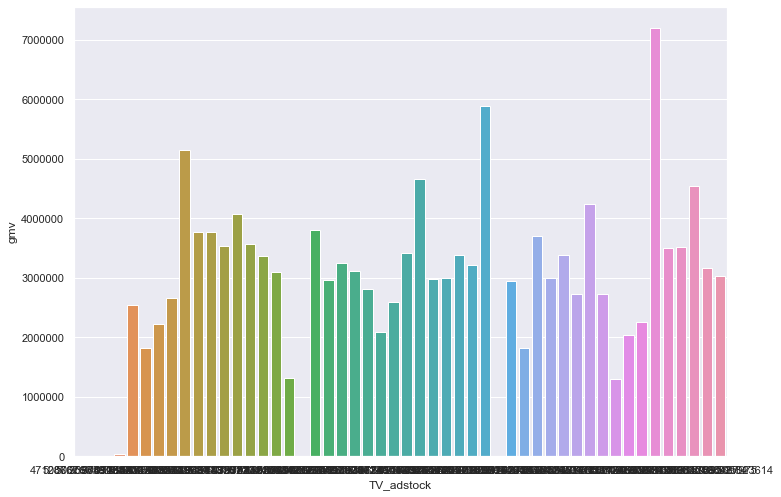

In [326]:
sns.barplot(x ="TV_adstock", y ="gmv",data=GA_TV_adstock_gmv)

In [327]:
#GMV against Digital Adstock
GA_Digital_adstock_gmv=eleckart_GamingAccessory.groupby(['week'], as_index=False).agg({"gmv": "sum","Digital_adstock":"mean"}).sort_values(['gmv'], ascending=[False])
GA_Digital_adstock_gmv.head()

,week,gmv,Digital_adstock
38,42,"7,195,030.62","56,978,666.31"
16,17,"5,888,741.00","4,065,073.48"
20,21,"5,153,867.33","3,482,646.96"
2,3,"4,667,260.30","2,065,996.04"
9,10,"4,541,478.14","9,477,883.21"


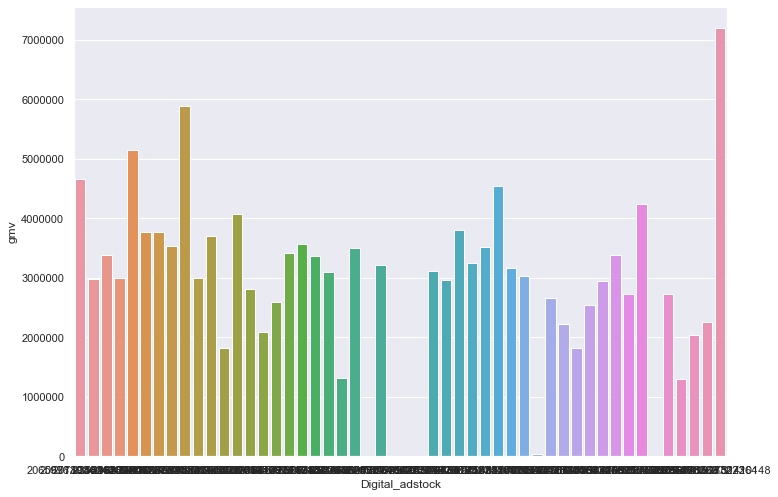

In [328]:
sns.barplot(x ="Digital_adstock", y ="gmv",data=GA_Digital_adstock_gmv)

In [329]:
#GMV against Sponsorship Adstock
GA_Sponsorship_adstock_gmv=eleckart_GamingAccessory.groupby(['week'], as_index=False).agg({"gmv": "sum","Sponsorship_adstock":"mean"}).sort_values(['gmv'], ascending=[False])
GA_Sponsorship_adstock_gmv.head()

,week,gmv,Sponsorship_adstock
38,42,"7,195,030.62","382,232,945.54"
16,17,"5,888,741.00","116,068,212.17"
20,21,"5,153,867.33","143,024,381.62"
2,3,"4,667,260.30","19,030,098.78"
9,10,"4,541,478.14","187,602,728.46"


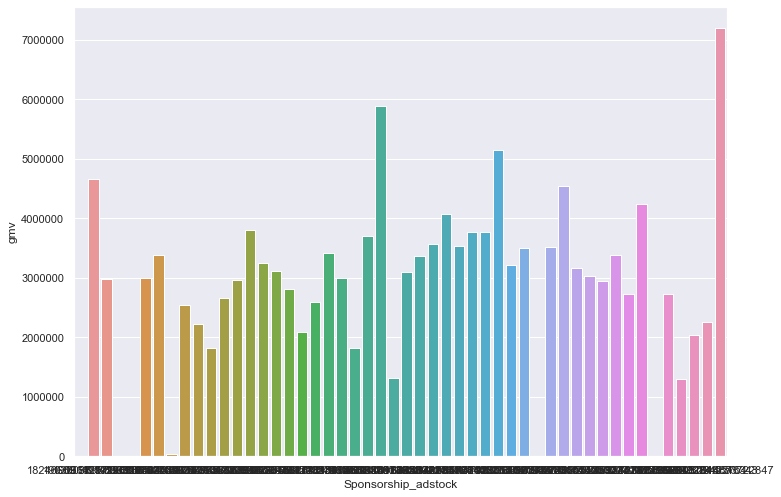

In [330]:
sns.barplot(x ="Sponsorship_adstock", y ="gmv",data=GA_Sponsorship_adstock_gmv)

In [331]:
#GMV SEM Content Marketing Adstock
HA_SEM_adstock_gmv=eleckart_GamingAccessory.groupby(['week'], as_index=False).agg({"gmv": "sum",'SEM_adstock':'mean'}).sort_values(['gmv'], ascending=[False])
HA_SEM_adstock_gmv.head()

,week,gmv,SEM_adstock
38,42,"7,195,030.62","144,124,215.32"
16,17,"5,888,741.00","20,689,680.00"
20,21,"5,153,867.33","31,183,905.31"
2,3,"4,667,260.30","18,975,278.46"
9,10,"4,541,478.14","23,451,336.04"


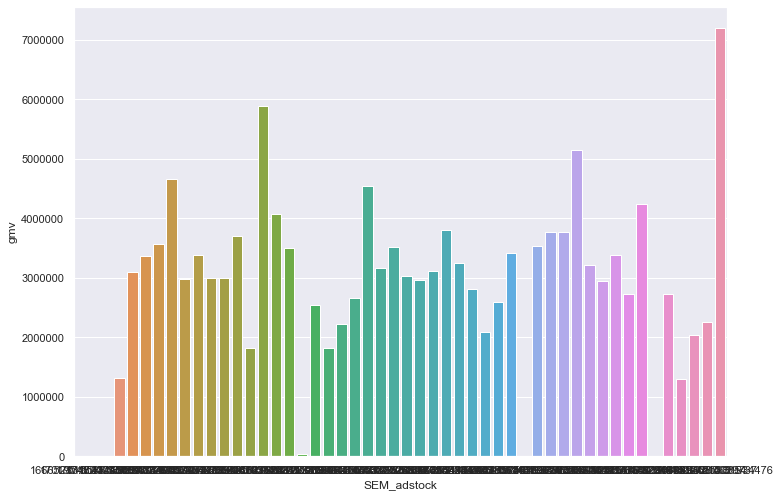

In [332]:
sns.barplot(x ="SEM_adstock", y ="gmv",data=HA_SEM_adstock_gmv)

In [333]:
#GMV Affiliates_adstock Adstock
GA_Affiliates_adstock_gmv=eleckart_GamingAccessory.groupby(['week'], as_index=False).agg({"gmv": "sum",'Affiliates_adstock':'mean'}).sort_values(['gmv'], ascending=[False])
GA_Affiliates_adstock_gmv.head()

,week,gmv,Affiliates_adstock
38,42,"7,195,030.62","31,492,262.99"
16,17,"5,888,741.00","26,891,116.10"
20,21,"5,153,867.33","30,681,642.83"
2,3,"4,667,260.30","33,281,850.77"
9,10,"4,541,478.14","28,081,811.30"


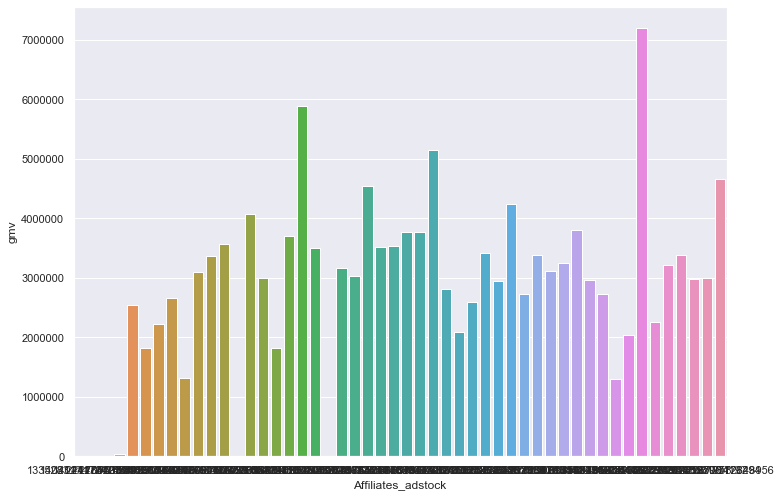

In [334]:
sns.barplot(x ="Affiliates_adstock", y ="gmv",data=GA_Affiliates_adstock_gmv)

In [335]:
#GMV Radio_adstock Adstock
GA_Radio_adstock_gmv=eleckart_GamingAccessory.groupby(['week'], as_index=False).agg({"gmv": "sum",'Radio_adstock':'mean'}).sort_values(['gmv'], ascending=[False])
GA_Radio_adstock_gmv.head()

,week,gmv,Radio_adstock
38,42,"7,195,030.62",358.06
16,17,"5,888,741.00","424,997.32"
20,21,"5,153,867.33","4,959,463.16"
2,3,"4,667,260.30","12,183,012.73"
9,10,"4,541,478.14","3,920,628.98"


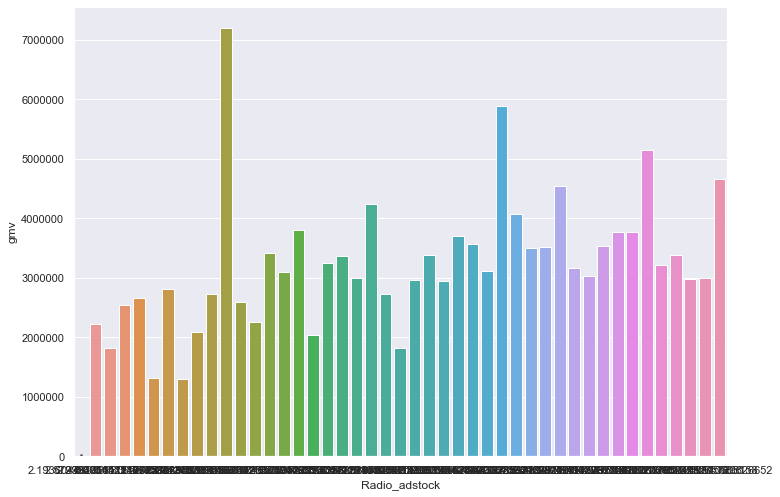

In [336]:
sns.barplot(x ="Radio_adstock", y ="gmv",data=GA_Radio_adstock_gmv)

In [337]:
#GMV Other_adstock Adstock
GA_Other_adstock_gmv=eleckart_GamingAccessory.groupby(['week'], as_index=False).agg({"gmv": "sum",'Other_adstock':'mean'}).sort_values(['gmv'], ascending=[False])
GA_Other_adstock_gmv.head()

,week,gmv,Other_adstock
38,42,"7,195,030.62","4,251.97"
16,17,"5,888,741.00","2,123,465.10"
20,21,"5,153,867.33","22,484,402.53"
2,3,"4,667,260.30","122,236,227.72"
9,10,"4,541,478.14","71,858,122.11"


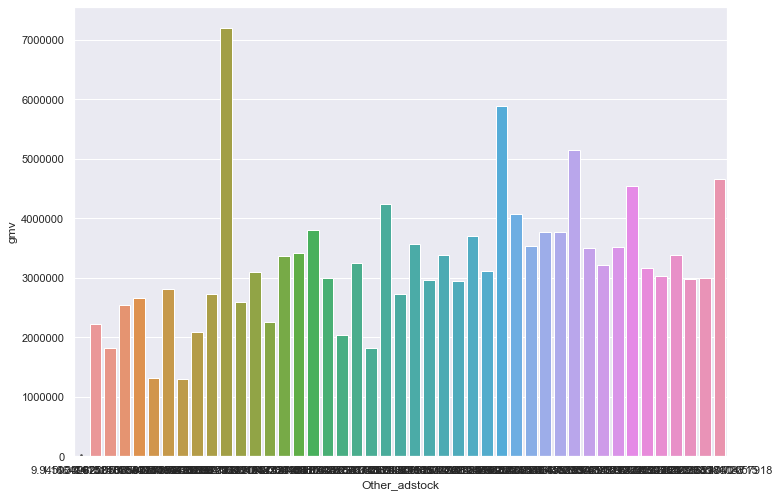

In [338]:
sns.barplot(x ="Other_adstock", y ="gmv",data=GA_Other_adstock_gmv)

In [339]:
#GMV Content Marketing Adstock
GA_Content_Marketing_adstock_gmv=eleckart_GamingAccessory.groupby(['week'], as_index=False).agg({"gmv": "sum","Content Marketing_adstock":"mean"}).sort_values(['gmv'], ascending=[False])
GA_Content_Marketing_adstock_gmv.head()

,week,gmv,Content Marketing_adstock
38,42,"7,195,030.62","15,546,543.68"
16,17,"5,888,741.00","456,757.21"
20,21,"5,153,867.33","3,562,266.59"
2,3,"4,667,260.30","4,063,659.44"
9,10,"4,541,478.14","1,670,652.54"


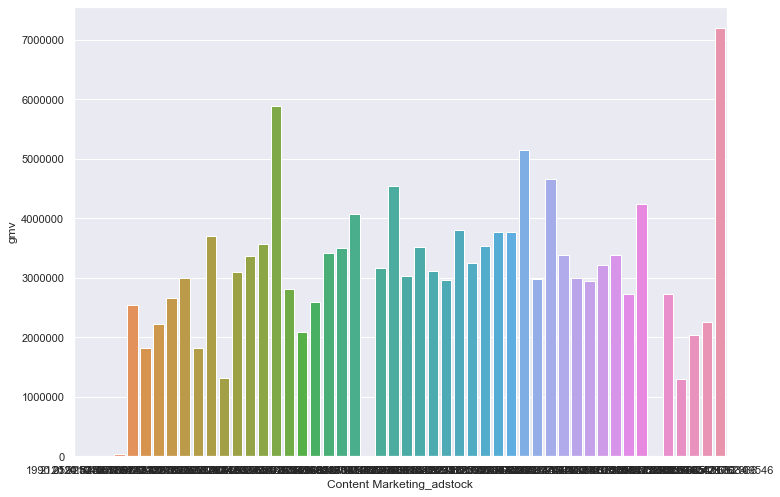

In [340]:
sns.barplot(x ="Content Marketing_adstock", y ="gmv",data=GA_Content_Marketing_adstock_gmv)

In [341]:
#GMV Online Marketing Adstock
GA_Onmkt_adstock_gmv=eleckart_GamingAccessory.groupby(['week'], as_index=False).agg({"gmv": "sum","Online marketing_adstock":"mean"}).sort_values(['gmv'], ascending=[False])
GA_Onmkt_adstock_gmv.head()

,week,gmv,Online marketing_adstock
38,42,"7,195,030.62","110,052,163.66"
16,17,"5,888,741.00","79,481,981.15"
20,21,"5,153,867.33","106,695,419.19"
2,3,"4,667,260.30","103,413,029.26"
9,10,"4,541,478.14","83,275,513.51"


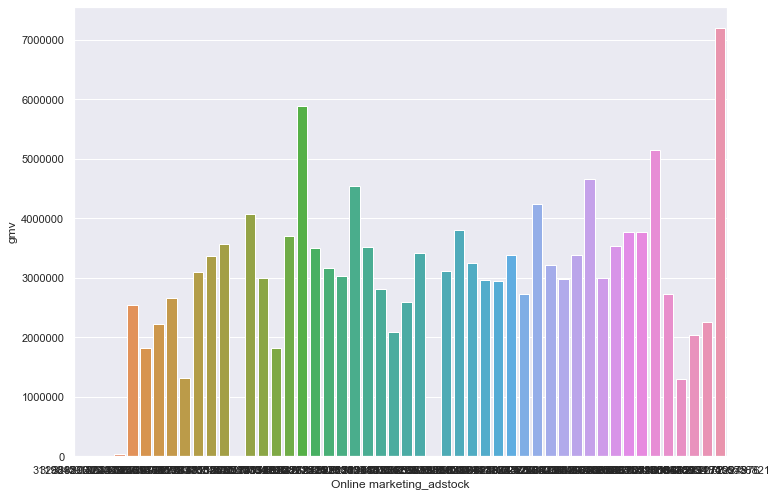

In [342]:
sns.barplot(x ="Online marketing_adstock", y ="gmv",data=GA_Onmkt_adstock_gmv)

In [343]:
#Moving Average o 1st week--Advance KPI
#df=eleckart_GamingAccessory['gmvperunit'].rolling(window=3).mean()
df=eleckart_GamingAccessory[['gmvperunit','Discount_Percentage','week']]
df['LP_MA1']=df['gmvperunit'].rolling(window=2).mean()
df['PO_MA1']=df['Discount_Percentage'].rolling(window=2).mean()
#df['MA2']=df.rolling(window=4).mean()
df.head()

,gmvperunit,Discount_Percentage,week,LP_MA1,PO_MA1
1555,"3,075.00",23.11,40,nan,nan
1556,"2,750.00",31.23,42,"2,912.50",27.17
1557,"2,899.00",27.51,42,"2,824.50",29.37
1558,"2,609.00",34.76,42,"2,754.00",31.13
1559,"2,772.00",30.68,44,"2,690.50",32.72


In [344]:
#Moving Avg of 2nd week
#df2=eleckart_GamingAccessory['gmvperunit'].rolling(window=3).mean()
df2=eleckart_GamingAccessory[['gmvperunit','Discount_Percentage','week']]
df2['LP_MA2']=df2['gmvperunit'].rolling(window=3).mean()
df2['PO_MA2']=df2['Discount_Percentage'].rolling(window=3).mean()
#df['MA2']=df.rolling(window=4).mean()
df2.head()

,gmvperunit,Discount_Percentage,week,LP_MA2,PO_MA2
1555,"3,075.00",23.11,40,nan,nan
1556,"2,750.00",31.23,42,nan,nan
1557,"2,899.00",27.51,42,"2,908.00",27.28
1558,"2,609.00",34.76,42,"2,752.67",31.17
1559,"2,772.00",30.68,44,"2,760.00",30.98


In [345]:
#Moving Avg of 3rd week
#df3=eleckart_GamingAccessory['gmvperunit'].rolling(window=3).mean()
df3=eleckart_GamingAccessory[['gmvperunit','Discount_Percentage','week']]
df3['LP_MA3']=df3['gmvperunit'].rolling(window=4).mean()
df3['PO_MA3']=df3['Discount_Percentage'].rolling(window=4).mean()
#df['MA2']=df.rolling(window=4).mean()
df3.head()

,gmvperunit,Discount_Percentage,week,LP_MA3,PO_MA3
1555,"3,075.00",23.11,40,nan,nan
1556,"2,750.00",31.23,42,nan,nan
1557,"2,899.00",27.51,42,nan,nan
1558,"2,609.00",34.76,42,"2,833.25",29.15
1559,"2,772.00",30.68,44,"2,757.50",31.05


In [346]:
eleckart_GamingAccessory['inc_LP_MA1']=(eleckart_GamingAccessory['gmvperunit'] - df['LP_MA1'])/df['LP_MA1']
eleckart_GamingAccessory['inc_LP_MA2']=(eleckart_GamingAccessory['gmvperunit'] - df2['LP_MA2'])/df2['LP_MA2']
eleckart_GamingAccessory['inc_LP_MA3']=(eleckart_GamingAccessory['gmvperunit'] - df3['LP_MA3'])/df3['LP_MA3']
eleckart_GamingAccessory.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,inc_LP_MA1,inc_LP_MA2,inc_LP_MA3
1555,2015-10-04,2015,10,"1,408,216,975,064,600.00","1,408,216,975,064,600.00","3,075.00",1,0,0,COD,...,"191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00,nan,nan,nan
1556,2015-10-14,2015,10,"1,416,985,339,691,600.00","1,416,985,339,691,600.00","2,750.00",1,0,0,COD,...,"286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00,-0.06,nan,nan
1557,2015-10-15,2015,10,"1,417,669,228,375,400.00","1,417,669,228,375,400.00","2,899.00",1,0,0,Prepaid,...,"334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00,0.03,-0.00,nan
1558,2015-10-17,2015,10,"1,419,414,998,353,400.00","1,419,414,998,353,400.00","2,609.00",1,0,0,Prepaid,...,"358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00,-0.05,-0.05,-0.08
1559,2015-10-26,2015,10,"1,427,167,582,532,600.00","1,427,167,582,532,600.00","2,772.00",1,0,0,Prepaid,...,"370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00,0.03,0.00,0.01


In [347]:
eleckart_GamingAccessory['inc_PO_MA1']=(eleckart_GamingAccessory['Discount_Percentage'] - df['PO_MA1'])/df['PO_MA1']
eleckart_GamingAccessory['inc_PO_MA2']=(eleckart_GamingAccessory['Discount_Percentage'] - df2['PO_MA2'])/df2['PO_MA2']
eleckart_GamingAccessory['inc_PO_MA3']=(eleckart_GamingAccessory['Discount_Percentage'] - df3['PO_MA3'])/df3['PO_MA3']
eleckart_GamingAccessory.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,inc_LP_MA1,inc_LP_MA2,inc_LP_MA3,inc_PO_MA1,inc_PO_MA2,inc_PO_MA3
1555,2015-10-04,2015,10,"1,408,216,975,064,600.00","1,408,216,975,064,600.00","3,075.00",1,0,0,COD,...,"15,747,089.60","72,093,251.50",0.00,0.00,nan,nan,nan,nan,nan,nan
1556,2015-10-14,2015,10,"1,416,985,339,691,600.00","1,416,985,339,691,600.00","2,750.00",1,0,0,COD,...,"23,620,634.40","108,139,877.25",0.00,0.00,-0.06,nan,nan,0.15,nan,nan
1557,2015-10-15,2015,10,"1,417,669,228,375,400.00","1,417,669,228,375,400.00","2,899.00",1,0,0,Prepaid,...,"27,557,406.80","126,163,190.13",0.00,0.00,0.03,-0.00,nan,-0.06,0.01,nan
1558,2015-10-17,2015,10,"1,419,414,998,353,400.00","1,419,414,998,353,400.00","2,609.00",1,0,0,Prepaid,...,"29,525,793.00","135,174,846.56",0.00,0.00,-0.05,-0.05,-0.08,0.12,0.12,0.19
1559,2015-10-26,2015,10,"1,427,167,582,532,600.00","1,427,167,582,532,600.00","2,772.00",1,0,0,Prepaid,...,"30,509,986.10","139,680,674.78",0.00,0.00,0.03,0.00,0.01,-0.06,-0.01,-0.01


In [348]:
# Lag Variables [For 'list_price', 'promotional_offer', 'gmv']
df1=eleckart_GamingAccessory[['week','gmv','gmvperunit','Discount_Percentage']]
df1['list_price-1']=df1['gmvperunit'].shift(-1)
df1['list_price-2']=df1['gmvperunit'].shift(-2)
df1['list_price-3']=df1['gmvperunit'].shift(-3)
df1.head()

,week,gmv,gmvperunit,Discount_Percentage,list_price-1,list_price-2,list_price-3
1555,40,"3,075.00","3,075.00",23.11,"2,750.00","2,899.00","2,609.00"
1556,42,"2,750.00","2,750.00",31.23,"2,899.00","2,609.00","2,772.00"
1557,42,"2,899.00","2,899.00",27.51,"2,609.00","2,772.00","2,750.00"
1558,42,"2,609.00","2,609.00",34.76,"2,772.00","2,750.00","2,999.00"
1559,44,"2,772.00","2,772.00",30.68,"2,750.00","2,999.00","3,079.00"


In [349]:
#Lag Promotional Offer (different period lags) [Lag of discount(Promotional Offer) by 1st week, 2nd week, 3rd week]
df2['promotional_offer-1']=df1['Discount_Percentage'].shift(-1)
df2['promotional_offer-2']=df1['Discount_Percentage'].shift(-2)
df2['promotional_offer-3']=df1['Discount_Percentage'].shift(-3)
df2.head()

,gmvperunit,Discount_Percentage,week,LP_MA2,PO_MA2,promotional_offer-1,promotional_offer-2,promotional_offer-3
1555,"3,075.00",23.11,40,nan,nan,31.23,27.51,34.76
1556,"2,750.00",31.23,42,nan,nan,27.51,34.76,30.68
1557,"2,899.00",27.51,42,"2,908.00",27.28,34.76,30.68,31.23
1558,"2,609.00",34.76,42,"2,752.67",31.17,30.68,31.23,25.01
1559,"2,772.00",30.68,44,"2,760.00",30.98,31.23,25.01,23.01


In [350]:
#Lag gmv (different period lags) [Lag of gmv by 1st week, 2nd week, 3rd week]
df3['gmv-1']=df1['gmv'].shift(-1)
df3['gmv-2']=df1['gmv'].shift(-2)
df3['gmv-3']=df1['gmv'].shift(-3)
df3.head()

,gmvperunit,Discount_Percentage,week,LP_MA3,PO_MA3,gmv-1,gmv-2,gmv-3
1555,"3,075.00",23.11,40,nan,nan,"2,750.00","2,899.00","2,609.00"
1556,"2,750.00",31.23,42,nan,nan,"2,899.00","2,609.00","2,772.00"
1557,"2,899.00",27.51,42,nan,nan,"2,609.00","2,772.00","2,750.00"
1558,"2,609.00",34.76,42,"2,833.25",29.15,"2,772.00","2,750.00","2,999.00"
1559,"2,772.00",30.68,44,"2,757.50",31.05,"2,750.00","2,999.00","3,079.00"


In [351]:
#Incremental Lags

#Incremental Lags of List Price by 1 week, 2 week, 3 week
eleckart_GamingAccessory['LP_lag_1_per']=(eleckart_GamingAccessory['gmvperunit'] - df1['list_price-1'])/df1['list_price-1']
eleckart_GamingAccessory['LP_lag_2_per']=(eleckart_GamingAccessory['gmvperunit'] - df1['list_price-2'])/df1['list_price-2']
eleckart_GamingAccessory['LP_lag_3_per']=(eleckart_GamingAccessory['gmvperunit'] - df1['list_price-3'])/df1['list_price-3']

        
eleckart_GamingAccessory.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,Other_adstock,inc_LP_MA1,inc_LP_MA2,inc_LP_MA3,inc_PO_MA1,inc_PO_MA2,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per
1555,2015-10-04,2015,10,"1,408,216,975,064,600.00","1,408,216,975,064,600.00","3,075.00",1,0,0,COD,...,0.00,nan,nan,nan,nan,nan,nan,0.12,0.06,0.18
1556,2015-10-14,2015,10,"1,416,985,339,691,600.00","1,416,985,339,691,600.00","2,750.00",1,0,0,COD,...,0.00,-0.06,nan,nan,0.15,nan,nan,-0.05,0.05,-0.01
1557,2015-10-15,2015,10,"1,417,669,228,375,400.00","1,417,669,228,375,400.00","2,899.00",1,0,0,Prepaid,...,0.00,0.03,-0.00,nan,-0.06,0.01,nan,0.11,0.05,0.05
1558,2015-10-17,2015,10,"1,419,414,998,353,400.00","1,419,414,998,353,400.00","2,609.00",1,0,0,Prepaid,...,0.00,-0.05,-0.05,-0.08,0.12,0.12,0.19,-0.06,-0.05,-0.13
1559,2015-10-26,2015,10,"1,427,167,582,532,600.00","1,427,167,582,532,600.00","2,772.00",1,0,0,Prepaid,...,0.00,0.03,0.00,0.01,-0.06,-0.01,-0.01,0.01,-0.08,-0.10


In [352]:
#Incremental Lags of Promotional Offer by 1 week, 2 week, 3 week
eleckart_GamingAccessory['PO_lag_1_per-1']=(eleckart_GamingAccessory['Discount_Percentage'] - df2['promotional_offer-1'])/df2['promotional_offer-1']
eleckart_GamingAccessory['PO_lag_1_per-2']=(eleckart_GamingAccessory['Discount_Percentage'] - df2['promotional_offer-2'])/df2['promotional_offer-2']
eleckart_GamingAccessory['PO_lag_1_per-3']=(eleckart_GamingAccessory['Discount_Percentage'] - df2['promotional_offer-3'])/df2['promotional_offer-3']

        
eleckart_GamingAccessory.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,inc_LP_MA3,inc_PO_MA1,inc_PO_MA2,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3
1555,2015-10-04,2015,10,"1,408,216,975,064,600.00","1,408,216,975,064,600.00","3,075.00",1,0,0,COD,...,nan,nan,nan,nan,0.12,0.06,0.18,-0.26,-0.16,-0.34
1556,2015-10-14,2015,10,"1,416,985,339,691,600.00","1,416,985,339,691,600.00","2,750.00",1,0,0,COD,...,nan,0.15,nan,nan,-0.05,0.05,-0.01,0.14,-0.10,0.02
1557,2015-10-15,2015,10,"1,417,669,228,375,400.00","1,417,669,228,375,400.00","2,899.00",1,0,0,Prepaid,...,nan,-0.06,0.01,nan,0.11,0.05,0.05,-0.21,-0.10,-0.12
1558,2015-10-17,2015,10,"1,419,414,998,353,400.00","1,419,414,998,353,400.00","2,609.00",1,0,0,Prepaid,...,-0.08,0.12,0.12,0.19,-0.06,-0.05,-0.13,0.13,0.11,0.39
1559,2015-10-26,2015,10,"1,427,167,582,532,600.00","1,427,167,582,532,600.00","2,772.00",1,0,0,Prepaid,...,0.01,-0.06,-0.01,-0.01,0.01,-0.08,-0.10,-0.02,0.23,0.33


In [353]:
#Incremental Lags of gmv by 1 week, 2 week, 3 week
eleckart_GamingAccessory['GMV_lag_1_per']=(eleckart_GamingAccessory['gmv'] - df3['gmv-1'])/df3['gmv-1']
eleckart_GamingAccessory['GMV_lag_2_per']=(eleckart_GamingAccessory['gmv'] - df3['gmv-2'])/df3['gmv-2']
eleckart_GamingAccessory['GMV_lag_3_per']=(eleckart_GamingAccessory['gmv'] - df3['gmv-3'])/df3['gmv-3']

        
eleckart_GamingAccessory.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
1555,2015-10-04,2015,10,"1,408,216,975,064,600.00","1,408,216,975,064,600.00","3,075.00",1,0,0,COD,...,nan,0.12,0.06,0.18,-0.26,-0.16,-0.34,0.12,0.06,0.18
1556,2015-10-14,2015,10,"1,416,985,339,691,600.00","1,416,985,339,691,600.00","2,750.00",1,0,0,COD,...,nan,-0.05,0.05,-0.01,0.14,-0.10,0.02,-0.05,0.05,-0.01
1557,2015-10-15,2015,10,"1,417,669,228,375,400.00","1,417,669,228,375,400.00","2,899.00",1,0,0,Prepaid,...,nan,0.11,0.05,0.05,-0.21,-0.10,-0.12,0.11,0.05,0.05
1558,2015-10-17,2015,10,"1,419,414,998,353,400.00","1,419,414,998,353,400.00","2,609.00",1,0,0,Prepaid,...,0.19,-0.06,-0.05,-0.13,0.13,0.11,0.39,-0.06,-0.05,-0.13
1559,2015-10-26,2015,10,"1,427,167,582,532,600.00","1,427,167,582,532,600.00","2,772.00",1,0,0,Prepaid,...,-0.01,0.01,-0.08,-0.10,-0.02,0.23,0.33,0.01,-0.08,-0.10


In [354]:
eleckart_CameraAccessory.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,inc_LP_MA1,inc_LP_MA2,inc_LP_MA3,inc_PO_MA1,inc_PO_MA2,inc_PO_MA3
0,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,COD,...,"15,747,089.60","72,093,251.50",0.00,0.00,nan,nan,nan,nan,nan,nan
1,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,0,0,COD,...,"23,620,634.40","108,139,877.25",0.00,0.00,0.04,nan,nan,-0.46,nan,nan
2,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,0,0,COD,...,"27,557,406.80","126,163,190.13",0.00,0.00,-0.55,-0.61,nan,0.13,-0.23,nan
3,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,0,0,Prepaid,...,"29,525,793.00","135,174,846.56",0.00,0.00,-0.08,-0.52,-0.60,0.58,1.04,0.96
4,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,Prepaid,...,"30,509,986.10","139,680,674.78",0.00,0.00,-0.02,-0.08,-0.47,0.08,0.44,0.78


In [355]:
# Lag Variables [For 'list_price', 'promotional_offer', 'gmv']
dfCA1=eleckart_CameraAccessory[['week','gmv','gmvperunit','Discount_Percentage']]
dfCA1['list_price-1']=dfCA1['gmvperunit'].shift(-1)
dfCA1['list_price-2']=dfCA1['gmvperunit'].shift(-2)
dfCA1['list_price-3']=dfCA1['gmvperunit'].shift(-3)
dfCA1.head()

,week,gmv,gmvperunit,Discount_Percentage,list_price-1,list_price-2,list_price-3
0,42,"6,400.00","6,400.00",10.99,"6,900.00","1,990.00","1,690.00"
1,43,"6,900.00","6,900.00",4.03,"1,990.00","1,690.00","1,618.00"
2,43,"1,990.00","1,990.00",5.19,"1,690.00","1,618.00","3,324.00"
3,42,"1,690.00","1,690.00",19.49,"1,618.00","3,324.00","3,695.00"
4,42,"1,618.00","1,618.00",22.92,"3,324.00","3,695.00","3,695.00"


In [356]:
#Lag Promotional Offer (different period lags) [Lag of discount(Promotional Offer) by 1st week, 2nd week, 3rd week]
dfCA1['promotional_offer-1']=dfCA1['Discount_Percentage'].shift(-1)
dfCA1['promotional_offer-2']=dfCA1['Discount_Percentage'].shift(-2)
dfCA1['promotional_offer-3']=dfCA1['Discount_Percentage'].shift(-3)
dfCA1.head()

,week,gmv,gmvperunit,Discount_Percentage,list_price-1,list_price-2,list_price-3,promotional_offer-1,promotional_offer-2,promotional_offer-3
0,42,"6,400.00","6,400.00",10.99,"6,900.00","1,990.00","1,690.00",4.03,5.19,19.49
1,43,"6,900.00","6,900.00",4.03,"1,990.00","1,690.00","1,618.00",5.19,19.49,22.92
2,43,"1,990.00","1,990.00",5.19,"1,690.00","1,618.00","3,324.00",19.49,22.92,17.80
3,42,"1,690.00","1,690.00",19.49,"1,618.00","3,324.00","3,695.00",22.92,17.80,8.63
4,42,"1,618.00","1,618.00",22.92,"3,324.00","3,695.00","3,695.00",17.80,8.63,8.63


In [357]:
#Lag gmv (different period lags) [Lag of gmv by 1st week, 2nd week, 3rd week]
dfCA1['gmv-1']=dfCA1['gmv'].shift(-1)
dfCA1['gmv-2']=dfCA1['gmv'].shift(-2)
dfCA1['gmv-3']=dfCA1['gmv'].shift(-3)
dfCA1.head()

,week,gmv,gmvperunit,Discount_Percentage,list_price-1,list_price-2,list_price-3,promotional_offer-1,promotional_offer-2,promotional_offer-3,gmv-1,gmv-2,gmv-3
0,42,"6,400.00","6,400.00",10.99,"6,900.00","1,990.00","1,690.00",4.03,5.19,19.49,"6,900.00","1,990.00","1,690.00"
1,43,"6,900.00","6,900.00",4.03,"1,990.00","1,690.00","1,618.00",5.19,19.49,22.92,"1,990.00","1,690.00","1,618.00"
2,43,"1,990.00","1,990.00",5.19,"1,690.00","1,618.00","3,324.00",19.49,22.92,17.80,"1,690.00","1,618.00","3,324.00"
3,42,"1,690.00","1,690.00",19.49,"1,618.00","3,324.00","3,695.00",22.92,17.80,8.63,"1,618.00","3,324.00","3,695.00"
4,42,"1,618.00","1,618.00",22.92,"3,324.00","3,695.00","3,695.00",17.80,8.63,8.63,"3,324.00","3,695.00","3,695.00"


In [358]:

#Incremental Lags of List Price by 1 week, 2 week, 3 week
eleckart_CameraAccessory['LP_lag_1_per']=(eleckart_CameraAccessory['gmvperunit'] - dfCA1['list_price-1'])/dfCA1['list_price-1']
eleckart_CameraAccessory['LP_lag_2_per']=(eleckart_CameraAccessory['gmvperunit'] - dfCA1['list_price-2'])/dfCA1['list_price-2']
eleckart_CameraAccessory['LP_lag_3_per']=(eleckart_CameraAccessory['gmvperunit'] - dfCA1['list_price-3'])/dfCA1['list_price-3']

        
eleckart_CameraAccessory.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,Other_adstock,inc_LP_MA1,inc_LP_MA2,inc_LP_MA3,inc_PO_MA1,inc_PO_MA2,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per
0,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,COD,...,0.00,nan,nan,nan,nan,nan,nan,-0.07,2.22,2.79
1,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,0,0,COD,...,0.00,0.04,nan,nan,-0.46,nan,nan,2.47,3.08,3.26
2,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,0,0,COD,...,0.00,-0.55,-0.61,nan,0.13,-0.23,nan,0.18,0.23,-0.40
3,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,0,0,Prepaid,...,0.00,-0.08,-0.52,-0.60,0.58,1.04,0.96,0.04,-0.49,-0.54
4,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,Prepaid,...,0.00,-0.02,-0.08,-0.47,0.08,0.44,0.78,-0.51,-0.56,-0.56


In [359]:
#Incremental Lags of Promotional Offer by 1 week, 2 week, 3 week
eleckart_CameraAccessory['PO_lag_1_per-1']=(eleckart_CameraAccessory['Discount_Percentage'] - dfCA1['promotional_offer-1'])/dfCA1['promotional_offer-1']
eleckart_CameraAccessory['PO_lag_1_per-2']=(eleckart_CameraAccessory['Discount_Percentage'] - dfCA1['promotional_offer-2'])/dfCA1['promotional_offer-2']
eleckart_CameraAccessory['PO_lag_1_per-3']=(eleckart_CameraAccessory['Discount_Percentage'] - dfCA1['promotional_offer-3'])/dfCA1['promotional_offer-3']

        
eleckart_CameraAccessory.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,inc_LP_MA3,inc_PO_MA1,inc_PO_MA2,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3
0,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,COD,...,nan,nan,nan,nan,-0.07,2.22,2.79,1.72,1.12,-0.44
1,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,0,0,COD,...,nan,-0.46,nan,nan,2.47,3.08,3.26,-0.22,-0.79,-0.82
2,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,0,0,COD,...,nan,0.13,-0.23,nan,0.18,0.23,-0.40,-0.73,-0.77,-0.71
3,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,0,0,Prepaid,...,-0.60,0.58,1.04,0.96,0.04,-0.49,-0.54,-0.15,0.09,1.26
4,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,Prepaid,...,-0.47,0.08,0.44,0.78,-0.51,-0.56,-0.56,0.29,1.66,1.66


In [360]:
#Incremental Lags of gmv by 1 week, 2 week, 3 week
eleckart_CameraAccessory['GMV_lag_1_per']=(eleckart_CameraAccessory['gmv'] - dfCA1['gmv-1'])/dfCA1['gmv-1']
eleckart_CameraAccessory['GMV_lag_2_per']=(eleckart_CameraAccessory['gmv'] - dfCA1['gmv-2'])/dfCA1['gmv-2']
eleckart_CameraAccessory['GMV_lag_3_per']=(eleckart_CameraAccessory['gmv'] - dfCA1['gmv-3'])/dfCA1['gmv-3']

        
eleckart_CameraAccessory.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,COD,...,nan,-0.07,2.22,2.79,1.72,1.12,-0.44,-0.07,2.22,2.79
1,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,0,0,COD,...,nan,2.47,3.08,3.26,-0.22,-0.79,-0.82,2.47,3.08,3.26
2,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,0,0,COD,...,nan,0.18,0.23,-0.40,-0.73,-0.77,-0.71,0.18,0.23,-0.40
3,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,0,0,Prepaid,...,0.96,0.04,-0.49,-0.54,-0.15,0.09,1.26,0.04,-0.49,-0.54
4,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,Prepaid,...,0.78,-0.51,-0.56,-0.56,0.29,1.66,1.66,-0.51,-0.56,-0.56


In [361]:
eleckart_GamingAccessory.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
1555,2015-10-04,2015,10,"1,408,216,975,064,600.00","1,408,216,975,064,600.00","3,075.00",1,0,0,COD,...,nan,0.12,0.06,0.18,-0.26,-0.16,-0.34,0.12,0.06,0.18
1556,2015-10-14,2015,10,"1,416,985,339,691,600.00","1,416,985,339,691,600.00","2,750.00",1,0,0,COD,...,nan,-0.05,0.05,-0.01,0.14,-0.10,0.02,-0.05,0.05,-0.01
1557,2015-10-15,2015,10,"1,417,669,228,375,400.00","1,417,669,228,375,400.00","2,899.00",1,0,0,Prepaid,...,nan,0.11,0.05,0.05,-0.21,-0.10,-0.12,0.11,0.05,0.05
1558,2015-10-17,2015,10,"1,419,414,998,353,400.00","1,419,414,998,353,400.00","2,609.00",1,0,0,Prepaid,...,0.19,-0.06,-0.05,-0.13,0.13,0.11,0.39,-0.06,-0.05,-0.13
1559,2015-10-26,2015,10,"1,427,167,582,532,600.00","1,427,167,582,532,600.00","2,772.00",1,0,0,Prepaid,...,-0.01,0.01,-0.08,-0.10,-0.02,0.23,0.33,0.01,-0.08,-0.10


In [362]:
eleckart_HomeAudio.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,inc_LP_MA1,inc_LP_MA2,inc_LP_MA3,inc_PO_MA1,inc_PO_MA2,inc_PO_MA3
2460,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,Prepaid,...,"15,747,089.60","72,093,251.50",0.00,0.00,nan,nan,nan,nan,nan,nan
2461,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,Prepaid,...,"23,620,634.40","108,139,877.25",0.00,0.00,-0.12,nan,nan,0.63,nan,nan
2462,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,Prepaid,...,"27,557,406.80","126,163,190.13",0.00,0.00,0.07,-0.00,nan,-0.24,0.01,nan
2463,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,Prepaid,...,"29,525,793.00","135,174,846.56",0.00,0.00,-0.01,0.03,-0.02,0.06,-0.10,0.10
2464,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,COD,...,"30,509,986.10","139,680,674.78",0.00,0.00,0.06,0.07,0.11,-0.37,-0.41,-0.51


In [363]:
# Lag Variables [For 'list_price', 'promotional_offer', 'gmv']
dfHA=eleckart_HomeAudio[['week','gmv','gmvperunit','Discount_Percentage']]
dfHA['list_price-1']=dfHA['gmvperunit'].shift(-1)
dfHA['list_price-2']=dfHA['gmvperunit'].shift(-2)
dfHA['list_price-3']=dfHA['gmvperunit'].shift(-3)
dfHA.head()

,week,gmv,gmvperunit,Discount_Percentage,list_price-1,list_price-2,list_price-3
2460,40,"7,049.00","7,049.00",6.00,"5,489.00","6,255.00","6,099.00"
2461,42,"5,489.00","5,489.00",26.80,"6,255.00","6,099.00","6,850.00"
2462,42,"6,255.00","6,255.00",16.59,"6,099.00","6,850.00","6,850.00"
2463,42,"6,099.00","6,099.00",18.67,"6,850.00","6,850.00","6,099.00"
2464,43,"6,850.00","6,850.00",8.65,"6,850.00","6,099.00","6,099.00"


In [364]:
#Lag Promotional Offer (different period lags) [Lag of discount(Promotional Offer) by 1st week, 2nd week, 3rd week]
dfHA['promotional_offer-1']=dfHA['Discount_Percentage'].shift(-1)
dfHA['promotional_offer-2']=dfHA['Discount_Percentage'].shift(-2)
dfHA['promotional_offer-3']=dfHA['Discount_Percentage'].shift(-3)
dfHA.head()

,week,gmv,gmvperunit,Discount_Percentage,list_price-1,list_price-2,list_price-3,promotional_offer-1,promotional_offer-2,promotional_offer-3
2460,40,"7,049.00","7,049.00",6.00,"5,489.00","6,255.00","6,099.00",26.80,16.59,18.67
2461,42,"5,489.00","5,489.00",26.80,"6,255.00","6,099.00","6,850.00",16.59,18.67,8.65
2462,42,"6,255.00","6,255.00",16.59,"6,099.00","6,850.00","6,850.00",18.67,8.65,8.65
2463,42,"6,099.00","6,099.00",18.67,"6,850.00","6,850.00","6,099.00",8.65,8.65,18.67
2464,43,"6,850.00","6,850.00",8.65,"6,850.00","6,099.00","6,099.00",8.65,18.67,18.67


In [365]:
#Lag gmv (different period lags) [Lag of gmv by 1st week, 2nd week, 3rd week]
dfHA['gmv-1']=dfHA['gmv'].shift(-1)
dfHA['gmv-2']=dfHA['gmv'].shift(-2)
dfHA['gmv-3']=dfHA['gmv'].shift(-3)
dfHA.head()

,week,gmv,gmvperunit,Discount_Percentage,list_price-1,list_price-2,list_price-3,promotional_offer-1,promotional_offer-2,promotional_offer-3,gmv-1,gmv-2,gmv-3
2460,40,"7,049.00","7,049.00",6.00,"5,489.00","6,255.00","6,099.00",26.80,16.59,18.67,"5,489.00","6,255.00","6,099.00"
2461,42,"5,489.00","5,489.00",26.80,"6,255.00","6,099.00","6,850.00",16.59,18.67,8.65,"6,255.00","6,099.00","6,850.00"
2462,42,"6,255.00","6,255.00",16.59,"6,099.00","6,850.00","6,850.00",18.67,8.65,8.65,"6,099.00","6,850.00","6,850.00"
2463,42,"6,099.00","6,099.00",18.67,"6,850.00","6,850.00","6,099.00",8.65,8.65,18.67,"6,850.00","6,850.00","6,099.00"
2464,43,"6,850.00","6,850.00",8.65,"6,850.00","6,099.00","6,099.00",8.65,18.67,18.67,"6,850.00","6,099.00","6,099.00"


In [366]:
#Incremental Lags

#Incremental Lags of List Price by 1 week, 2 week, 3 week
eleckart_HomeAudio['LP_lag_1_per']=(eleckart_HomeAudio['gmvperunit'] - dfHA['list_price-1'])/dfHA['list_price-1']
eleckart_HomeAudio['LP_lag_2_per']=(eleckart_HomeAudio['gmvperunit'] - dfHA['list_price-2'])/dfHA['list_price-2']
eleckart_HomeAudio['LP_lag_3_per']=(eleckart_HomeAudio['gmvperunit'] - dfHA['list_price-3'])/dfHA['list_price-3']

        
eleckart_HomeAudio.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,Other_adstock,inc_LP_MA1,inc_LP_MA2,inc_LP_MA3,inc_PO_MA1,inc_PO_MA2,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per
2460,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,Prepaid,...,0.00,nan,nan,nan,nan,nan,nan,0.28,0.13,0.16
2461,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,Prepaid,...,0.00,-0.12,nan,nan,0.63,nan,nan,-0.12,-0.10,-0.20
2462,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,Prepaid,...,0.00,0.07,-0.00,nan,-0.24,0.01,nan,0.03,-0.09,-0.09
2463,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,Prepaid,...,0.00,-0.01,0.03,-0.02,0.06,-0.10,0.10,-0.11,-0.11,0.00
2464,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,COD,...,0.00,0.06,0.07,0.11,-0.37,-0.41,-0.51,0.00,0.12,0.12


In [367]:
#Incremental Lags of Promotional Offer by 1 week, 2 week, 3 week
eleckart_HomeAudio['PO_lag_1_per-1']=(eleckart_HomeAudio['Discount_Percentage'] - dfHA['promotional_offer-1'])/dfHA['promotional_offer-1']
eleckart_HomeAudio['PO_lag_1_per-2']=(eleckart_HomeAudio['Discount_Percentage'] - dfHA['promotional_offer-2'])/dfHA['promotional_offer-2']
eleckart_HomeAudio['PO_lag_1_per-3']=(eleckart_HomeAudio['Discount_Percentage'] - dfHA['promotional_offer-3'])/dfHA['promotional_offer-3']

        
eleckart_HomeAudio.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,inc_LP_MA3,inc_PO_MA1,inc_PO_MA2,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3
2460,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,Prepaid,...,nan,nan,nan,nan,0.28,0.13,0.16,-0.78,-0.64,-0.68
2461,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,Prepaid,...,nan,0.63,nan,nan,-0.12,-0.10,-0.20,0.62,0.44,2.10
2462,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,Prepaid,...,nan,-0.24,0.01,nan,0.03,-0.09,-0.09,-0.11,0.92,0.92
2463,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,Prepaid,...,-0.02,0.06,-0.10,0.10,-0.11,-0.11,0.00,1.16,1.16,0.00
2464,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,COD,...,0.11,-0.37,-0.41,-0.51,0.00,0.12,0.12,0.00,-0.54,-0.54


In [368]:
#Incremental Lags of gmv by 1 week, 2 week, 3 week
eleckart_HomeAudio['GMV_lag_1_per']=(eleckart_HomeAudio['gmv'] - dfHA['gmv-1'])/dfHA['gmv-1']
eleckart_HomeAudio['GMV_lag_2_per']=(eleckart_HomeAudio['gmv'] - dfHA['gmv-2'])/dfHA['gmv-2']
eleckart_HomeAudio['GMV_lag_3_per']=(eleckart_HomeAudio['gmv'] - dfHA['gmv-3'])/dfHA['gmv-3']

        
eleckart_HomeAudio.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
2460,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,Prepaid,...,nan,0.28,0.13,0.16,-0.78,-0.64,-0.68,0.28,0.13,0.16
2461,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,Prepaid,...,nan,-0.12,-0.10,-0.20,0.62,0.44,2.10,-0.12,-0.10,-0.20
2462,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,Prepaid,...,nan,0.03,-0.09,-0.09,-0.11,0.92,0.92,0.03,-0.09,-0.09
2463,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,Prepaid,...,0.10,-0.11,-0.11,0.00,1.16,1.16,0.00,-0.11,-0.11,0.00
2464,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,COD,...,-0.51,0.00,0.12,0.12,0.00,-0.54,-0.54,0.00,0.12,0.12


In [369]:
#export HomeAudio
eleckart_HomeAudio.to_csv("HomeAudio.csv")

In [370]:
#export CameraAccessory
eleckart_CameraAccessory.to_csv("CameraAccessory.csv")

In [371]:
#export GamingAccessory
eleckart_GamingAccessory.to_csv("GamingAccessory.csv")